# Initials

Run this initial part whenever starting to use this notebook.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
players = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20.csv")
gk_players = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_GK.csv")
non_gk_players = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_NonGK.csv")
print(players.shape)
players.head()

(18278, 104)


sofifa_id                                         player_url  ...   rcb    rb
0     158023  https://sofifa.com/player/158023/lionel-messi/...  ...  52+2  63+2
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...  ...  53+3  61+3
2     190871  https://sofifa.com/player/190871/neymar-da-sil...  ...  46+3  61+3
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...  ...   NaN   NaN
4     183277  https://sofifa.com/player/183277/eden-hazard/2...  ...  49+3  61+3

[5 rows x 104 columns]

In [0]:
def classify_player_position(player_pos):
 positions = [x.strip().lower() for x in player_pos.split(',')]
 fw_count = [x in fw_list for x in positions].count(True)
 mf_count = [x in mf_list for x in positions].count(True)
 df_count = [x in df_list for x in positions].count(True)

 if (fw_count>=mf_count and fw_count>=df_count):
   return 'fw'
 elif (mf_count>fw_count and mf_count>=df_count):
   return 'mf'
 elif (df_count>fw_count and df_count>fw_count):
   return 'df'

fw_list=['ls','st','rs','lw','lf','cf','rf','rw']
mf_list=['lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb']
df_list=['lb','lcb','cb','rcb','rb']

fw_cond=non_gk_players['team_position'].str.lower().isin(fw_list)==True
mf_cond=non_gk_players['team_position'].str.lower().isin(mf_list)==True
df_cond=non_gk_players['team_position'].str.lower().isin(df_list)==True

forward_players=non_gk_players[fw_cond]
midfield_players=non_gk_players[mf_cond]
defence_players=non_gk_players[df_cond]

other_players=non_gk_players.drop(forward_players.index).drop(midfield_players.index).drop(defence_players.index)
other_players['classification']=other_players.apply(lambda row: classify_player_position(row['player_positions']),axis=1)

forward_players=pd.concat([forward_players,other_players[other_players['classification']=='fw']],axis=0,sort=False).drop('classification',1).reset_index(drop=True)
midfield_players=pd.concat([midfield_players,other_players[other_players['classification']=='mf']],axis=0,sort=False).drop('classification',1).reset_index(drop=True)
defence_players=pd.concat([defence_players,other_players[other_players['classification']=='df']],axis=0,sort=False).drop('classification',1).reset_index(drop=True)

#keeping for legacy reasons
forwards=non_gk_players[non_gk_players['team_position'].str.lower().isin(fw_list)].reset_index(drop=True)
midfielders=non_gk_players[non_gk_players['team_position'].str.lower().isin(mf_list)].reset_index(drop=True)
defenders=non_gk_players[non_gk_players['team_position'].str.lower().isin(df_list)].reset_index(drop=True)

----- END OF INITIALS -----

# Week 1

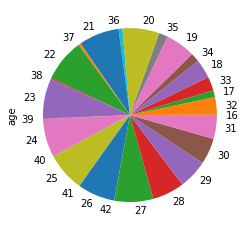

In [0]:
players.age.unique()
players.age.value_counts(sort=False).plot.pie()

In [0]:
players.age.std()

4.656964497822004

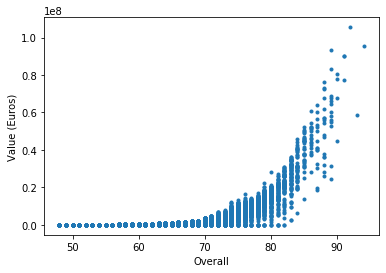

In [0]:
                                                  3
                                                  
                                                   #player potential vs player value

x=players.overall
y=players.value_eur

ax1=plt.gca()
ax1.scatter(x,y,marker='.')
ax1.set_xlabel('Overall')
ax1.set_ylabel('Value (Euros)')
plt.show()

In [0]:
players[players.player_positions=='GK']

sofifa_id                                         player_url  ...  rcb   rb
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...  ...  NaN  NaN
6         192448  https://sofifa.com/player/192448/marc-andre-te...  ...  NaN  NaN
13        212831  https://sofifa.com/player/212831/alisson-ramse...  ...  NaN  NaN
14        193080  https://sofifa.com/player/193080/david-de-gea-...  ...  NaN  NaN
25        210257  https://sofifa.com/player/210257/ederson-santa...  ...  NaN  NaN
...          ...                                                ...  ...  ...  ...
18231     251365  https://sofifa.com/player/251365/patryk-krolcz...  ...  NaN  NaN
18239     252151  https://sofifa.com/player/252151/vegard-storsv...  ...  NaN  NaN
18251     245408  https://sofifa.com/player/245408/george-sykes-...  ...  NaN  NaN
18259     248182  https://sofifa.com/player/248182/hannes-sveije...  ...  NaN  NaN
18272     251789  https://sofifa.com/player/251789/paul-martin/2...  ...  NaN  NaN

[2036 rows x 104 columns]

In [0]:
feature = players.isnull().sum()
print(type(feature))
feature_dict = feature.to_dict()
count = 0
for k in feature_dict.keys():
    if feature_dict[k] != 0:
        print(k, feature_dict[k])
        count += 1
print("Null features ", count)

<class 'pandas.core.series.Series'>
release_clause_eur 1298
player_tags 16779
team_position 240
team_jersey_number 240
loaned_from 17230
joined 1288
contract_valid_until 240
nation_position 17152
nation_jersey_number 17152
pace 2036
shooting 2036
passing 2036
dribbling 2036
defending 2036
physic 2036
gk_diving 16242
gk_handling 16242
gk_kicking 16242
gk_reflexes 16242
gk_speed 16242
gk_positioning 16242
player_traits 10712
ls 2036
st 2036
rs 2036
lw 2036
lf 2036
cf 2036
rf 2036
rw 2036
lam 2036
cam 2036
ram 2036
lm 2036
lcm 2036
cm 2036
rcm 2036
rm 2036
lwb 2036
ldm 2036
cdm 2036
rdm 2036
rwb 2036
lb 2036
lcb 2036
cb 2036
rcb 2036
rb 2036
Null features  48


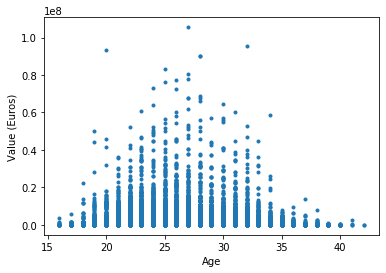

In [0]:
#Age vs Value
x=players.age
y=players.value_eur

ax1=plt.gca()
ax1.scatter(x,y,marker='.')
ax1.set_xlabel('Age')
ax1.set_ylabel('Value (Euros)')
plt.show()

# Week 2

### Init Backup

In [0]:
original_data = players

### Fill Positions

Positions are given as strings like `73+3`. Empty values are just simply `NaN`. Value of the string is evaluated if it is a string. NaNs are kept.

In [0]:
pos_fields = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam',
              'cam', 'ram','lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
              'ldm', 'cdm','rdm','rwb','lb','lcb','cb','rcb','rb']
filled_players = original_data
for pos in pos_fields:
  for f in original_data[pos]:
    if isinstance(f, str):
      filled_players[pos] = original_data[pos].replace(to_replace=f, value=eval(f))
    # elif isinstance(f, float):
    #  filled_players[pos] = original_data[pos].replace(to_replace=float('nan'), value=0)
players = filled_players

### Statistics of number fields

Min, max, median, mean, std values for numeric fields are calculated and showed together with number of null fields. `NaN` values are ignored as expected behavior of the functions. `sofifa_id` field is ignored as id does not give any statistical meaning.

Statistics are calculated for 3 groups: 
* All players
* Goalkeepers 
* Non-Goalkeepers

Numbers for those 3 groups are clearly different.

In [0]:
def get_stats(footballers):
  number_types = ['int64','float64']
  features = footballers.select_dtypes(include=number_types).columns.values
  non_statistical_fields = ['sofifa_id']
  for f in features:
    if f not in non_statistical_fields:
      print(f)
      print("Min:", footballers[f].min())
      print("Max:", footballers[f].max())
      print("Median:", footballers[f].median())
      print("Mean:", round(footballers[f].mean(),2))
      print("Std:", round(footballers[f].std(),2))
      print("#null:", footballers[f].isnull().sum())
      print()
  print("Numbers/Total:", len(features)-len(non_statistical_fields),"/",len(footballers.columns.values))

In [0]:
all_players = players
get_stats(all_players)

age
Min: 16
Max: 42
Median: 25.0
Mean: 25.28
Std: 4.66
#null: 0

height_cm
Min: 156
Max: 205
Median: 181.0
Mean: 181.36
Std: 6.76
#null: 0

weight_kg
Min: 50
Max: 110
Median: 75.0
Mean: 75.28
Std: 7.05
#null: 0

overall
Min: 48
Max: 94
Median: 66.0
Mean: 66.24
Std: 6.95
#null: 0

potential
Min: 49
Max: 95
Median: 71.0
Mean: 71.55
Std: 6.14
#null: 0

value_eur
Min: 0
Max: 105500000
Median: 700000.0
Mean: 2484037.64
Std: 5585481.06
#null: 0

wage_eur
Min: 0
Max: 565000
Median: 3000.0
Mean: 9456.94
Std: 21351.71
#null: 0

international_reputation
Min: 1
Max: 5
Median: 1.0
Mean: 1.1
Std: 0.38
#null: 0

weak_foot
Min: 1
Max: 5
Median: 3.0
Mean: 2.94
Std: 0.66
#null: 0

skill_moves
Min: 1
Max: 5
Median: 2.0
Mean: 2.37
Std: 0.77
#null: 0

release_clause_eur
Min: 13000.0
Max: 195800000.0
Median: 1200000.0
Mean: 4740717.43
Std: 11030016.29
#null: 1298

team_jersey_number
Min: 1.0
Max: 99.0
Median: 17.0
Mean: 20.1
Std: 16.6
#null: 240

contract_valid_until
Min: 2019.0
Max: 2026.0
Median: 2021.0


In [0]:
gk_players = players[players.player_positions=='GK']
get_stats(gk_players)

age
Min: 17
Max: 42
Median: 26.0
Mean: 26.27
Std: 5.37
#null: 0

height_cm
Min: 171
Max: 205
Median: 188.0
Mean: 188.44
Std: 4.6
#null: 0

weight_kg
Min: 60
Max: 107
Median: 82.0
Mean: 81.96
Std: 6.2
#null: 0

overall
Min: 48
Max: 91
Median: 65.0
Mean: 64.8
Std: 7.6
#null: 0

potential
Min: 51
Max: 93
Median: 70.0
Mean: 70.09
Std: 6.4
#null: 0

value_eur
Min: 0
Max: 77500000
Median: 400000.0
Mean: 1728015.72
Std: 4973523.97
#null: 0

wage_eur
Min: 0
Max: 250000
Median: 2000.0
Mean: 6667.98
Std: 16819.84
#null: 0

international_reputation
Min: 1
Max: 5
Median: 1.0
Mean: 1.09
Std: 0.36
#null: 0

weak_foot
Min: 1
Max: 5
Median: 2.0
Mean: 2.48
Std: 0.69
#null: 0

skill_moves
Min: 1
Max: 1
Median: 1.0
Mean: 1.0
Std: 0.0
#null: 0

release_clause_eur
Min: 13000.0
Max: 164700000.0
Median: 700000.0
Mean: 3282956.38
Std: 9979858.22
#null: 133

team_jersey_number
Min: 1.0
Max: 99.0
Median: 21.0
Mean: 21.1
Std: 19.9
#null: 40

contract_valid_until
Min: 2019.0
Max: 2024.0
Median: 2021.0
Mean: 2021.

In [0]:
non_gk_players = players[players.player_positions!='GK']
get_stats(non_gk_players)

age
Min: 16
Max: 42
Median: 25.0
Mean: 25.16
Std: 4.54
#null: 0

height_cm
Min: 156
Max: 203
Median: 180.0
Mean: 180.48
Std: 6.45
#null: 0

weight_kg
Min: 50
Max: 110
Median: 74.0
Mean: 74.44
Std: 6.69
#null: 0

overall
Min: 48
Max: 94
Median: 66.0
Mean: 66.43
Std: 6.84
#null: 0

potential
Min: 49
Max: 95
Median: 71.0
Mean: 71.73
Std: 6.08
#null: 0

value_eur
Min: 0
Max: 105500000
Median: 750000.0
Mean: 2578808.03
Std: 5650533.74
#null: 0

wage_eur
Min: 0
Max: 565000
Median: 3000.0
Mean: 9806.55
Std: 21828.92
#null: 0

international_reputation
Min: 1
Max: 5
Median: 1.0
Mean: 1.11
Std: 0.38
#null: 0

weak_foot
Min: 1
Max: 5
Median: 3.0
Mean: 3.0
Std: 0.64
#null: 0

skill_moves
Min: 2
Max: 5
Median: 2.0
Mean: 2.54
Std: 0.63
#null: 0

release_clause_eur
Min: 18000.0
Max: 195800000.0
Median: 1300000.0
Mean: 4924714.2
Std: 11142297.94
#null: 1165

team_jersey_number
Min: 2.0
Max: 99.0
Median: 17.0
Mean: 19.98
Std: 16.14
#null: 200

contract_valid_until
Min: 2019.0
Max: 2026.0
Median: 2021.0

### Analysis of non-number fields

In [0]:
number_types = ['int64','float64']
non_num_features = players.select_dtypes(exclude=number_types).columns.values
print(non_num_features)

['player_url' 'short_name' 'long_name' 'dob' 'nationality' 'club'
 'player_positions' 'preferred_foot' 'work_rate' 'body_type' 'real_face'
 'player_tags' 'team_position' 'loaned_from' 'joined' 'nation_position'
 'player_traits']


In [0]:
def pie_plot(values, labels, legend_title, set_title):
  fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

  def func(pct, allvals):
      absolute = int(pct/100.*np.sum(allvals))
      return "{:.1f}%\n({:d})".format(pct, absolute)

  wedges, texts, autotexts = ax.pie(values, autopct=lambda pct: func(pct, values),
                                    textprops=dict(color="w"))

  ax.legend(wedges, labels,
            title=legend_title,
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

  plt.setp(autotexts, size=8, weight="bold")

  ax.set_title(set_title)

  plt.show()

#### Position analysis

Positions are given as strings like `ST` for 1 position or `RB, LB, LM` for multiple positions for a player. Those strings are splitted and obtained positions are checked for respective position category.




In [0]:
gk_players = players[players.player_positions=='GK']
non_gk_players = players[players.player_positions!='GK']
fw_pos = ['LS','ST','RS','LW','LF','CF','RF','RW']
mf_pos = ['LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB']
df_pos = ['LB','LCB','CB','RCB','RB']
forwards = 0
midfielders = 0
defenders = 0
both_fm = 0
both_md = 0
both_fd = 0
both_all = 0
for pos_str in non_gk_players.player_positions:
  positions = [x.strip() for x in pos_str.split(',')]
  is_fw = any(x in fw_pos for x in positions)
  is_mf = any(x in mf_pos for x in positions)
  is_df = any(x in df_pos for x in positions)
  forwards += is_fw
  midfielders += is_mf
  defenders += is_df
  both_fm += is_fw and is_mf
  both_md += is_mf and is_df
  both_fd += is_fw and is_df
  both_all += is_fw and is_mf and is_df
print("All:",len(players))
print("Goalkeepers:",len(gk_players))
print("All non-GK:",len(non_gk_players))
print()
print("Forwards:", forwards)
print("Midfielders:", midfielders)
print("Defenders:", defenders)
print("Total non-GK:", forwards+midfielders+defenders)
print()
print("Both F/M:", both_fm)
print("Both M/D:", both_md)
print("Both F/D:", both_fd)
print("Both F/M/D:", both_all)

All: 18278
Goalkeepers: 2036
All non-GK: 16242

Forwards: 4487
Midfielders: 8997
Defenders: 6465
Total non-GK: 19949

Both F/M: 1781
Both M/D: 1873
Both F/D: 105
Both F/M/D: 52


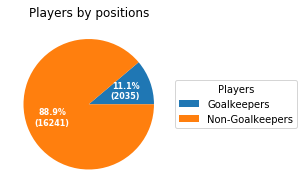

<Figure size 432x288 with 0 Axes>

In [0]:
pie_plot([len(gk_players),len(non_gk_players)], ['Goalkeepers', 'Non-Goalkeepers'], "Players", "Players by positions")

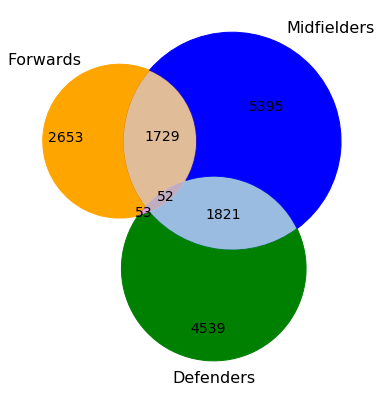

In [0]:
from matplotlib_venn import venn3

fig1, ax1 = plt.subplots(figsize=(7,7))
v=venn3(subsets = (2653, 5395, 1729, 4539, 53, 1821, 52), set_labels = ('Forwards', 'Midfielders', 'Defenders'))
v.get_patch_by_id('100').set_alpha(1.0)
v.get_patch_by_id('100').set_color('orange')
v.get_patch_by_id('010').set_color('blue')
v.get_patch_by_id('010').set_alpha(1.0)
v.get_patch_by_id('001').set_color('green')
v.get_patch_by_id('001').set_alpha(1.0)
for text in v.set_labels:
    text.set_fontsize(16)
for text in v.subset_labels:
    text.set_fontsize(14)
plt.gcf().savefig(f'venn.png', dpi=200,bbox_inches='tight')
plt.show()

#### Foot Preference

In [0]:
lefty = len(players[players.preferred_foot=='Left'])
righty = len(players[players.preferred_foot=='Right'])
print("Left Foot Preferred:", lefty)
print("Right Foot Preferred:", righty)

Left Foot Preferred: 4318
Right Foot Preferred: 13960


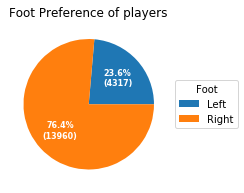

<Figure size 432x288 with 0 Axes>

In [0]:
pie_plot(values=[lefty, righty], labels=["Left", "Right"], legend_title="Foot", set_title="Foot Preference of players")

#### Face Reality

In [0]:
real = len(players[players.real_face=='Yes'])
fake = len(players[players.real_face=='No'])
print("Real face used:", real)
print("Fake face used:", fake)

Real face used: 1968
Fake face used: 16310


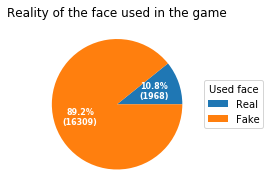

<Figure size 432x288 with 0 Axes>

In [0]:
pie_plot(values=[real, fake], labels=["Real", "Fake"], legend_title="Used face", set_title="Reality of the face used in the game")

#### Player traits and player tags Analysis

In [0]:
player_traits = players['player_traits']
player_traits = player_traits.dropna()
traits = []
for t in player_traits:
    split_traits = t.replace(' (CPU AI Only)', '')
    split_traits = split_traits.split(', ')
    for trait_i in split_traits:
      if trait_i not in traits:
        traits.append(trait_i)
print(len(traits))
print(traits)


27
['Beat Offside Trap', 'Argues with Officials', 'Early Crosser', 'Finesse Shot', 'Speed Dribbler', '1-on-1 Rush', 'Giant Throw-in', 'Outside Foot Shot', 'Long Throw-in', 'Selfish', 'Skilled Dribbling', 'Power Free-Kick', 'Injury Free', 'Crowd Favourite', 'Flair', 'Acrobatic Clearance', 'Avoids Using Weaker Foot', 'Dives Into Tackles', 'Leadership', 'Swerve Pass', 'Flair Passes', 'Diver', 'Long Passer', 'Second Wind', 'Inflexible', 'Injury Prone', 'Long Shot Taker']


In [0]:
player_tags = players['player_tags']
player_tags = player_tags.dropna()
tags = []
for t in player_tags:
    split_tags = t.replace('#', '')
    split_tags = split_tags.split(', ')
    for tags_i in split_tags:
      if tags_i not in tags:
        tags.append(tags_i)
print(len(tags))
print(tags)


17
['Dribbler', 'Distance Shooter', 'Crosser', 'FK Specialist', 'Acrobat', 'Clinical Finisher', 'Complete Forward', 'Speedster', 'Playmaker\xa0 ', 'Complete Midfielder', 'Engine', 'Tackling\xa0', 'Tactician\xa0', 'Strength', 'Complete Defender', 'Aerial Threat', 'Poacher']


###Pre-Processing

#### Handling the last 26 Fields



First we Analyze what the data actually holds. On first glance, we notice that the has 2 parts. The first part is the base ranking and the second part is the highest rank possible. These 2 parts are seperated by +
For example- "46+3"

On thorough examination it is noticiable that the second part (after the +) is same for all the columns of the same player. To confirm this, we make sure that this is true for all the players by examining the data one by one.

In [0]:
#Load the position data to a seperate variable:
position_data=players.iloc[:, 78:]
position_data.head()

ls    st    rs    lw    lf    cf  ...   rwb    lb   lcb    cb   rcb    rb
0  89+2  89+2  89+2  93+2  93+2  93+2  ...  68+2  63+2  52+2  52+2  52+2  63+2
1  91+3  91+3  91+3  89+3  90+3  90+3  ...  65+3  61+3  53+3  53+3  53+3  61+3
2  84+3  84+3  84+3  90+3  89+3  89+3  ...  66+3  61+3  46+3  46+3  46+3  61+3
3   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
4  83+3  83+3  83+3  89+3  88+3  88+3  ...  66+3  61+3  49+3  49+3  49+3  61+3

[5 rows x 26 columns]

In [0]:
pos_offset=[] #Extract the value to be later stored in a new column
pos_unique_list=[] #This list is used to visualize if all the values in the particular player is unique or not
for i in range(position_data.shape[0]):
  sub_data=position_data.iloc[i,:] #get data about the current row
  if not pd.isnull(sub_data[0]): #If value is nan(GK), skip row
    sub_data_split=sub_data.str.split('+').str[1] #split data in all columns by '+', take only 2nd part
    unique_vals=sub_data_split.nunique() # compare all the 2nd parts and get number of unique values
    if unique_vals!=1: #unique_vals==1 implies that all the columns have the same value
      print('Unique vals in row',i,'=',unique_vals)
      break
    else:
      pos_unique_list.append(unique_vals)
      pos_offset.append(sub_data_split[0])
  else:
    pos_offset.append(np.nan)


In [0]:
#Check if this works fine for a random row
rand_index=random.randint(0,18277)
print('Number obtained is',pos_offset[rand_index])
print('Row data-')
position_data.iloc[rand_index, :]

We now see that it is enough to just store the second part of each column just once per row, since it is the same for all the columns. Hence we start to seperate all the values with + and add a new column which stores the second part


In [0]:
#Initialize new DataFrame
position_columns=list(position_data.columns)
position_columns.append('pos_offset')
position_data_new = pd.DataFrame(columns=position_columns)
position_data_new

In [0]:
# Process data from each column
for col in position_data.columns:
  position_data_new[col]=position_data[col].str.split('+').str[0]
position_data_new.pos_offset=pos_offset
position_data_new.head()

In [0]:
players_new=players.iloc[:,:78]
players_new=pd.concat([players_new, position_data_new], axis=1)

In [0]:
players_new.head()

In [0]:
players_new.to_csv('/content/drive/My Drive/Data Mining Lab - FIFA/players_20_new.csv',index=False)

In [0]:
type(players_new.release_clause_eur[68])

### GK Non-GK splitting


We would only use this part of the code later on, after all the pre-processing has been done and we are ready for analysis.

In [0]:
split_data=pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_new.csv")
split_data.head()

In [0]:
#Remove unwanted columns for GK and save to csv file
gk_data=split_data[split_data.player_positions=='GK']
gk_data=gk_data.iloc[:,:78]
gk_drop=['pace','shooting','passing','dribbling','defending','physic']
gk_data=gk_data.drop(columns=gk_drop)
print(gk_data.shape)

gk_data.to_csv('/content/drive/My Drive/Data Mining Lab - FIFA/players_20_GK.csv',index=False)

In [0]:
#Remove unwanted columns for Non GK and save to csv file
non_gk_data=split_data[split_data.player_positions!='GK']
non_gk_drop=['gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning']
non_gk_data=non_gk_data.drop(columns=non_gk_drop)
print(non_gk_data.shape)

non_gk_data.to_csv('/content/drive/My Drive/Data Mining Lab - FIFA/players_20_NonGK.csv',index=False)

# Week 3

In [0]:
#Load from backup 
week3_data = players
print(week3_data.shape)

# Note: In the next sections, the edits are not done on the original data, but on separate dataframes for analysis later. 
# Original data can be transformed in the same way as/when needed.

(18278, 104)


### Encoding features

#### One-hot encoding player tags

In [0]:
#Convert tags to OHE
tags = week3_data.player_tags
tags_ohe = tags.str.get_dummies(sep=', ')
tags_ohe.head()

#Acrobat  #Aerial Threat  ...  #Tackling   #Tactician 
0         1               0  ...           0            0
1         1               0  ...           0            0
2         1               0  ...           0            0
3         0               0  ...           0            0
4         1               0  ...           0            0

[5 rows x 17 columns]

####One-hot encoding player traits

In [0]:
#Convert traits to OHE
traits = week3_data.player_traits
traits_ohe = traits.str.get_dummies(sep=', ')
traits_ohe.columns = traits_ohe.columns.str.replace('\(CPU AI Only\)','')
traits_ohe.head()

1-on-1 Rush  Acrobatic Clearance  ...  Speed Dribbler   Swerve Pass
0            1                    0  ...                1            0
1            0                    0  ...                1            0
2            0                    0  ...                1            0
3            0                    1  ...                0            0
4            0                    0  ...                1            0

[5 rows x 27 columns]

####Encoding position

In [0]:
x=players.team_position.unique()
np.sort(x[~pd.isnull(x)])

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
       'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
       'RDM', 'RES', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB'],
      dtype=object)

In [0]:
x=players.nation_position.unique()
np.sort(x[~pd.isnull(x)])

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'RB', 'RCB', 'RCM', 'RDM', 'RF',
       'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB'], dtype=object)

In [0]:
x=players.player_positions.str.get_dummies(sep=', ')

       CAM  CB  CDM  CF  CM  GK  LB  LM  LW  LWB  RB  RM  RW  RWB  ST
0        0   0    0   1   0   0   0   0   0    0   0   0   1    0   1
1        0   0    0   0   0   0   0   0   1    0   0   0   0    0   1
2        1   0    0   0   0   0   0   0   1    0   0   0   0    0   0
3        0   0    0   0   0   1   0   0   0    0   0   0   0    0   0
4        0   0    0   1   0   0   0   0   1    0   0   0   0    0   0
...    ...  ..  ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ...  ..
18273    0   1    0   0   0   0   0   0   0    0   0   0   0    0   0
18274    0   1    0   0   0   0   0   0   0    0   0   0   0    0   0
18275    0   0    0   0   1   0   0   0   0    0   0   0   0    0   0
18276    0   0    0   0   1   0   0   0   0    0   0   0   0    0   0
18277    0   0    0   0   1   0   0   0   0    0   0   0   0    0   0

[18278 rows x 15 columns]


In [0]:
print(x.columns)

Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB',
       'RM', 'RW', 'RWB', 'ST'],
      dtype='object')


Constructing the lookup table

In [0]:
pos = {'GK': 0, 
        'LS': 1,
        'ST': 2,
        'RS': 3,
        'LW': 4,
        'LF': 5,
        'CF': 6,
        'RF': 7,
        'RW': 8,
        'LB': 9, 
        'LCB': 10,
        'CB' : 11,
        'RCB': 12,
        'RB': 13,
        'LAM': 14,
        'CAM': 15,
        'RAM': 16,
        'LM': 17,
        'LCM': 18,
        'CM' : 19,
        'RCM' : 20,
        'RM': 21,
        'LWB': 22,
        'LDM': 23,
        'CDM': 24,
        'RDM': 25,
        'RWB': 26,
        'SUB': 27,
        'RES': 28, 
        }

In [0]:
team_pos_enc = players.team_position.map(pos)
# Rename feature on data if needed
# week3_data.columns = week3_data.columns.str.replace('preferred_foot','prefers_right_foot')
team_pos_enc.name='team_position_enc'
team_pos_enc.head()

0     8.0
1     4.0
2    15.0
3     0.0
4     4.0
Name: team_position_enc, dtype: float64

#### Label encoding foot preference to boolean

In [0]:
foot = {'Right': True, 'Left': False}
preferred_foot_bool = week3_data['preferred_foot'].map(foot)
# Rename feature on data if needed
# week3_data.columns = week3_data.columns.str.replace('preferred_foot','prefers_right_foot')
preferred_foot_bool.head()

0    False
1     True
2     True
3     True
4     True
Name: preferred_foot, dtype: bool

#### Label encoding for nationality, club, loaned_from using lookup table
Replace Côte d'Ivoire to Ivory Coast in club field - found from 0 wage analysis! 

In [0]:
#Create a dict of sorted unique nations and clubs
#get unique nations
nations = sorted(week3_data['nationality'].unique())
print('Unique nationality ', len(nations), '\n', nations)

#get unique clubs excluding nations
#replace Côte d'Ivoire to Ivory Coast
week3_data['club'] = week3_data['club'].str.replace('Côte d\'Ivoire','Ivory Coast')
nation_not_in_clubs = week3_data[week3_data.nationality!=week3_data.club]
clubs = sorted(nation_not_in_clubs['club'].unique())
print('Unique club ', len(clubs), '\n', clubs)

#join both the lists and create a dict
nations_clubs = nations + clubs
print('Total nations and clubs ', len(nations_clubs))
nations_clubs_dict = dict(zip(nations_clubs,range(len(nations_clubs))))
print('Created dict ', nations_clubs_dict)

#Map the dict to nationality, club, loaned_from
week3_data['nationality'] = week3_data['nationality'].map(nations_clubs_dict)
week3_data['club'] = week3_data['club'].map(nations_clubs_dict)
week3_data['loaned_from'] = week3_data['loaned_from'].map(nations_clubs_dict)

Unique nationality  162 
 ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Barbados', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada', 'Cape Verde', 'Central African Rep.', 'Chad', 'Chile', 'China PR', 'Chinese Taipei', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'DR Congo', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'FYR Macedonia', 'Faroe Islands', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Jap

In [0]:
#print(week3_data['nationality'].isnull().sum())      # 0
#print(week3_data['club'].isnull().sum())             # 0
#print(week3_data['loaned_from'].isnull().sum())      # 17231
#print(week3_data['loaned_from'].value_counts())      # type is float - so convert it to int for non null values...
week3_data['loaned_from'] = week3_data['loaned_from'].astype('Int64') 

### Descriptive Mining

#### Wage and value analysis for 0 cases

In [0]:
# Get players with 0 wage
wage0_players = week3_data[week3_data.wage_eur==0]
print('Players earning 0 wage:', len(wage0_players))
# Get players with 0 value
value0_players = week3_data[week3_data.value_eur==0]
print('Players having 0 value:', len(value0_players))

Players earning 0 wage: 240
Players having 0 value: 250


In [0]:
#Verify that all wage 0 players also have value 0
assert(len(wage0_players[wage0_players.value_eur>0]) == 0)

Assertion succeeds, proving our assumption that players earning 0 wage do not have a value.

In [0]:
#Idenitify the players with 0 value but who earn a non-zero wage
value0_players[value0_players.wage_eur>0][['long_name','player_positions','value_eur','wage_eur','nationality','club']]

long_name  ...                    club
868              Vitorino Hilton da Silva  ...         Montpellier HSC
1880        Claudio Miguel Pizarro Bossio  ...        SV Werder Bremen
2963                       Dario Dainelli  ...                 Livorno
7230                              이동국 李东国  ...  Jeonbuk Hyundai Motors
8359                Fabián Alberto Cubero  ...         Vélez Sarsfield
10665                         Frode Kippe  ...           Lillestrøm SK
13003  Hussein Omar Abdul Ghani Sulaimani  ...                 Al Ahli
14527                       Dannie Bulman  ...            Crawley Town
16314                       Kevin Ellison  ...               Morecambe
18233                                  周挺  ...        Dalian YiFang FC

[10 rows x 6 columns]

Here, we have found players whose value is 0 but they do earn a wage.

In [0]:
# Check if the club and country are the same for players with 0 wage (suspected national players)
print((wage0_players['nationality'] != wage0_players['club']).value_counts())

False    233
True       7
dtype: int64


In [0]:
#Get the 0 wage players whose club and country are not the same
nat_club_unequal = wage0_players.loc[wage0_players['nationality'] != wage0_players['club']]
nat_club_unequal[['long_name','player_positions','wage_eur','nationality','club']]

long_name player_positions  ...  nationality           club
1995   Wilfried Guemiand Bony               ST  ...  Ivory Coast  Côte d'Ivoire
6013    Cheick Ibrahim Comara           CB, LB  ...  Ivory Coast  Côte d'Ivoire
6494        Badra Ali Sangaré               GK  ...  Ivory Coast  Côte d'Ivoire
8322          Sylvain Gbohouo               GK  ...  Ivory Coast  Côte d'Ivoire
8673         Mamadou Bagayoko          RB, RWB  ...  Ivory Coast  Côte d'Ivoire
15233         Wonlo Coulibaly               LB  ...  Ivory Coast  Côte d'Ivoire
16600        Eliezer Ira Tape               GK  ...  Ivory Coast  Côte d'Ivoire

[7 rows x 5 columns]

Here, we see that it's a naming issue where the original nam of the country (Côte d'Ivoire) differs from the nationality (Ivory Coast). Otherwise, we have confirmed that 0 wage players never play for a club.

This has to be handled through converting the fields to have only one value.

We will keep Ivory Coast for both features. 


#### Who have got real face in the video game?
Just curious to see if all the real face players are very good players.

Number of real face players  (1968, 104)
Min, max overall rating of players with real face  55 94
Min, max overall rating of players with fake face  48 86


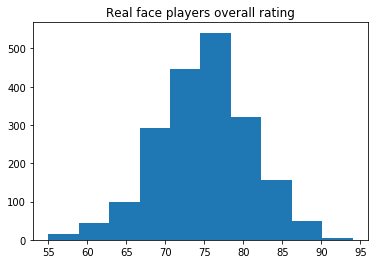

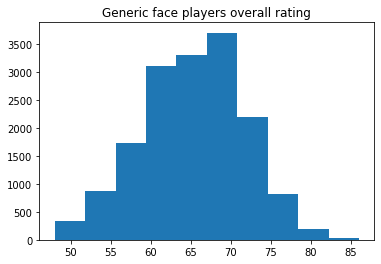

<Figure size 432x288 with 0 Axes>

In [0]:
real_face_players = week3_data[week3_data.real_face=='Yes']
print('Number of real face players ',real_face_players.shape)
print('Min, max overall rating of players with real face ', real_face_players['overall'].min(), real_face_players['overall'].max())
fake_face_players = week3_data[week3_data.real_face=='No']
print('Min, max overall rating of players with fake face ',fake_face_players['overall'].min(), fake_face_players['overall'].max())
fig = plt.gcf()
plt.figure(1, figsize=(5,5))
plt.hist(real_face_players['overall'])
plt.title('Real face players overall rating')
plt.show()
plt.draw()
fig.savefig('real_face.png', dpi=150)
fig1 = plt.gcf()
plt.hist(fake_face_players['overall'])
plt.title('Generic face players overall rating')
plt.show()
plt.draw()
fig1.savefig('fake_face.png', dpi=150)

So, the players with real face are famous but not necessarily the best players (with very good rating)
We could see why the players with low ratings are having real face but not the highly rated players...


## Removing redundant features 

In [0]:
print('Unique short_name ', week3_data['short_name'].nunique())
print(week3_data['short_name'].value_counts())
print('\n Unique long_name ', week3_data['long_name'].nunique())
print(week3_data['long_name'].value_counts())

Unique short_name  17354
J. Rodríguez    11
Paulinho         9
J. García        8
J. Williams      7
J. Hernández     7
                ..
L. Doyle         1
K. Drzazga       1
N. Vidrio        1
C. Elder         1
N. Correa        1
Name: short_name, Length: 17354, dtype: int64

 Unique long_name  18218
Liam Kelly             3
Patrick Herrmann       2
李帅                     2
Richard Sánchez        2
Joe Walsh              2
                      ..
Emil Cuello            1
Mix Diskerud           1
王伟                     1
Ludwig Augustinsson    1
Dennis Geiger          1
Name: long_name, Length: 18218, dtype: int64


short_name has too many same values for players compared to long_name. So, it's better to keep the long_name and remove the short_name. long_name along with sofifa_id will help in identifying players uniquely.


# Week 4

## Correlation in the dataset


Get the correlation matrix of Numerical features of Non-GK rows

In [0]:
import seaborn as sns 
data = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_new.csv")
nongk=data[data.player_positions!='GK']
nongk_num=nongk._get_numeric_data().drop(['nationality_enc','club_enc','loaned_from_enc','sofifa_id','team_jersey_number','contract_valid_until','nation_jersey_number','gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'],axis=1)

corr=nongk_num.corr()
corr

age  height_cm  weight_kg  ...       rcb        rb  pos_offset
age         1.000000   0.065503   0.222893  ...  0.343895  0.318953    0.136683
height_cm   0.065503   1.000000   0.752597  ...  0.274353  0.035919    0.023306
weight_kg   0.222893   0.752597   1.000000  ...  0.303054  0.085228    0.047727
overall     0.465977   0.065984   0.182136  ...  0.470980  0.573229    0.310158
potential  -0.275971   0.021387   0.009379  ...  0.218262  0.318883    0.246128
...              ...        ...        ...  ...       ...       ...         ...
lcb         0.343895   0.274353   0.303054  ...  1.000000  0.923917    0.114075
cb          0.343895   0.274353   0.303054  ...  1.000000  0.923917    0.114075
rcb         0.343895   0.274353   0.303054  ...  1.000000  0.923917    0.114075
rb          0.318953   0.035919   0.085228  ...  0.923917  1.000000    0.143634
pos_offset  0.136683   0.023306   0.047727  ...  0.114075  0.143634    1.000000

[83 rows x 83 columns]

## Init Encoded Data

In [0]:
players_enc = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_new.csv")
print(players_enc.shape)
players_enc.head()

(18278, 114)


sofifa_id  ... pos_offset
0     158023  ...        2.0
1      20801  ...        3.0
2     190871  ...        3.0
3     200389  ...        NaN
4     183277  ...        3.0

[5 rows x 114 columns]

In [0]:
nations = players_enc.nationality_enc.max()
clubs = players_enc.club_enc.max()
week4_data = players_enc

In [0]:
lookup = {'Afghanistan': 0, 'Albania': 1, 'Algeria': 2, 'Angola': 3, 'Antigua & Barbuda': 4, 'Argentina': 5, 'Armenia': 6, 'Australia': 7, 'Austria': 8, 'Azerbaijan': 9, 'Bahrain': 10, 'Barbados': 11, 'Belgium': 12, 'Belize': 13, 'Benin': 14, 'Bermuda': 15, 'Bolivia': 16, 'Bosnia Herzegovina': 17, 'Brazil': 18, 'Bulgaria': 19, 'Burkina Faso': 20, 'Burundi': 21, 'Cameroon': 22, 'Canada': 23, 'Cape Verde': 24, 'Central African Rep.': 25, 'Chad': 26, 'Chile': 27, 'China PR': 28, 'Chinese Taipei': 29, 'Colombia': 30, 'Comoros': 31, 'Congo': 32, 'Costa Rica': 33, 'Croatia': 34, 'Cuba': 35, 'Curacao': 36, 'Cyprus': 37, 'Czech Republic': 38, 'DR Congo': 39, 'Denmark': 40, 'Dominican Republic': 41, 'Ecuador': 42, 'Egypt': 43, 'El Salvador': 44, 'England': 45, 'Equatorial Guinea': 46, 'Eritrea': 47, 'Estonia': 48, 'Ethiopia': 49, 'FYR Macedonia': 50, 'Faroe Islands': 51, 'Finland': 52, 'France': 53, 'Gabon': 54, 'Gambia': 55, 'Georgia': 56, 'Germany': 57, 'Ghana': 58, 'Gibraltar': 59, 'Greece': 60, 'Grenada': 61, 'Guam': 62, 'Guatemala': 63, 'Guinea': 64, 'Guinea Bissau': 65, 'Guyana': 66, 'Haiti': 67, 'Honduras': 68, 'Hong Kong': 69, 'Hungary': 70, 'Iceland': 71, 'India': 72, 'Indonesia': 73, 'Iran': 74, 'Iraq': 75, 'Israel': 76, 'Italy': 77, 'Ivory Coast': 78, 'Jamaica': 79, 'Japan': 80, 'Jordan': 81, 'Kazakhstan': 82, 'Kenya': 83, 'Korea DPR': 84, 'Korea Republic': 85, 'Kosovo': 86, 'Latvia': 87, 'Lebanon': 88, 'Liberia': 89, 'Libya': 90, 'Liechtenstein': 91, 'Lithuania': 92, 'Luxembourg': 93, 'Macau': 94, 'Madagascar': 95, 'Malawi': 96, 'Mali': 97, 'Malta': 98, 'Mauritania': 99, 'Mauritius': 100, 'Mexico': 101, 'Moldova': 102, 'Montenegro': 103, 'Montserrat': 104, 'Morocco': 105, 'Mozambique': 106, 'Namibia': 107, 'Netherlands': 108, 'New Caledonia': 109, 'New Zealand': 110, 'Niger': 111, 'Nigeria': 112, 'Northern Ireland': 113, 'Norway': 114, 'Palestine': 115, 'Panama': 116, 'Paraguay': 117, 'Peru': 118, 'Philippines': 119, 'Poland': 120, 'Portugal': 121, 'Puerto Rico': 122, 'Republic of Ireland': 123, 'Romania': 124, 'Russia': 125, 'Rwanda': 126, 'Saudi Arabia': 127, 'Scotland': 128, 'Senegal': 129, 'Serbia': 130, 'Sierra Leone': 131, 'Slovakia': 132, 'Slovenia': 133, 'South Africa': 134, 'South Sudan': 135, 'Spain': 136, 'St Kitts Nevis': 137, 'St Lucia': 138, 'Sudan': 139, 'Suriname': 140, 'Sweden': 141, 'Switzerland': 142, 'Syria': 143, 'São Tomé & Príncipe': 144, 'Tanzania': 145, 'Thailand': 146, 'Togo': 147, 'Trinidad & Tobago': 148, 'Tunisia': 149, 'Turkey': 150, 'Uganda': 151, 'Ukraine': 152, 'United Arab Emirates': 153, 'United States': 154, 'Uruguay': 155, 'Uzbekistan': 156, 'Venezuela': 157, 'Vietnam': 158, 'Wales': 159, 'Zambia': 160, 'Zimbabwe': 161, ' SSV Jahn Regensburg': 162, '1. FC Heidenheim 1846': 163, '1. FC Kaiserslautern': 164, '1. FC Köln': 165, '1. FC Magdeburg': 166, '1. FC Nürnberg': 167, '1. FC Union Berlin': 168, '1. FSV Mainz 05': 169, 'AC Ajaccio': 170, 'AC Horsens': 171, 'AD Alcorcón': 172, 'ADO Den Haag': 173, 'AEK Athens': 174, 'AFC Eskilstuna': 175, 'AFC Wimbledon': 176, 'AIK': 177, 'AJ Auxerre': 178, 'AS Monaco': 179, 'AS Nancy Lorraine': 180, 'AS Saint-Étienne': 181, 'AZ Alkmaar': 182, 'Aalborg BK': 183, 'Aarhus GF': 184, 'Aberdeen': 185, 'Abha Club': 186, 'Academica Clinceni': 187, 'Accrington Stanley': 188, 'Adelaide United': 189, 'Ajax': 190, 'Al Adalah': 191, 'Al Ahli': 192, 'Al Ain FC': 193, 'Al Faisaly': 194, 'Al Fateh': 195, 'Al Fayha': 196, 'Al Hazem': 197, 'Al Hilal': 198, 'Al Ittihad': 199, 'Al Nassr': 200, 'Al Raed': 201, 'Al Shabab': 202, 'Al Taawoun': 203, 'Al Wehda': 204, 'Alanyaspor': 205, 'Albacete BP': 206, 'Alianza Petrolera': 207, 'Amiens SC': 208, 'América de Cali': 209, 'Angers SCO': 210, 'Antalyaspor': 211, 'Argentinos Juniors': 212, 'Arka Gdynia': 213, 'Arsenal': 214, 'Arsenal de Sarandí': 215, 'Ascoli': 216, 'Aston Villa': 217, 'Astra Giurgiu': 218, 'Atalanta': 219, 'Athletic Club de Bilbao': 220, 'Atiker Konyaspor': 221, 'Atlanta United': 222, 'Atlético Bucaramanga': 223, 'Atlético Huila': 224, 'Atlético Madrid': 225, 'Atlético Mineiro': 226, 'Atlético Nacional': 227, 'Atlético Paranaense': 228, 'Atlético Tucumán': 229, 'Atlético de San Luis': 230, 'Audax Italiano': 231, 'Avaí FC': 232, 'BK Häcken': 233, 'BSC Young Boys': 234, 'Bahia': 235, 'Barnsley': 236, 'Bayer 04 Leverkusen': 237, 'Bayern München II': 238, 'Beijing Renhe FC': 239, 'Beijing Sinobo Guoan FC': 240, 'Benevento': 241, 'Beşiktaş JK': 242, 'Birmingham City': 243, 'Blackburn Rovers': 244, 'Blackpool': 245, 'Boavista FC': 246, 'Boca Juniors': 247, 'Bohemian FC': 248, 'Bologna': 249, 'Bolton Wanderers': 250, 'Borussia Dortmund': 251, 'Borussia Mönchengladbach': 252, 'Botafogo': 253, 'Bournemouth': 254, 'Bradford City': 255, 'Brentford': 256, 'Brescia': 257, 'Brighton & Hove Albion': 258, 'Brisbane Roar': 259, 'Bristol City': 260, 'Bristol Rovers': 261, 'Brøndby IF': 262, 'Burnley': 263, 'Burton Albion': 264, 'Bury': 265, 'CA Osasuna': 266, 'CD Antofagasta': 267, 'CD Aves': 268, 'CD Cobresal': 269, 'CD Everton de Viña del Mar': 270, 'CD Huachipato': 271, 'CD Leganés': 272, 'CD Lugo': 273, 'CD Mirandés': 274, 'CD Numancia': 275, "CD O'Higgins": 276, 'CD Palestino': 277, 'CD Tenerife': 278, 'CD Tondela': 279, 'CD Universidad de Concepción': 280, 'CF Fuenlabrada': 281, 'CFR Cluj': 282, 'CSA - AL': 283, 'Cagliari': 284, 'Cambridge United': 285, 'Cardiff City': 286, 'Carlisle United': 287, 'Castellammare di Stabia': 288, 'Ceará Sporting Club': 289, 'Celtic': 290, 'Central Coast Mariners': 291, 'Central Córdoba': 292, 'Cerezo Osaka': 293, 'Chamois Niortais Football Club': 294, 'Chapecoense': 295, 'Charlton Athletic': 296, 'Chelsea': 297, 'Cheltenham Town': 298, 'Chemnitzer FC': 299, 'Chicago Fire': 300, 'Chievo Verona': 301, 'Chindia Târgovişte': 302, 'Chongqing Dangdai Lifan FC SWM Team': 303, 'Cittadella': 304, 'Clermont Foot 63': 305, 'Club América': 306, 'Club Atlas': 307, 'Club Atlético Aldosivi': 308, 'Club Atlético Banfield': 309, 'Club Atlético Colón': 310, 'Club Atlético Huracán': 311, 'Club Atlético Lanús': 312, 'Club Atlético Talleres': 313, 'Club Brugge KV': 314, 'Club León': 315, 'Club Necaxa': 316, 'Club Tijuana': 317, 'Clube Sport Marítimo': 318, 'Colchester United': 319, 'Colo-Colo': 320, 'Colorado Rapids': 321, 'Columbus Crew SC': 322, 'Coquimbo Unido': 323, 'Cork City': 324, 'Cosenza': 325, 'Coventry City': 326, 'Cracovia': 327, 'Crawley Town': 328, 'Crewe Alexandra': 329, 'Crotone': 330, 'Cruz Azul': 331, 'Cruzeiro': 332, 'Crystal Palace': 333, 'Curicó Unido': 334, 'Cádiz CF': 335, 'Cúcuta Deportivo': 336, 'DC United': 337, 'DSC Arminia Bielefeld': 338, 'Daegu FC': 339, 'Dalian YiFang FC': 340, 'Damac FC': 341, 'Defensa y Justicia': 342, 'Denizlispor': 343, 'Deportes Iquique': 344, 'Deportes Tolima': 345, 'Deportivo Alavés': 346, 'Deportivo Cali': 347, 'Deportivo Pasto': 348, 'Deportivo Toluca': 349, 'Deportivo de La Coruña': 350, 'Derby County': 351, 'Derry City': 352, 'Dijon FCO': 353, 'Dinamo Bucureşti': 354, 'Dinamo Zagreb': 355, 'Djurgårdens IF': 356, 'Doncaster Rovers': 357, 'Dundalk': 358, 'Dynamo Kyiv': 359, 'ESTAC Troyes': 360, 'Eintracht Braunschweig': 361, 'Eintracht Frankfurt': 362, 'Elche CF': 363, 'Empoli': 364, 'En Avant de Guingamp': 365, 'Envigado FC': 366, 'Esbjerg fB': 367, 'Estudiantes de La Plata': 368, 'Ettifaq FC': 369, 'Everton': 370, 'Exeter City': 371, 'Extremadura UD': 372, 'FC Admira Wacker Mödling': 373, 'FC Augsburg': 374, 'FC Barcelona': 375, 'FC Basel 1893': 376, 'FC Bayern München': 377, 'FC Botoşani': 378, 'FC Carl Zeiss Jena': 379, 'FC Chambly Oise': 380, 'FC Cincinnati': 381, 'FC Dallas': 382, 'FC Emmen': 383, 'FC Erzgebirge Aue': 384, 'FC Girondins de Bordeaux': 385, 'FC Groningen': 386, 'FC Hansa Rostock': 387, 'FC Hermannstadt': 388, 'FC Ingolstadt 04': 389, 'FC Juárez': 390, 'FC København': 391, 'FC Lorient': 392, 'FC Lugano': 393, 'FC Luzern': 394, 'FC Metz': 395, 'FC Midtjylland': 396, 'FC Nantes': 397, 'FC Nordsjælland': 398, 'FC Paços de Ferreira': 399, 'FC Porto': 400, 'FC Red Bull Salzburg': 401, 'FC Schalke 04': 402, 'FC Seoul': 403, 'FC Sion': 404, 'FC Sochaux-Montbéliard': 405, 'FC St. Gallen': 406, 'FC St. Pauli': 407, 'FC Thun': 408, 'FC Tokyo': 409, 'FC Twente': 410, 'FC Utrecht': 411, 'FC Viitorul': 412, 'FC Voluntari': 413, 'FC Würzburger Kickers': 414, 'FC Zürich': 415, 'FCSB (Steaua)': 416, 'FK Austria Wien': 417, 'FK Bodø/Glimt': 418, 'FK Haugesund': 419, 'FSV Zwickau': 420, 'Falkenbergs FF': 421, 'Famalicão': 422, 'Fenerbahçe SK': 423, 'Feyenoord': 424, 'Finn Harps': 425, 'Fiorentina': 426, 'Fleetwood Town': 427, 'Fluminense': 428, 'Forest Green Rovers': 429, 'Fortaleza': 430, 'Fortuna Düsseldorf': 431, 'Fortuna Sittard': 432, 'Frosinone': 433, 'Fulham': 434, 'GIF Sundsvall': 435, 'Galatasaray SK': 436, 'Gamba Osaka': 437, 'Gangwon FC': 438, 'Gaz Metan Mediaş': 439, 'Gazişehir Gaziantep F.K.': 440, 'Genoa': 441, 'Gençlerbirliği SK': 442, 'Getafe CF': 443, 'Gil Vicente FC': 444, 'Gillingham': 445, 'Gimnasia y Esgrima La Plata': 446, 'Girona FC': 447, 'Godoy Cruz': 448, 'Goiás': 449, 'Granada CF': 450, 'Grenoble Foot 38': 451, 'Grimsby Town': 452, 'Grêmio': 453, 'Guadalajara': 454, 'Guangzhou Evergrande Taobao FC': 455, 'Guangzhou R&F FC': 456, 'Gyeongnam FC': 457, 'Górnik Zabrze': 458, 'Göztepe SK': 459, 'HJK Helsinki': 460, 'Hallescher FC': 461, 'Hamburger SV': 462, 'Hamilton Academical FC': 463, 'Hammarby IF': 464, 'Hannover 96': 465, 'Heart of Midlothian': 466, 'Hebei China Fortune FC': 467, 'Hellas Verona': 468, 'Helsingborgs IF': 469, 'Henan Jianye FC': 470, 'Heracles Almelo': 471, 'Hertha BSC': 472, 'Hibernian': 473, 'Hobro IK': 474, 'Hokkaido Consadole Sapporo': 475, 'Holstein Kiel': 476, 'Houston Dynamo': 477, 'Huddersfield Town': 478, 'Hull City': 479, 'IF Elfsborg': 480, 'IFK Göteborg': 481, 'IFK Norrköping': 482, 'IK Sirius': 483, 'Incheon United FC': 484, 'Independiente': 485, 'Independiente Medellín': 486, 'Independiente Santa Fe': 487, 'Inter': 488, 'Internacional': 489, 'Ipswich Town': 490, 'Jagiellonia Białystok': 491, 'Jaguares de Córdoba': 492, 'Jeju United FC': 493, 'Jeonbuk Hyundai Motors': 494, 'Jiangsu Suning FC': 495, 'Junior FC': 496, 'Juventus': 497, 'Júbilo Iwata': 498, 'KAA Gent': 499, 'KAS Eupen': 500, 'KFC Uerdingen 05': 501, 'KRC Genk': 502, 'KSV Cercle Brugge': 503, 'KV Kortrijk': 504, 'KV Mechelen': 505, 'KV Oostende': 506, 'Kaizer Chiefs': 507, 'Kalmar FF': 508, 'Karlsruher SC': 509, 'Kashima Antlers': 510, 'Kasimpaşa SK': 511, 'Kawasaki Frontale': 512, 'Kayserispor': 513, 'Kilmarnock': 514, 'Korona Kielce': 515, 'Kristiansund BK': 516, 'LA Galaxy': 517, 'LASK Linz': 518, 'LKS Lodz': 519, 'LOSC Lille': 520, 'La Berrichonne de Châteauroux': 521, 'La Equidad': 522, 'Lazio': 523, 'Le Havre AC': 524, 'Le Mans FC': 525, 'Lecce': 526, 'Lech Poznań': 527, 'Lechia Gdańsk': 528, 'Leeds United': 529, 'Legia Warszawa': 530, 'Leicester City': 531, 'Levante UD': 532, 'Leyton Orient': 533, 'Lillestrøm SK': 534, 'Lincoln City': 535, 'Liverpool': 536, 'Livingston FC': 537, 'Livorno': 538, 'Lokomotiv Moscow': 539, 'Los Angeles FC': 540, 'Luton Town': 541, 'Lyngby BK': 542, 'MKE Ankaragücü': 543, 'MSV Duisburg': 544, 'Macclesfield Town': 545, 'Malmö FF': 546, 'Manchester City': 547, 'Manchester United': 548, 'Mansfield Town': 549, 'Matsumoto Yamaga': 550, 'Medipol Başakşehir FK': 551, 'Melbourne City FC': 552, 'Melbourne Victory': 553, 'Middlesbrough': 554, 'Milan': 555, 'Millonarios FC': 556, 'Millwall': 557, 'Milton Keynes Dons': 558, 'Minnesota United FC': 559, 'Mjøndalen IF': 560, 'Molde FK': 561, 'Monarcas Morelia': 562, 'Monterrey': 563, 'Montpellier HSC': 564, 'Montreal Impact': 565, 'Morecambe': 566, 'Moreirense FC': 567, 'Motherwell': 568, 'Málaga CF': 569, 'Nagoya Grampus': 570, 'Napoli': 571, 'Neuchâtel Xamax': 572, 'New England Revolution': 573, 'New York City FC': 574, 'New York Red Bulls': 575, 'Newcastle Jets': 576, 'Newcastle United': 577, "Newell's Old Boys": 578, 'Newport County': 579, 'Northampton Town': 580, 'Norwich City': 581, 'Nottingham Forest': 582, 'Nîmes Olympique': 583, 'OGC Nice': 584, 'Odds BK': 585, 'Odense Boldklub': 586, 'Oita Trinita': 587, 'Oldham Athletic': 588, 'Olympiacos CFP': 589, 'Olympique Lyonnais': 590, 'Olympique de Marseille': 591, 'Once Caldas': 592, 'Orlando City SC': 593, 'Orlando Pirates': 594, 'Os Belenenses': 595, 'Oxford United': 596, 'PAOK': 597, 'PEC Zwolle': 598, 'PFC CSKA Moscow': 599, 'PSV': 600, 'Pachuca': 601, 'Panathinaikos FC': 602, 'Paris FC': 603, 'Paris Saint-Germain': 604, 'Parma': 605, 'Patriotas Boyacá FC': 606, 'Patronato': 607, 'Perth Glory': 608, 'Perugia': 609, 'Pescara': 610, 'Peterborough United': 611, 'Philadelphia Union': 612, 'Piast Gliwice': 613, 'Pisa': 614, 'Plymouth Argyle': 615, 'Pogoń Szczecin': 616, 'Pohang Steelers': 617, 'Politehnica Iaşi': 618, 'Pordenone': 619, 'Port Vale': 620, 'Portimonense SC': 621, 'Portland Timbers': 622, 'Portsmouth': 623, 'Preston North End': 624, 'Puebla FC': 625, 'Queens Park Rangers': 626, 'Querétaro': 627, 'RB Leipzig': 628, 'RC Celta': 629, 'RC Strasbourg Alsace': 630, 'RCD Espanyol': 631, 'RCD Mallorca': 632, 'RKC Waalwijk': 633, 'RSC Anderlecht': 634, 'Racing Club': 635, 'Racing Club de Lens': 636, 'Racing Santander': 637, 'Raków Częstochowa': 638, 'Randers FC': 639, 'Rangers FC': 640, 'Ranheim Fotball': 641, 'Rayo Vallecano': 642, 'Reading': 643, 'Real Betis': 644, 'Real Madrid': 645, 'Real Oviedo': 646, 'Real Salt Lake': 647, 'Real Sociedad': 648, 'Real Sporting de Gijón': 649, 'Real Valladolid CF': 650, 'Real Zaragoza': 651, 'Rio Ave FC': 652, 'Rionegro Águilas': 653, 'River Plate': 654, 'Rochdale': 655, 'Rodez Aveyron Football': 656, 'Roma': 657, 'Rosario Central': 658, 'Rosenborg BK': 659, 'Ross County FC': 660, 'Rotherham United': 661, 'Royal Antwerp FC': 662, 'Royal Excel Mouscron': 663, 'SC Braga': 664, 'SC Freiburg': 665, 'SC Heerenveen': 666, 'SC Paderborn 07': 667, 'SC Preußen Münster': 668, 'SCR Altach': 669, 'SD Eibar': 670, 'SD Huesca': 671, 'SD Ponferradina': 672, 'SG Dynamo Dresden': 673, 'SG Sonnenhof Großaspach': 674, 'SK Brann': 675, 'SK Rapid Wien': 676, 'SK Slavia Praha': 677, 'SK Sturm Graz': 678, 'SKN St. Pölten': 679, 'SL Benfica': 680, 'SPAL': 681, 'SV Darmstadt 98': 682, 'SV Mattersburg': 683, 'SV Meppen': 684, 'SV Sandhausen': 685, 'SV Waldhof Mannheim': 686, 'SV Wehen Wiesbaden': 687, 'SV Werder Bremen': 688, 'SV Zulte-Waregem': 689, 'Sagan Tosu': 690, 'Salford City': 691, 'Sampdoria': 692, 'San Jose Earthquakes': 693, 'San Lorenzo de Almagro': 694, 'Sanfrecce Hiroshima': 695, 'Sangju Sangmu FC': 696, 'Santa Clara': 697, 'Santos': 698, 'Santos Laguna': 699, 'Sarpsborg 08 FF': 700, 'Sassuolo': 701, 'Scunthorpe United': 702, 'Seattle Sounders FC': 703, 'Seongnam FC': 704, 'Sepsi OSK': 705, 'Servette FC': 706, 'Sevilla FC': 707, 'Shakhtar Donetsk': 708, 'Shamrock Rovers': 709, 'Shandong Luneng TaiShan FC': 710, 'Shanghai Greenland Shenhua FC': 711, 'Shanghai SIPG FC': 712, 'Sheffield United': 713, 'Sheffield Wednesday': 714, 'Shenzhen FC': 715, 'Shimizu S-Pulse': 716, 'Shonan Bellmare': 717, 'Shrewsbury': 718, 'Silkeborg IF': 719, 'Sint-Truidense VV': 720, 'Sivasspor': 721, 'Sligo Rovers': 722, 'Southampton': 723, 'Southend United': 724, 'SpVgg Greuther Fürth': 725, 'SpVgg Unterhaching': 726, 'Sparta Praha': 727, 'Sparta Rotterdam': 728, 'Spartak Moscow': 729, 'Spezia': 730, 'Sporting CP': 731, 'Sporting Kansas City': 732, 'Sporting de Charleroi': 733, 'St. Johnstone FC': 734, 'St. Mirren': 735, "St. Patrick's Athletic": 736, 'Stabæk Fotball': 737, 'Stade Brestois 29': 738, 'Stade Malherbe Caen': 739, 'Stade Rennais FC': 740, 'Stade de Reims': 741, 'Standard de Liège': 742, 'Stevenage': 743, 'Stoke City': 744, 'Strømsgodset IF': 745, 'Sunderland': 746, 'Suwon Samsung Bluewings': 747, 'Swansea City': 748, 'Swindon Town': 749, 'Sydney FC': 750, 'SønderjyskE': 751, 'TSG 1899 Hoffenheim': 752, 'TSV 1860 München': 753, 'TSV Hartberg': 754, 'Tianjin Quanjian FC': 755, 'Tianjin TEDA FC': 756, 'Tiburones Rojos de Veracruz': 757, 'Tigres U.A.N.L.': 758, 'Torino': 759, 'Toronto FC': 760, 'Tottenham Hotspur': 761, 'Toulouse Football Club': 762, 'Trabzonspor': 763, 'Tranmere Rovers': 764, 'Trapani': 765, 'Tromsø IL': 766, 'U.N.A.M.': 767, 'UCD AFC': 768, 'UD Almería': 769, 'UD Las Palmas': 770, 'US Cremonese': 771, 'US Orléans Loiret Football': 772, 'US Salernitana 1919': 773, 'Udinese': 774, 'Ulsan Hyundai FC': 775, 'Universidad Católica': 776, 'Universidad de Chile': 777, 'Universitatea Craiova': 778, 'Unión Española': 779, 'Unión La Calera': 780, 'Unión Magdalena': 781, 'Unión de Santa Fe': 782, 'Urawa Red Diamonds': 783, 'VVV-Venlo': 784, 'Valencia CF': 785, 'Valenciennes FC': 786, 'Vancouver Whitecaps FC': 787, 'Vegalta Sendai': 788, 'Venezia FC': 789, 'VfB Stuttgart': 790, 'VfL Bochum 1848': 791, 'VfL Osnabrück': 792, 'VfL Wolfsburg': 793, 'Viking FK': 794, 'Viktoria Köln': 795, 'Viktoria Plzeň': 796, 'Villarreal CF': 797, 'Virtus Entella': 798, 'Vissel Kobe': 799, 'Vitesse': 800, 'Vitória Guimarães': 801, 'Vitória de Setúbal': 802, 'Vålerenga Fotball': 803, 'Vélez Sarsfield': 804, 'WSG Tirol': 805, 'Waasland-Beveren': 806, 'Walsall': 807, 'Waterford FC': 808, 'Watford': 809, 'Wellington Phoenix': 810, 'West Bromwich Albion': 811, 'West Ham United': 812, 'Western United FC': 813, 'Wigan Athletic': 814, 'Willem II': 815, 'Wisła Kraków': 816, 'Wisła Płock': 817, 'Wolfsberger AC': 818, 'Wolverhampton Wanderers': 819, 'Wuhan Zall': 820, 'Wycombe Wanderers': 821, 'Yeni Malatyaspor': 822, 'Yokohama F. Marinos': 823, 'Zagłębie Lubin': 824, 'Çaykur Rizespor': 825, 'Örebro SK': 826, 'Östersunds FK': 827, 'Śląsk Wrocław': 828}
teams_list = list(lookup.keys())

## 10 Highest Teams by Selected Features

There are some nations with only 1 players and with high values. Those do not show players from that nation are the best. I added 11 players threshold to prevent that case. Add `high_res=True` parameter to get high resolution images.

In [0]:
import math
def ten_best_of_feature(players, team="National", feature="overall", high_res=False, reverse=True, figname='default.png'):
  # Init by team
  if team == "National":
    team_type_enc="nationality_enc"
    range_from=0
    range_to=nations
  else:
    team = "Club"
    team_type_enc="club_enc"
    range_from=nations
    range_to=clubs

  teams = []
  means = []
  for c in range(range_from, range_to):
    players_in_c = players[players[team_type_enc]==c]
    d_mean = round(players_in_c[feature].mean(),2)
    d_std = round(players_in_c[feature].std(),2)
    if len(players_in_c)>10:
      teams.append(f"{teams_list[c]} ({len(players_in_c)})")
      means.append(d_mean)
      # print(teams_list[c])
      # print("#players",len(players_in_c))
      # print("Mean:", d_mean)
      # print("Std:",d_std)
      # print()
  means, teams = zip(*sorted(zip(means, teams), reverse=reverse))

  plot_means(team, means, teams, feature, high_res=high_res, reverse=reverse, figname=figname)

In [0]:
def plot_means(team, means, teams, feature, high_res=False, reverse=True, figname='default.png'):
  # Init by feature
  ylims = None
  if feature=='overall':
    ylims = 65,90
    color=["blue"]
  elif feature=='value_eur':
    ylims = 4000000,40000000
    color=["red"]
  elif feature=='wage_eur':
    ylims = 10000,200000
    color=["orange"]
  elif feature=='age':
    ylims = 15,40
    color=["green"]
  elif feature=='potential':
    ylims = 65,90
    color=["magenta"]
  else:
    color=["black"]

  title = "Highest"
  if not reverse:
    title = "Lowest"
  
  df = pd.DataFrame({'means': means[:10]}, index=teams[:10])
  plt.figure(1, figsize=(5,5))
  if high_res:
    ax = df.plot(kind='bar', color=color, fontsize=15)
  else:
    ax = df.plot(kind='bar', color=color)
  ax.set_title(f"10 {title} {team} Teams by {feature}")
  xlabel = ax.set_xlabel(f"{team} Teams (# of Players)")
  ylabel = ax.set_ylabel(feature)

  if high_res:
    fontsize = 15
    ax.figure.set_size_inches(15,10)
    ax.title.set_size(fontsize)
    xlabel.set_fontsize(fontsize)
    ylabel.set_fontsize(fontsize)
    plt.xticks(
    rotation=45, 
    horizontalalignment='right')

  for idx,i in enumerate(ax.patches):
    # get_x pulls left or right; get_height pushes up or down
    t = ax.text(i.get_x()+.1, i.get_height()+.5, f'{means[idx]}', rotation=60)
    if high_res:
      t.set_fontsize(fontsize)

  if ylims is not None:
    ax.set_ylim(ylims)

  #plt.tight_layout()
  #plt.gcf().subplots_adjust(bottom=0.5)
  plt.gcf().savefig(figname, dpi=200)
  plt.show()

### 10 Highest Overall

<Figure size 360x360 with 0 Axes>

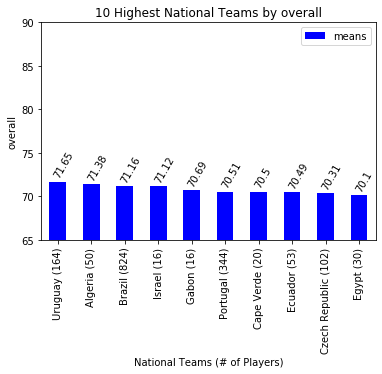

<Figure size 360x360 with 0 Axes>

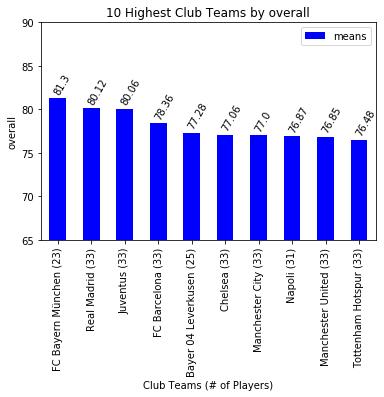

In [0]:
ten_best_of_feature(week4_data, team="National", feature="overall", figname='national_overall')
ten_best_of_feature(week4_data, team="Club", feature="overall", figname='club_overall')

### 10 Highest Value

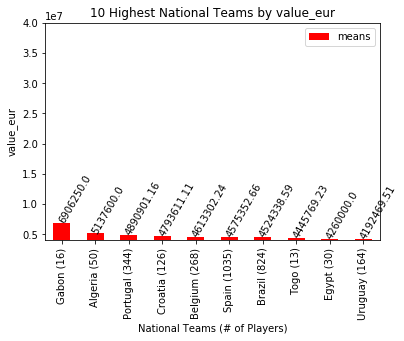

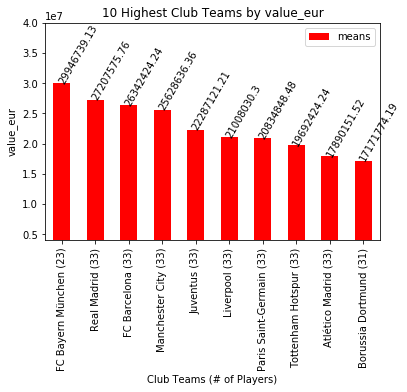

In [0]:
ten_best_of_feature(week4_data, team="National", feature='value_eur', figname='national_val')
ten_best_of_feature(week4_data, team="Club", feature='value_eur', figname='club_val')

### 10 Highest Wage

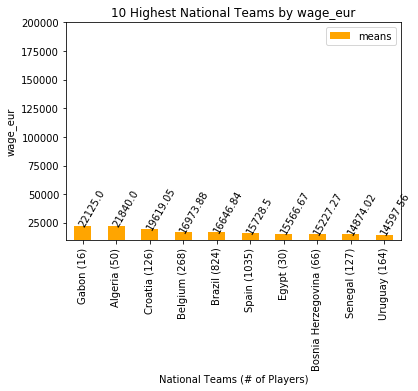

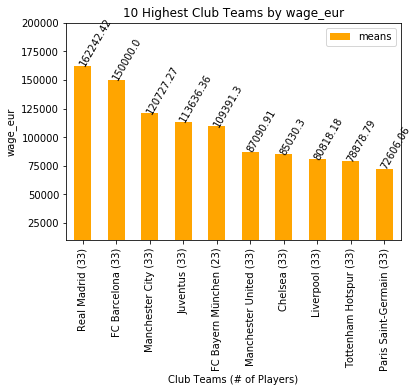

In [0]:
ten_best_of_feature(week4_data, team="National", feature="wage_eur", figname='national_wage')
ten_best_of_feature(week4_data, team="Club", feature='wage_eur', figname='club_wage')

### 10 Highest Age

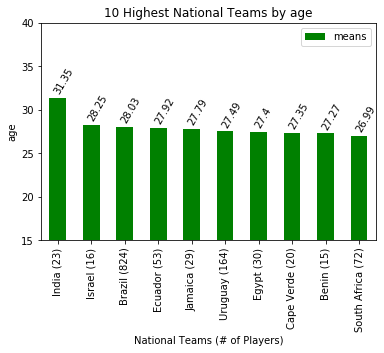

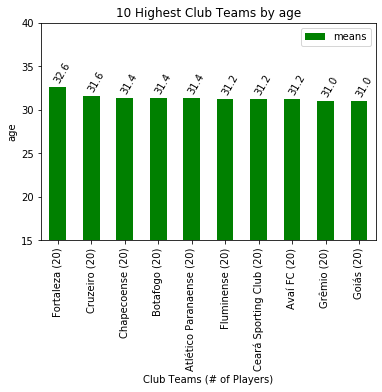

In [0]:
ten_best_of_feature(week4_data, team="National", feature="age", figname='national_age')
ten_best_of_feature(week4_data, team="Club", feature='age', figname='club_age')

### 10 Lowest Age

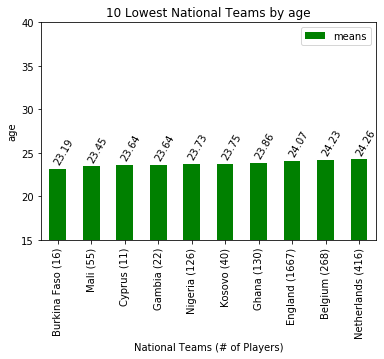

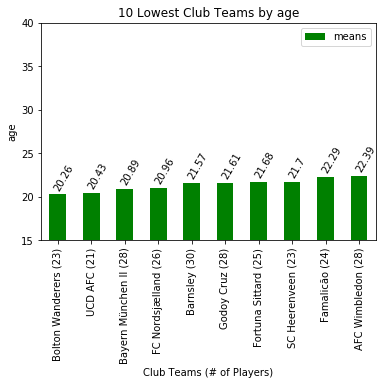

In [0]:
ten_best_of_feature(week4_data, team="National", feature="age", reverse=False, figname='national_age_lowest')
ten_best_of_feature(week4_data, team="Club", feature='age', reverse=False, figname='club_age_lowest')

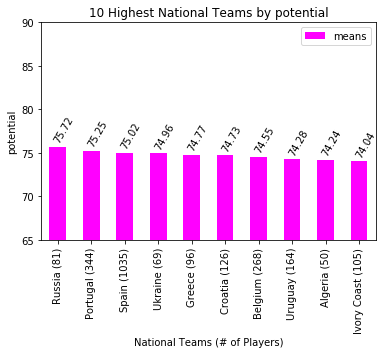

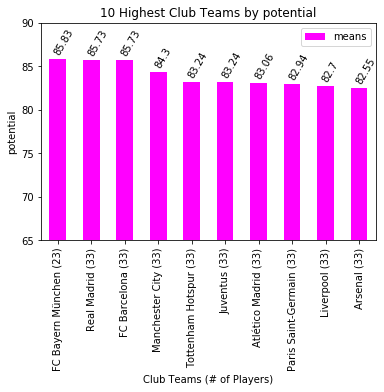

In [0]:
ten_best_of_feature(week4_data, team="National", feature="potential", figname='national_potential')
ten_best_of_feature(week4_data, team="Club", feature='potential', figname='club_potential')

## Plotting Numerical Fields

### Player Age Densities

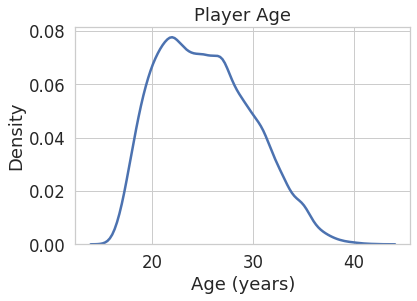

In [0]:
import seaborn as sns 
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

ages = week4_data.age
sns.distplot(ages, hist=False, kde=True, kde_kws = {'linewidth': 2.5})
plt.title('Player Age')
plt.xlabel('Age (years)')
plt.ylabel('Density')

### Player Overall Rating Densities

Text(0, 0.5, 'Density')

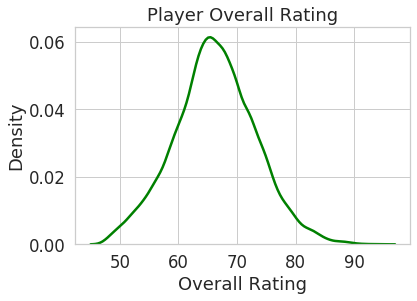

In [0]:
ratings = week4_data.overall
sns.distplot(ratings, hist=False, kde=True, color = 'green', kde_kws = {'linewidth': 2.5})
plt.title('Player Overall Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Density')

### Player Weight Densities

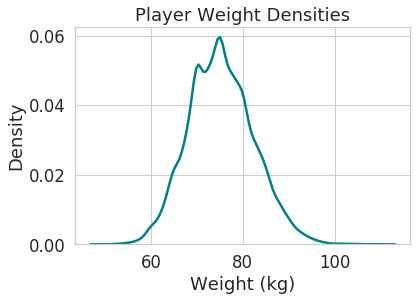

In [0]:
weights = week4_data.weight_kg
sns.distplot(weights, hist=False, kde=True, color = 'teal', kde_kws = {'linewidth': 2.5})
plt.title('Player Weight Densities')
plt.xlabel('Weight (kg)')
plt.ylabel('Density')
plt.savefig('/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 4/Densities/weight_densities.png',format='png', dpi=400, bbox_inches='tight')

###Player Height Densities

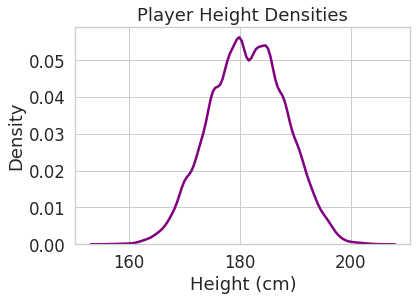

In [0]:
heights = week4_data.height_cm
sns.distplot(heights, hist=False, kde=True, color = 'purple', kde_kws = {'linewidth': 2.5})
plt.title('Player Height Densities')
plt.xlabel('Height (cm)')
plt.ylabel('Density')

### Player Wages Analysis

Text(0, 0.5, 'Density')

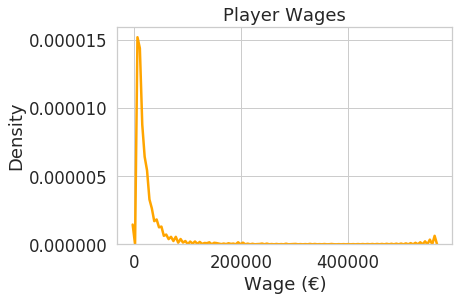

In [0]:
wages = week4_data.wage_eur
sns.distplot(values, hist=False, kde=True, color = 'orange', kde_kws = {'linewidth': 2.5})
plt.title('Player Wages')
plt.xlabel('Wage (€)')
plt.ylabel('Density')

In [0]:
galacticos = wages.nlargest(10)
galacticos.head(10)

0     565000
4     470000
1     405000
5     370000
22    370000
19    355000
8     340000
36    330000
17    300000
18    300000
Name: wage_eur, dtype: int64

In [0]:
sns.distplot(galacticos, hist=False, kde=True, color = 'red', kde_kws = {'linewidth': 2.5})
plt.title('Wages for the Top 10 Players (\'Galacticos\')')
plt.xlabel('Wage (€)')
plt.ylabel('Density')

NameError: ignored

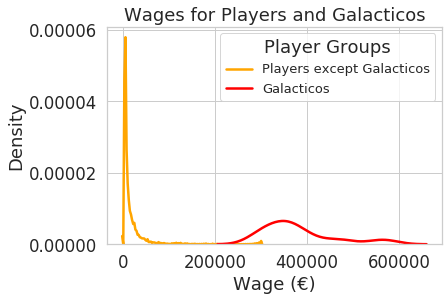

In [0]:
sns.distplot(wages.nsmallest(18268), hist=False, kde=True, color = 'orange', kde_kws = {'linewidth': 2.5}, label='Players except Galacticos')
sns.distplot(galacticos, hist=False, kde=True, color = 'red', kde_kws = {'linewidth': 2.5}, label='Galacticos')
plt.title('Wages for Players and Galacticos')
plt.legend(prop={'size': 13}, title = 'Player Groups')
plt.xlabel('Wage (€)')
plt.ylabel('Density')
plt.savefig('/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 4/Densities/wage_split_densities.png',format='png', dpi=400, bbox_inches='tight')

In [0]:
print(wages.quantile(0.99))
wages.mean()

95229.99999999956


9456.942772732247

In [0]:
wages.rank(pct=True).head(20)

0     1.000000
1     0.999891
2     0.999398
3     0.993407
4     0.999945
5     0.999809
6     0.999070
7     0.997730
8     0.999672
9     0.998796
10    0.995897
11    0.995459
12    0.998441
13    0.995897
14    0.997976
15    0.998632
16    0.998331
17    0.999508
18    0.999508
19    0.999726
Name: wage_eur, dtype: float64

# Week 5

## Spectral Clustering

In [0]:
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 

In [0]:
number_types = ['int64','float64']
non_gk_players.select_dtypes(include=number_types).head()

sofifa_id  age  height_cm  weight_kg  ...  cb  rcb  rb  pos_offset
0     158023   32        170         72  ...  52   52  63           2
1      20801   34        187         83  ...  53   53  61           3
2     190871   27        175         68  ...  46   46  61           3
3     183277   28        175         74  ...  49   49  61           3
4     192985   28        181         70  ...  66   66  73           3

[5 rows x 89 columns]

In [0]:
filters = ['pace', 'shooting', 'passing', 'dribbling', 'defending','physic']
filtered = non_gk_players.filter(items=filters)
filtered.head()

pace  shooting  passing  dribbling  defending  physic
0  87.0      92.0     92.0       96.0       39.0    66.0
1  90.0      93.0     82.0       89.0       35.0    78.0
2  91.0      85.0     87.0       95.0       32.0    58.0
3  91.0      83.0     86.0       94.0       35.0    66.0
4  76.0      86.0     92.0       86.0       61.0    78.0

In [0]:
def preprocess(data):
  # https://www.geeksforgeeks.org/ml-spectral-clustering/
  # Preprocessing the data to make it visualizable 
    
  # Scaling the Data 
  scaler = StandardScaler() 
  X_scaled = scaler.fit_transform(data) 
    
  # Normalizing the Data 
  X_normalized = normalize(X_scaled) 
    
  # Converting the numpy array into a pandas DataFrame 
  X_normalized = pd.DataFrame(X_normalized) 
    
  # Reducing the dimensions of the data 
  pca = PCA(n_components = 2) 
  X_principal = pca.fit_transform(X_normalized) 
  X_principal = pd.DataFrame(X_principal) 
  X_principal.columns = ['P1', 'P2'] 
    
  print(X_principal.head())
  return X_principal

In [0]:
def spectral(data, n_clusters = 2, affinity='nearest_neighbors'):
  # Building the clustering model 
  spectral_model = SpectralClustering(n_clusters=n_clusters, affinity=affinity) 

  # Training the model and Storing the predicted cluster labels 
  labels = spectral_model.fit_predict(data) 
  return labels

In [0]:
def visualize(labels):
  # Building the label to colour mapping 
  colours = {} 
  colours[0] = 'b'
  colours[1] = 'y'

  # Building the colour vector for each data point 
  cvec = [colours[label] for label in labels] 

  # Plotting the clustered scatter plot 

  b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b')
  y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y')

  plt.figure(figsize =(9, 9)) 
  plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
  plt.legend((b, y), ('Label 0', 'Label 1')) 
  plt.show() 

In [0]:
X_principal = preprocess(filtered)

         P1        P2
0 -0.897812 -0.328696
1 -0.861810 -0.362148
2 -0.935918 -0.155893
3 -0.910825 -0.264234
4 -0.686688 -0.651398


In [0]:
labels = spectral(filtered)

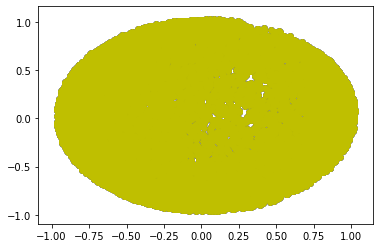

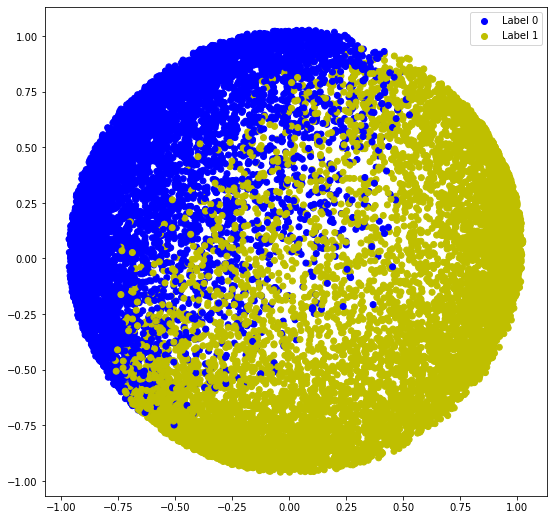

In [0]:
visualize(labels)

##Player Stats Visualization via Radar Plots

Analying player stats for top players and based on position via radar (spider) plots

Adding code for function which creates radar plots

In [0]:
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

non_gk_labels=np.array(['overall', 'potential', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'])
gk_labels=np.array(['overall', 'potential', 'gk_diving','gk_handling','gk_kicking','gk_reflexes','gk_speed','gk_positioning'])

def radar_plot(player_df, labels, count, title):
  idx=count
  stats=[]
  player_df = player_df.reset_index(drop=True)
  for i in range(idx):
    stats.append(player_df.loc[i,labels].values)
    stats[i]=np.concatenate((stats[i],[stats[i][0]]))

  angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
  angles=np.concatenate((angles,[angles[0]]))

  fig=plt.figure(figsize=(7, 7))
  ax = fig.add_subplot(111,polar=True)
  for i in range(count):
    ax.plot(angles, stats[i], "o-", linewidth=2.5, label=player_df.loc[i,"short_name"])
  ax.set_thetagrids(angles * 180/np.pi, labels=labels)
  ax.grid(True)
  ax.set_title(title,fontweight="bold", y=1.08)
  ax.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

### Plot the best overall players

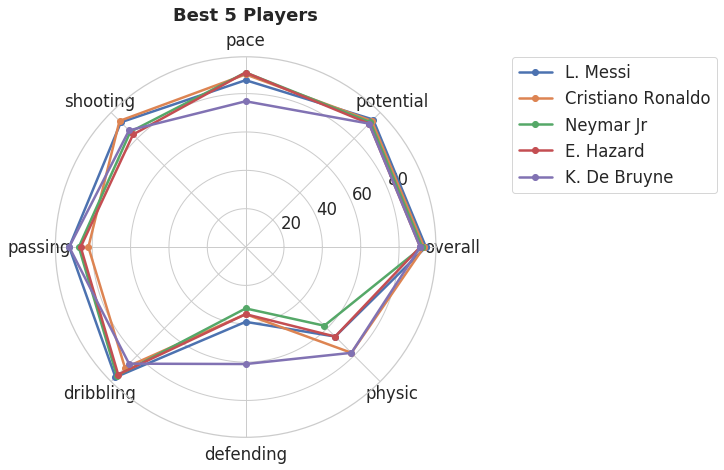

In [0]:
#Plot the best overall players
radar_plot(non_gk_players, non_gk_labels, 5, "Best 5 Players")

### Plot the best goalkeepers

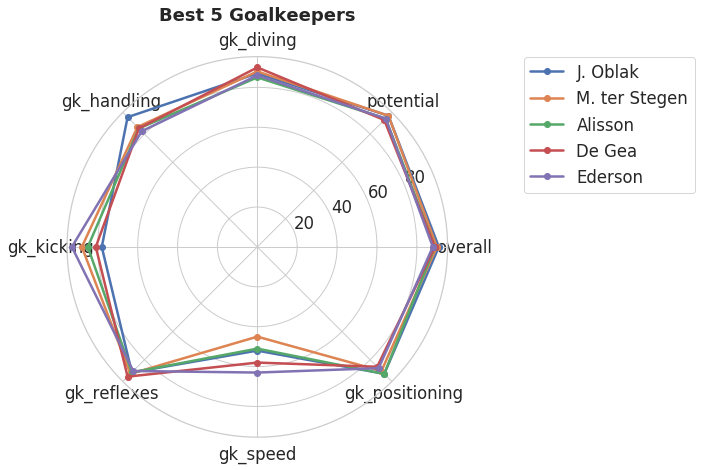

In [0]:
#Plot best goalkeepers
radar_plot(gk_players, gk_labels, 5, "Best 5 Goalkeepers")

### Plot players with highest and lowest overall rating

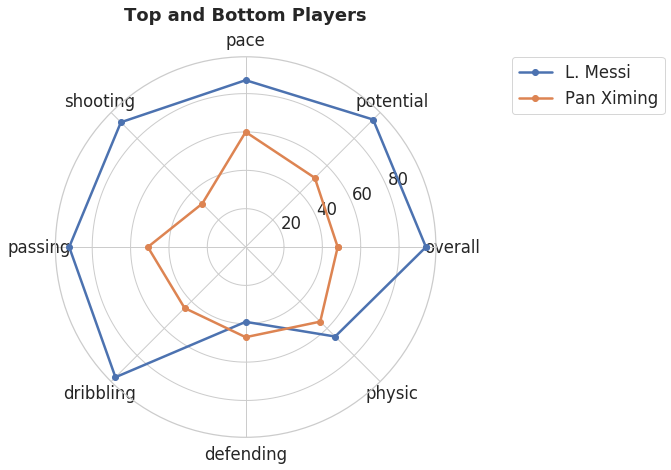

In [0]:
#Plot players with highest and lowest overall rating
first_last_non_gk  = non_gk_players.iloc[[0, -1]]

radar_plot(first_last_non_gk, non_gk_labels, 2,"Top and Bottom Players")

###Plot goalkeepers with highest and lowest overall rating

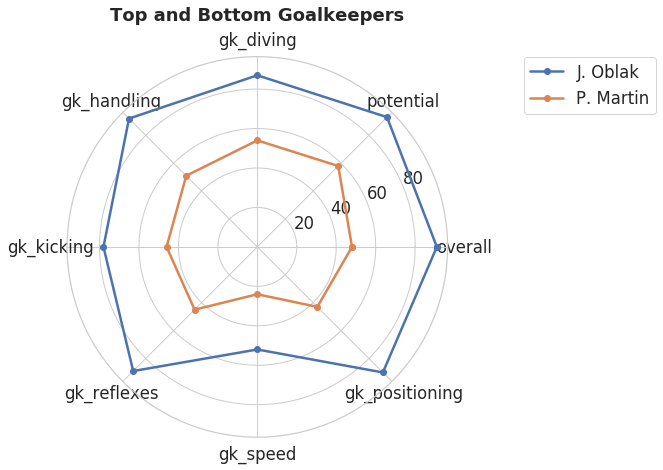

In [0]:
#Plot goalkeepers with highest and lowest overall rating
first_last_gk  = gk_players.iloc[[0, -1]]

radar_plot(first_last_gk, gk_labels, 2,"Top and Bottom Goalkeepers")

### Plot the best overall Forward, Midfielder and Defender

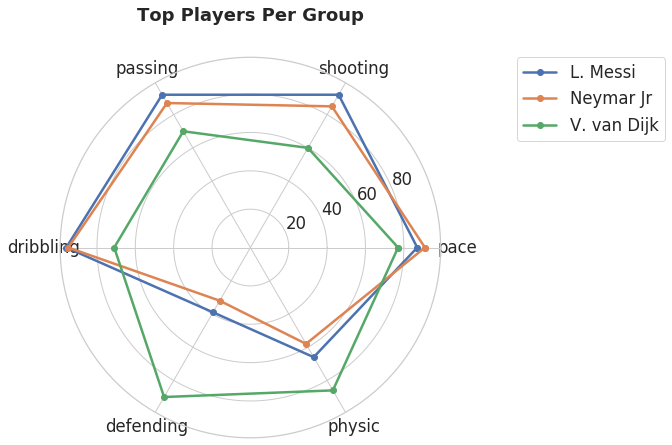

In [0]:
best_players = pd.concat([forwards.iloc[[0]], midfielders.iloc[[0]], defenders.iloc[[0]]], ignore_index=True, sort =False)
radar_plot(best_players, non_gk_labels[2:], 3, "Top Players Per Group")

### Plot the best overall Forward, Midfielder and Defender (Adjusted)

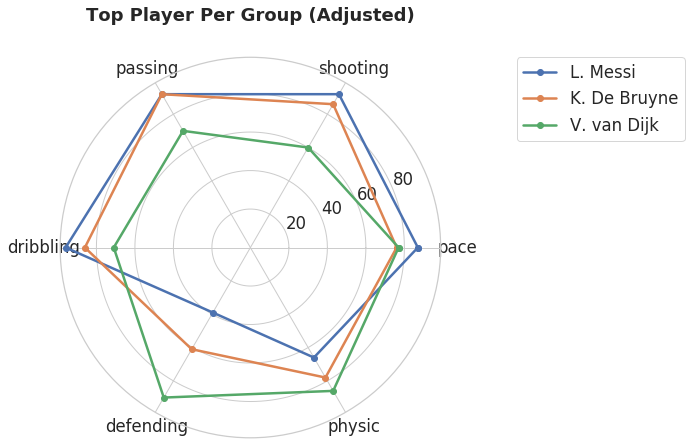

In [0]:
best_players2 = pd.concat([forwards.iloc[[0]], midfielders.iloc[[1]], defenders.iloc[[0]]], ignore_index=True, sort =False)
radar_plot(best_players2, non_gk_labels[2:], 3, "Top Player Per Group (Adjusted)")

### Plot the average stats across each player group

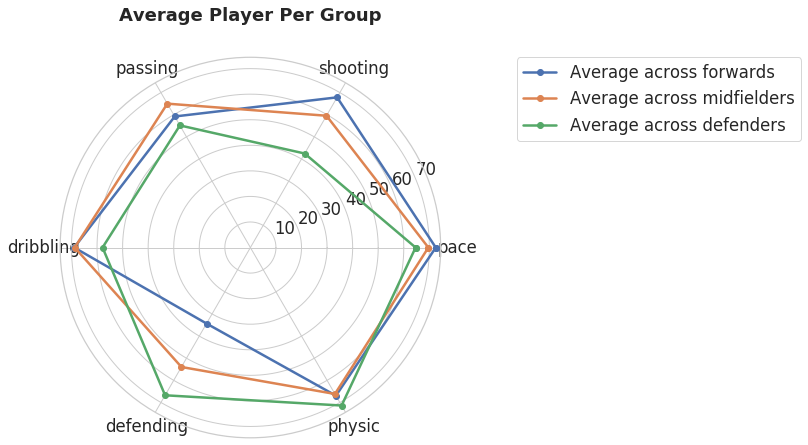

In [0]:
fw_avg=forwards.mean().to_frame().T
fw_avg['short_name']="Average across forwards"
mf_avg=midfielders.mean().to_frame().T
mf_avg['short_name']="Average across midfielders"
df_avg=defenders.mean().to_frame().T
df_avg['short_name']="Average across defenders"

position_avg = pd.concat([fw_avg,mf_avg,df_avg], ignore_index=True, sort =False)
position_avg.head()

radar_plot(position_avg, non_gk_labels[2:], 3, "Average Player Per Group")

### Plot the 2019 Ballon d'Or Nominees

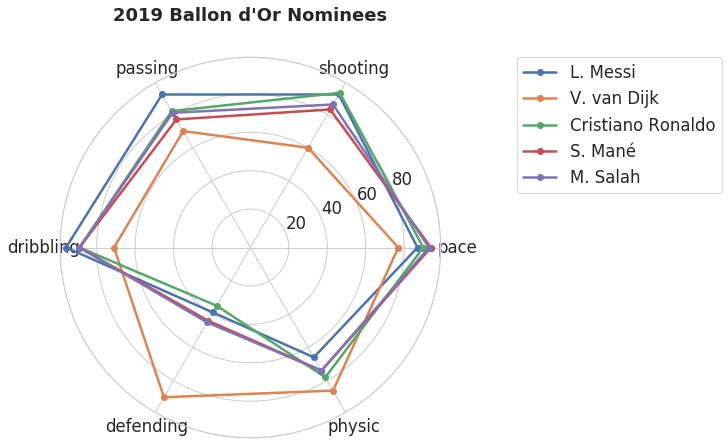

In [0]:
ballon_dor = pd.concat([players.iloc[[0]],players.iloc[[7]],players.iloc[[1]],players.iloc[[39]],players.iloc[[9]]], ignore_index=True, sort =False)
radar_plot(ballon_dor, non_gk_labels[2:], 5, "2019 Ballon d'Or Nominees")

## Spectral Feature Selection

In [0]:
import numpy.matlib
import numpy as np
from scipy.sparse import *
from sklearn.metrics.pairwise import rbf_kernel
from numpy import linalg as LA


def spec(X, **kwargs):
    """
    This function implements the SPEC feature selection
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    kwargs: {dictionary}
        style: {int}
            style == -1, the first feature ranking function, use all eigenvalues
            style == 0, the second feature ranking function, use all except the 1st eigenvalue
            style >= 2, the third feature ranking function, use the first k except 1st eigenvalue
        W: {sparse matrix}, shape (n_samples, n_samples}
            input affinity matrix
    Output
    ------
    w_fea: {numpy array}, shape (n_features,)
        SPEC feature score for each feature
    Reference
    ---------
    Zhao, Zheng and Liu, Huan. "Spectral Feature Selection for Supervised and Unsupervised Learning." ICML 2007.
    """

    if 'style' not in kwargs:
        kwargs['style'] = 0
    if 'W' not in kwargs:
        kwargs['W'] = rbf_kernel(X, gamma=1)

    style = kwargs['style']
    W = kwargs['W']
    if type(W) is numpy.ndarray:
        W = csc_matrix(W)

    n_samples, n_features = X.shape

    # build the degree matrix
    X_sum = np.array(W.sum(axis=1))
    D = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        D[i, i] = X_sum[i]

    print('Degree matrix built')

    # build the laplacian matrix
    L = D - W
    d1 = np.power(np.array(W.sum(axis=1)), -0.5)
    d1[np.isinf(d1)] = 0
    d2 = np.power(np.array(W.sum(axis=1)), 0.5)
    v = np.dot(np.diag(d2[:, 0]), np.ones(n_samples))
    v = v/LA.norm(v)

    print('Laplacian matrix built')

    # build the normalized laplacian matrix
    L_hat = (np.matlib.repmat(d1, 1, n_samples)) * np.array(L) * np.matlib.repmat(np.transpose(d1), n_samples, 1)

    # calculate and construct spectral information
    s, U = np.linalg.eigh(L_hat)
    s = np.flipud(s)
    U = np.fliplr(U)

    print('Spectral split done')

    # begin to select features
    w_fea = np.ones(n_features)*1000

    for i in range(n_features):
        
        f = X[:, i]
        
        F_hat = np.dot(np.diag(d2[:, 0]), f)
        
        l = LA.norm(F_hat)
        
        if l < 100*np.spacing(1):
            w_fea[i] = 1000
            continue
        else:
            F_hat = F_hat/l
    
        a = np.array(np.dot(np.transpose(F_hat), U))
        a = np.multiply(a, a)
        a = np.transpose(a)

        # use f'Lf formulation
        if style == -1:
            w_fea[i] = np.sum(a * s)
        # using all eigenvalues except the 1st
        elif style == 0:
            a1 = a[0:n_samples-1]
            w_fea[i] = np.sum(a1 * s[0:n_samples-1])/(1-np.power(np.dot(np.transpose(F_hat), v), 2))
        # use first k except the 1st
        else:
            a1 = a[n_samples-style:n_samples-1]
            w_fea[i] = np.sum(a1 * (2-s[n_samples-style: n_samples-1]))

    if style != -1 and style != 0:
        w_fea[w_fea == 1000] = -1000

    return w_fea


def feature_ranking(score, **kwargs):
    if 'style' not in kwargs:
        kwargs['style'] = 0
    style = kwargs['style']

    # if style = -1 or 0, ranking features in descending order, the higher the score, the more important the feature is
    if style == -1 or style == 0:
        idx = np.argsort(score, 0)
        return idx[::-1]
    # if style != -1 and 0, ranking features in ascending order, the lower the score, the more important the feature is
    elif style != -1 and style != 0:
        idx = np.argsort(score, 0)
        return idx


## Clustering 

###KMeans clustering on whole dataset

We look at playing statistics that are present for all the Players(Both GK and Non-GK)

In [0]:
data = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_new.csv")

In [0]:
from sklearn.cluster import KMeans
keep=['skill_moves','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
clus_data=data[keep]

print(clus_data.head())

kmeans = KMeans(n_clusters=2).fit(clus_data)
labels = kmeans.labels_

data['clusters']=labels

NameError: ignored

In [0]:
data['target']=~(data.player_positions_enc==str(0))

In [0]:
data['correct']=(data.target==data.clusters)

In [0]:
data.correct.value_counts()

True    18278
Name: correct, dtype: int64

Each and every player is correctly classified as Goal Keeper or not, when we use all the columns : 

['skill_moves','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

### Dimensionality reduction using PCA (Non-GK)

In [0]:
from sklearn.decomposition import PCA 
non_gk_players = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_NonGK.csv")
number_types = ['int64','float64']
non_gk_players=non_gk_players.select_dtypes(include=number_types).drop('sofifa_id',axis=1)
non_gk_players



age  height_cm  weight_kg  nationality_enc  ...  cb  rcb  rb  pos_offset
0       32        170         72                5  ...  52   52  63           2
1       34        187         83              121  ...  53   53  61           3
2       27        175         68               18  ...  46   46  61           3
3       28        175         74               12  ...  49   49  61           3
4       28        181         70               12  ...  66   66  73           3
...    ...        ...        ...              ...  ...  ..  ...  ..         ...
16237   22        186         79               28  ...  46   46  45           2
16238   22        177         66               28  ...  47   47  46           2
16239   19        186         75               28  ...  49   49  47           2
16240   18        185         74               28  ...  49   49  48           2
16241   26        182         78               28  ...  50   50  48           2

[16242 rows x 88 columns]

There are 88 Numerical columns. But some of these have NaN. We will drop those for now

In [0]:
data=non_gk_players.dropna(axis=1)
data

age  height_cm  weight_kg  nationality_enc  ...  cb  rcb  rb  pos_offset
0       32        170         72                5  ...  52   52  63           2
1       34        187         83              121  ...  53   53  61           3
2       27        175         68               18  ...  46   46  61           3
3       28        175         74               12  ...  49   49  61           3
4       28        181         70               12  ...  66   66  73           3
...    ...        ...        ...              ...  ...  ..  ...  ..         ...
16237   22        186         79               28  ...  46   46  45           2
16238   22        177         66               28  ...  47   47  46           2
16239   19        186         75               28  ...  49   49  47           2
16240   18        185         74               28  ...  49   49  48           2
16241   26        182         78               28  ...  50   50  48           2

[16242 rows x 81 columns]

7 columns were dropped and now we have 81 columns

In [0]:
from sklearn.preprocessing import StandardScaler, normalize 

# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

NameError: ignored

Reducing dimensions to preserve at least % of the variance in the data

In [0]:
for i in [0.99,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
  pca = PCA(n_components=i) 
  X_principal = pca.fit_transform(X_normalized) 
  X_principal = pd.DataFrame(X_principal) 
  print(i*100,'%,',X_principal.shape[1])

99.0 %, 42
90.0 %, 20
80.0 %, 12
70.0 %, 6
60.0 %, 3
50.0 %, 2
40.0 %, 2
30.0 %, 1
20.0 %, 1
10.0 %, 1


### KMeans on Whole Dataset after PCA

In [0]:
players = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_new.csv")

In [0]:
def pca_and_cluster_Kmeans(keep_variance,data):
  
  #print(data)
  #46 columns are dropped for containing nan
  #Only 48 columns in data
  # Scaling the Data 
  scaler = StandardScaler() 
  X_scaled = scaler.fit_transform(data) 
    
  # Normalizing the Data 
  X_normalized = normalize(X_scaled) 
    
  # Converting the numpy array into a pandas DataFrame 
  X_normalized = pd.DataFrame(X_normalized) 
    
  # Reducing the dimensions of the data 
  pca = PCA(n_components=keep_variance) 
  X_principal = pca.fit_transform(X_normalized) 
  X_principal = pd.DataFrame(X_principal) 

  #print('Columns after PCA:',X_principal.shape[1])

  kmeans = KMeans(n_clusters=2).fit(X_principal)

  # Training the model and Storing the predicted cluster labels 
  labels = kmeans.labels_
  #return labels and number of columns after PCA
  return labels,X_principal.shape[1]


def evaluate(eval_data,labels):
  
  eval_temp=eval_data
  eval_temp['Labels']=labels

  if eval_temp.Labels.value_counts().loc[0]>eval_temp.Labels.value_counts().loc[1]:
    #print('Cluster 1 is GK')
    eval_temp['correct']=(eval_temp.GK==eval_temp.Labels)
    
    correct_count=eval_temp.correct.value_counts().loc[True]
    #print('Percentage of correctly clustered data= ',correct_count/18278*100.0,'%')
  else:
    #print('Cluster 0 is GK')
    
    #print(eval_temp.GK[3])
    eval_temp['correct']=(eval_temp.GK!=eval_temp.Labels)
    correct_count=eval_temp.correct.value_counts().loc[True]
    #print('Percentage of correctly clustered data= ',correct_count/18278*100.0,'%')
  #Return the % of correctly classified players
  return correct_count/18278*100.0

In [0]:
keep=['skill_moves','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
data=players[keep]
gk_bool=(players.player_positions_enc==str(0))
eval_data=pd.DataFrame()
eval_data['GK']=gk_bool
eval_data

GK
0      False
1      False
2      False
3       True
4      False
...      ...
18273  False
18274  False
18275  False
18276  False
18277  False

[18278 rows x 1 columns]

The next code prints % of variance used for PCA, # of columns preserved after PCA, % of correctly clustered players

In [0]:
for i in [0.99,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
  var_pres=i
  #print('Variance preserved=',var_pres)
  labels,cols = pca_and_cluster_Kmeans(var_pres,data)
  perc=evaluate(eval_data,labels)
  print(i*100,'%,',cols,',',perc)

99.0 %, 29 , 69.13229018492176
90.0 %, 14 , 69.12134806871649
80.0 %, 7 , 69.12134806871649
70.0 %, 4 , 69.18700076594814
60.0 %, 3 , 69.21435605646133
50.0 %, 2 , 69.48243790349053
40.0 %, 2 , 69.44414049677208
30.0 %, 1 , 69.09946383630594
20.0 %, 1 , 69.09946383630594
10.0 %, 1 , 69.0939927782033


#### Visualize the clustering obtained when using only 2 Principal components for Kmeans


In [0]:
from sklearn.preprocessing import StandardScaler, normalize 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
print(X_principal.head())

kmeans = KMeans(n_clusters=2).fit(X_principal)

# Training the model and Storing the predicted cluster labels 
labels = kmeans.labels_
centers = kmeans.cluster_centers_

         P1        P2
0 -0.820318  0.200309
1 -0.769554  0.162318
2 -0.800536  0.288993
3  0.686363  0.230875
4 -0.816863  0.253534


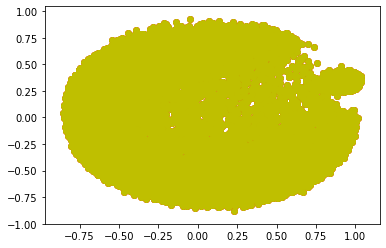

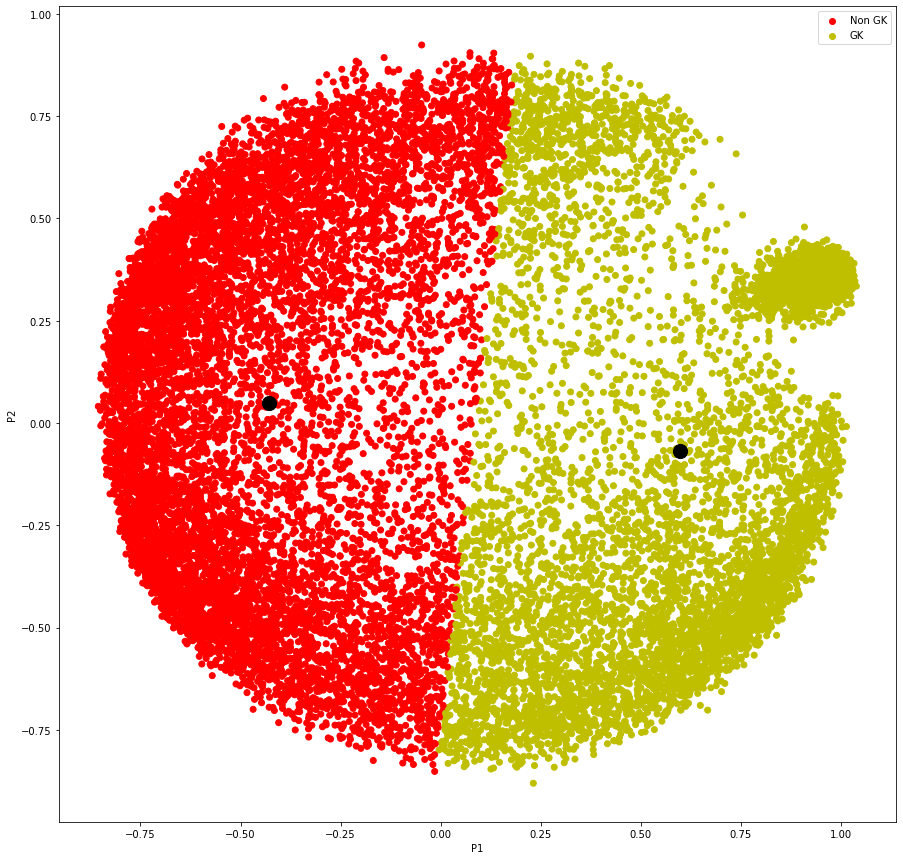

In [0]:
colours = {} 
colours[1] = 'r'
colours[0] = 'y'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# Plotting the clustered scatter plot 

r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r')
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y')

plt.figure(figsize =(15, 15)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);
plt.legend((r, y), ( 'Non GK','GK')) 
plt.xlabel('P1')
plt.ylabel('P2')
plt.savefig('/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 5/2DKmeans.png',format='png',dpi=250, bbox_inches='tight')
plt.show() 

### Use Spectral Clustering instead of KMeans after PCA

In [0]:
players = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_new.csv")

In [0]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler, normalize   
from sklearn.cluster import SpectralClustering 
keep=['skill_moves','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
data=players[keep]
#print(data)
#46 columns are dropped for containing nan
#Only 48 columns in data
# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components=0.9) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
print(X_principal.head())

          0         1         2         3         4         5         6         7         8         9        10        11        12        13
0 -0.820318  0.200309  0.202108 -0.150884 -0.169899  0.021242 -0.122017 -0.009393 -0.030772  0.041366 -0.075532 -0.079776 -0.008067  0.006073
1 -0.769554  0.162318  0.363375  0.095715 -0.258603  0.011021 -0.140176 -0.076252 -0.045409 -0.039342 -0.014713  0.024109 -0.033020 -0.069766
2 -0.800536  0.288993  0.127447 -0.165417 -0.172001  0.069369 -0.182549 -0.079550  0.007360  0.039429 -0.003262 -0.028658 -0.030330 -0.118995
3  0.686363  0.230875  0.459661 -0.379659 -0.615661  0.082492  0.027935  0.111631 -0.039865 -0.018072 -0.075549 -0.063913  0.020699 -0.016895
4 -0.816863  0.253534  0.126984 -0.127097 -0.150028  0.101511 -0.139795  0.024913  0.032785  0.078337 -0.030306 -0.109841 -0.014972 -0.056590


In [0]:
def pca_and_cluster_spectral(keep_variance,data):
  
  #print(data)
  #46 columns are dropped for containing nan
  #Only 48 columns in data
  # Scaling the Data 
  scaler = StandardScaler() 
  X_scaled = scaler.fit_transform(data) 
    
  # Normalizing the Data 
  X_normalized = normalize(X_scaled) 
    
  # Converting the numpy array into a pandas DataFrame 
  X_normalized = pd.DataFrame(X_normalized) 
    
  # Reducing the dimensions of the data 
  pca = PCA(n_components=keep_variance) 
  X_principal = pca.fit_transform(X_normalized) 
  X_principal = pd.DataFrame(X_principal) 

  #print('Columns after PCA:',X_principal.shape[1])

  spectral_model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors') 

  # Training the model and Storing the predicted cluster labels 
  labels = spectral_model.fit_predict(data)

  return labels,X_principal.shape[1]


def evaluate(eval_data,labels):
  
  eval_temp=eval_data
  eval_temp['Labels']=labels

  if eval_temp.Labels.value_counts().loc[0]>eval_temp.Labels.value_counts().loc[1]:
    #print('Cluster 1 is GK')
    eval_temp['correct']=(eval_temp.GK==eval_temp.Labels)
    
    correct_count=eval_temp.correct.value_counts().loc[True]
   # print('Percentage of correctly clustered data= ',correct_count/18278*100.0,'%')
  else:
    #print('Cluster 0 is GK')
    
    #print(eval_temp.GK[3])
    #eval_temp['correct']=(eval_temp.GK!=eval_temp.Labels)
    correct_count=eval_temp.correct.value_counts().loc[True]
    #print('Percentage of correctly clustered data= ',correct_count/18278*100.0,'%')

  return correct_count

In [0]:
import warnings

with warnings.catch_warnings():
  warnings.filterwarnings("ignore",category=UserWarning)
    
  for i in [0.99,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    var_pres=i
    #print('Variance preserved=',var_pres)
    labels,cols = pca_and_cluster_spectral(var_pres,data)
    perc=evaluate(eval_data,labels)
    print(i*100,'%,',cols,',',perc/182.78)

99.0 %, 29 , 100.0
True
90.0 %, 14 , 100.0
80.0 %, 7 , 100.0
70.0 %, 4 , 100.0
60.0 %, 3 , 100.0
50.0 %, 2 , 100.0
40.0 %, 2 , 100.0
30.0 %, 1 , 100.0
20.0 %, 1 , 100.0
True
10.0 %, 1 , 100.0


In [0]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
print(X_principal.head())

spectral_model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors') 

# Training the model and Storing the predicted cluster labels 
labels = spectral_model.fit_predict(data)


         P1        P2
0 -0.820318  0.200309
1 -0.769554  0.162318
2 -0.800536  0.288993
3  0.686363  0.230875
4 -0.816863  0.253534


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


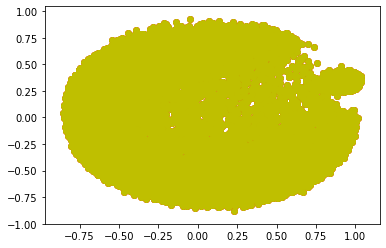

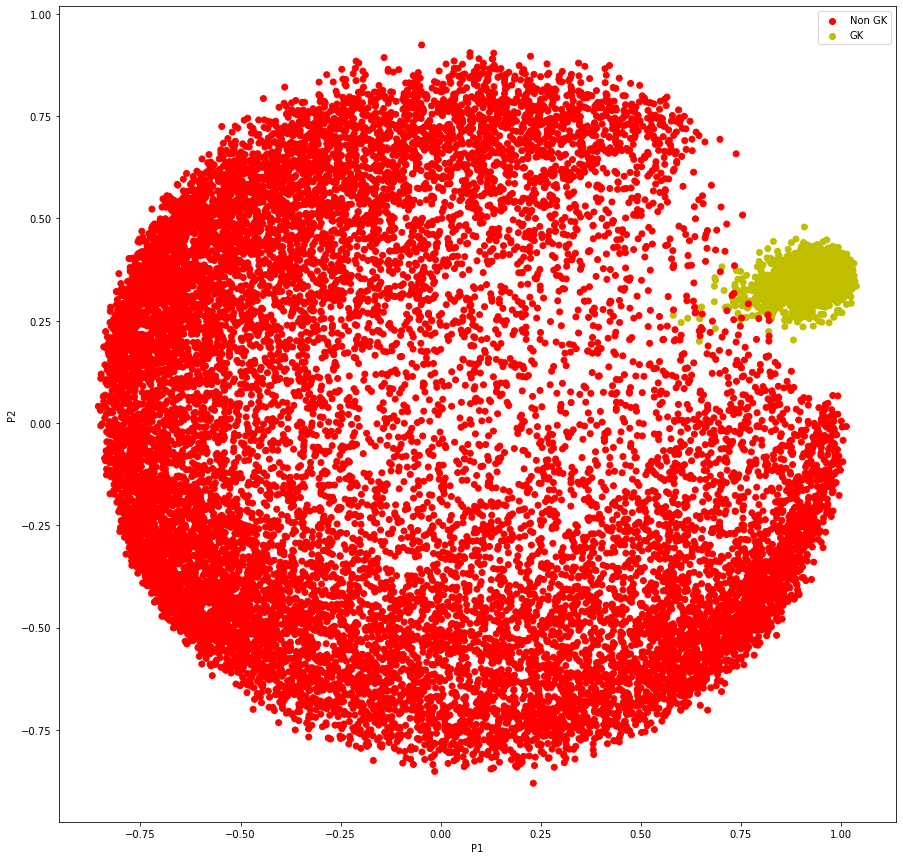

In [0]:
colours = {} 
colours[0] = 'r'
colours[1] = 'y'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# Plotting the clustered scatter plot 

r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r')
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='y')

plt.figure(figsize =(15, 15)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, y), ('Non GK','GK')) 
plt.xlabel('P1')
plt.ylabel('P2')
plt.savefig('/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 5/2DSpectral.png',format='png',dpi=250, bbox_inches='tight')
plt.show() 

In [0]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(data) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3'] 
  
print(X_principal.head())

spectral_model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors') 

# Training the model and Storing the predicted cluster labels 
labels = spectral_model.fit_predict(data)

         P1        P2        P3
0 -0.820318  0.200309  0.202108
1 -0.769554  0.162318  0.363375
2 -0.800536  0.288993  0.127447
3  0.686363  0.230875  0.459661
4 -0.816863  0.253534  0.126984


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


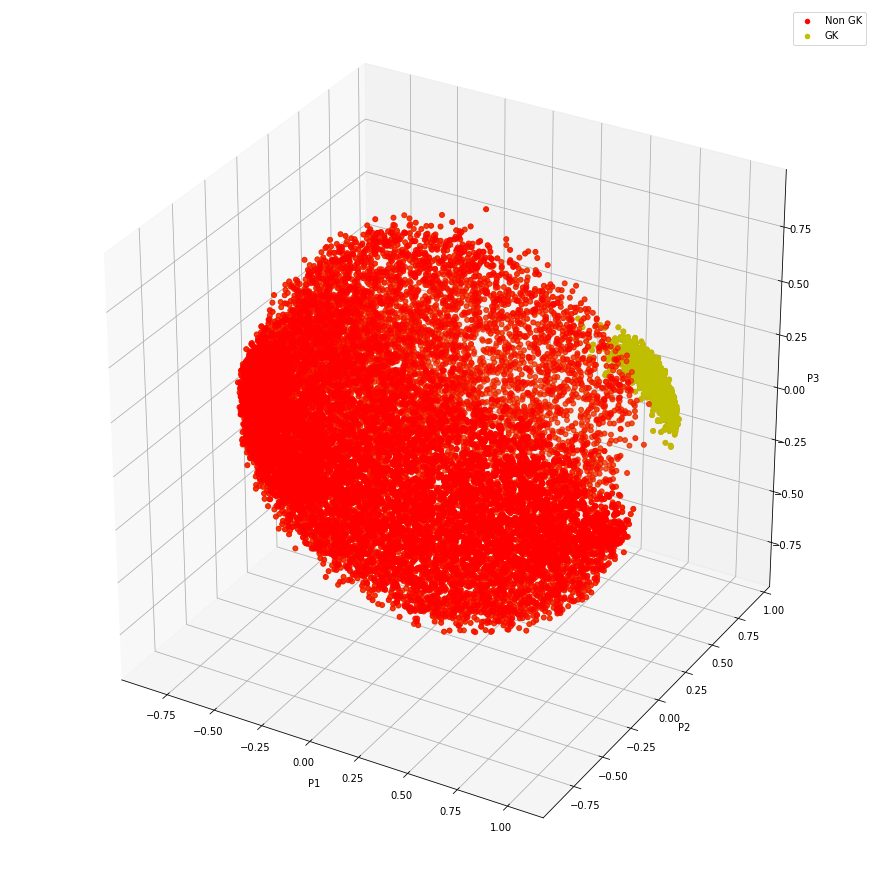

In [0]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
colours = {} 
colours[0] = 'r'
colours[1] = 'y'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# Plotting the clustered scatter plot 
fig=plt.figure(figsize=(12,12)) 
ax = Axes3D(fig)

r = ax.scatter(X_principal['P1'], X_principal['P2'],X_principal['P3'], color ='r')
y = ax.scatter(X_principal['P1'], X_principal['P2'],X_principal['P3'], color ='y')



ax.scatter(X_principal['P1'], X_principal['P2'],X_principal['P3'], c = cvec,marker='.',s=100) 
ax.legend((r, y), ('Non GK', 'GK')) 
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')
plt.savefig('/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 5/3DSpectral.png',format='png',dpi=200, bbox_inches='tight')
plt.show() 

## Best Overall Players for each Position

Print players in wiki table format :)

In [0]:
def print_best(players_list, feature, print_pos=False):
  the_player = players_list.iloc[players_list[feature].idxmax()]
  print('|',the_player.team_position)
  print('|',the_player.short_name)
  print('|',the_player.overall)
  print('|',the_player.club)
  if feature != 'overall':
    print('|',the_player[feature])
  if print_pos:
    print('|',the_player.player_positions)
  print('|-')

In [0]:
for pos in range(1,29):
  player_in_pos=non_gk_players[non_gk_players['team_position_enc'] == pos].reset_index(drop=True)
  print_best(player_in_pos, 'overall', print_pos=True)

| LS
| L. Insigne
| 87
| Napoli
| CF, LW, ST
|-
| ST
| H. Kane
| 89
| Tottenham Hotspur
| ST
|-
| RS
| Iago Aspas
| 85
| RC Celta
| ST, RW
|-
| LW
| Cristiano Ronaldo
| 93
| Juventus
| ST, LW
|-
| LF
| K. Demirbay
| 82
| Bayer 04 Leverkusen
| CM
|-
| CF
| K. Benzema
| 87
| Real Madrid
| CF, ST
|-
| RF
| K. Havertz
| 84
| Bayer 04 Leverkusen
| CAM, RM
|-
| RW
| L. Messi
| 94
| FC Barcelona
| RW, CF, ST
|-
| LB
| Jordi Alba
| 87
| FC Barcelona
| LB
|-
| LCB
| V. van Dijk
| 90
| Liverpool
| CB
|-
| CB
| S. de Vrij
| 84
| Inter
| CB
|-
| RCB
| Piqué
| 88
| FC Barcelona
| CB
|-
| RB
| J. Kimmich
| 86
| FC Bayern München
| RB, CM, CDM
|-
| LAM
| Taison
| 82
| Shakhtar Donetsk
| CAM, LM
|-
| CAM
| Neymar Jr
| 92
| Paris Saint-Germain
| LW, CAM
|-
| RAM
| H. Ziyech
| 85
| Ajax
| CAM, RW
|-
| LM
| P. Aubameyang
| 88
| Arsenal
| ST, LM
|-
| LCM
| David Silva
| 88
| Manchester City
| CAM, CM
|-
| CM
| Luis Alberto
| 84
| Lazio
| CAM, CM, CF
|-
| RCM
| K. De Bruyne
| 91
| Manchester City
| CAM, CM

In [0]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name
goalkeepers = gk_players
players_by_positions = [forwards, midfielders, defenders, goalkeepers]
features = ['overall', 'potential', 'wage_eur', 'value_eur']
for f in features:
  print('{| class="wikitable"\n|+Table 5. Highest players by',f)
  print('! Position Category\n! Position\n! Name\n! overall\n! Club')
  if f != 'overall':
    print('!', f)
  print('|-')
  for players_list in players_by_positions:
    print('|', get_df_name(players_list))
    print_best(players_list, f)
  print('|}')
  print()

{| class="wikitable"
|+Table 5. Highest players by overall
! Position Category
! Position
! Name
! overall
! Club
|-
| forwards
| RW
| L. Messi
| 94
| FC Barcelona
|-
| midfielders
| CAM
| Neymar Jr
| 92
| Paris Saint-Germain
|-
| defenders
| LCB
| V. van Dijk
| 90
| Liverpool
|-
| gk_players
| GK
| J. Oblak
| 91
| Atlético Madrid
|-
|}

{| class="wikitable"
|+Table 5. Highest players by potential
! Position Category
! Position
! Name
! overall
! Club
! potential
|-
| forwards
| RW
| K. Mbappé
| 89
| Paris Saint-Germain
| 95
|-
| midfielders
| CAM
| Neymar Jr
| 92
| Paris Saint-Germain
| 92
|-
| defenders
| LCB
| V. van Dijk
| 90
| Liverpool
| 91
|-
| gk_players
| GK
| J. Oblak
| 91
| Atlético Madrid
| 93
|-
|}

{| class="wikitable"
|+Table 5. Highest players by wage_eur
! Position Category
! Position
! Name
! overall
! Club
! wage_eur
|-
| forwards
| RW
| L. Messi
| 94
| FC Barcelona
| 565000
|-
| midfielders
| RCM
| K. De Bruyne
| 91
| Manchester City
| 370000
|-
| defenders
| LCB
| 

# Week 6


## Non Negative Matrix Factorization - Whole Data


In [0]:
players=data = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_new.csv")

In [0]:
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler, normalize 
keep=['skill_moves','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
data=players[keep]

In [0]:
data = normalize(data) 
data

array([[0.00903967, 0.19887272, 0.21469214, ..., 0.03389876, 0.03163884,
        0.01807934],
       [0.01144407, 0.19226046, 0.21514861, ..., 0.03433222, 0.03204341,
        0.02517696],
       [0.01174042, 0.20428333, 0.20428333, ..., 0.03522126, 0.03522126,
        0.02582893],
       ...,
       [0.00807694, 0.12923097, 0.13326944, ..., 0.04038468, 0.02423081,
        0.05653855],
       [0.0078602 , 0.1532739 , 0.1336234 , ..., 0.0510913 , 0.0510913 ,
        0.0510913 ],
       [0.00776589, 0.17084963, 0.11648839, ..., 0.05436125, 0.03494652,
        0.03882946]])

In [0]:
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(data)
H = model.components_
W = pd.DataFrame(W)
H = pd.DataFrame(H)

In [0]:
H.columns=keep
H

skill_moves  ...  goalkeeping_reflexes
0     0.006162  ...              0.534436
1     0.014663  ...              0.000000

[2 rows x 35 columns]

In [0]:
W.columns=['P1','P2']
W

P1        P2
0      0.031367  0.524023
1      0.049684  0.515020
2      0.031678  0.521534
3      0.565797  0.059758
4      0.030027  0.525992
...         ...       ...
18273  0.106897  0.471532
18274  0.109008  0.472041
18275  0.080547  0.507848
18276  0.104747  0.492369
18277  0.098896  0.493383

[18278 rows x 2 columns]

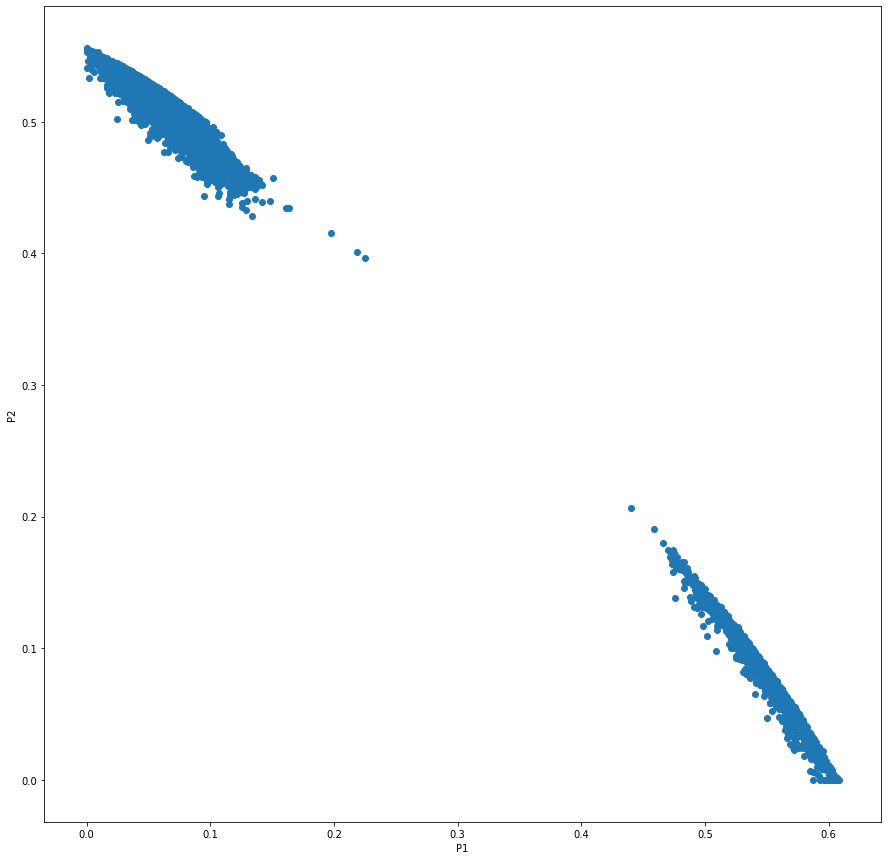

In [0]:
# Lets plot the data to see what it looks like
plt.figure(figsize =(15, 15)) 
plt.scatter(W['P1'], W['P2'])
plt.xlabel('P1')
plt.ylabel('P2') 
plt.savefig('/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 6/NMF_full_players.png',format='png',dpi=250, bbox_inches='tight')

In [0]:
temp =W
gk_bool=(players.player_positions_enc==str(0))
temp['GK']=gk_bool
temp

P1        P2     GK
0      0.031367  0.524023  False
1      0.049684  0.515020  False
2      0.031678  0.521534  False
3      0.565797  0.059758   True
4      0.030027  0.525992  False
...         ...       ...    ...
18273  0.106897  0.471532  False
18274  0.109008  0.472041  False
18275  0.080547  0.507848  False
18276  0.104747  0.492369  False
18277  0.098896  0.493383  False

[18278 rows x 3 columns]

In the figure we can see that the lower cluster has P1 Value >0.3 and P2 value <0.3 Lets filter

In [0]:
temp=temp[temp.P1>0.3]
temp=temp[temp.P2<0.3]
temp

P1        P2    GK
3      0.565797  0.059758  True
6      0.553083  0.069687  True
13     0.558230  0.064804  True
14     0.535625  0.097351  True
25     0.526331  0.106312  True
...         ...       ...   ...
18231  0.569035  0.049692  True
18239  0.574205  0.046984  True
18251  0.513691  0.121538  True
18259  0.579100  0.039635  True
18272  0.558802  0.066779  True

[2036 rows x 3 columns]

In [0]:
temp.GK.value_counts()

True    2036
Name: GK, dtype: int64

In [0]:
W

P1        P2     GK
0      0.031367  0.524023  False
1      0.049684  0.515020  False
2      0.031678  0.521534  False
3      0.565797  0.059758   True
4      0.030027  0.525992  False
...         ...       ...    ...
18273  0.106897  0.471532  False
18274  0.109008  0.472041  False
18275  0.080547  0.507848  False
18276  0.104747  0.492369  False
18277  0.098896  0.493383  False

[18278 rows x 3 columns]

Use KMeans to confirm that the clusters are right

In [0]:
kmeans = KMeans(n_clusters=2).fit(W[['P1','P2']])
labels = kmeans.labels_
centers=kmeans.cluster_centers_

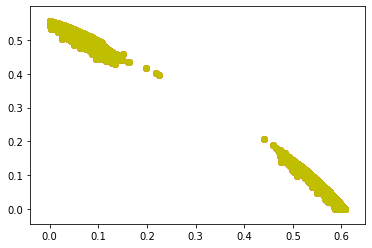

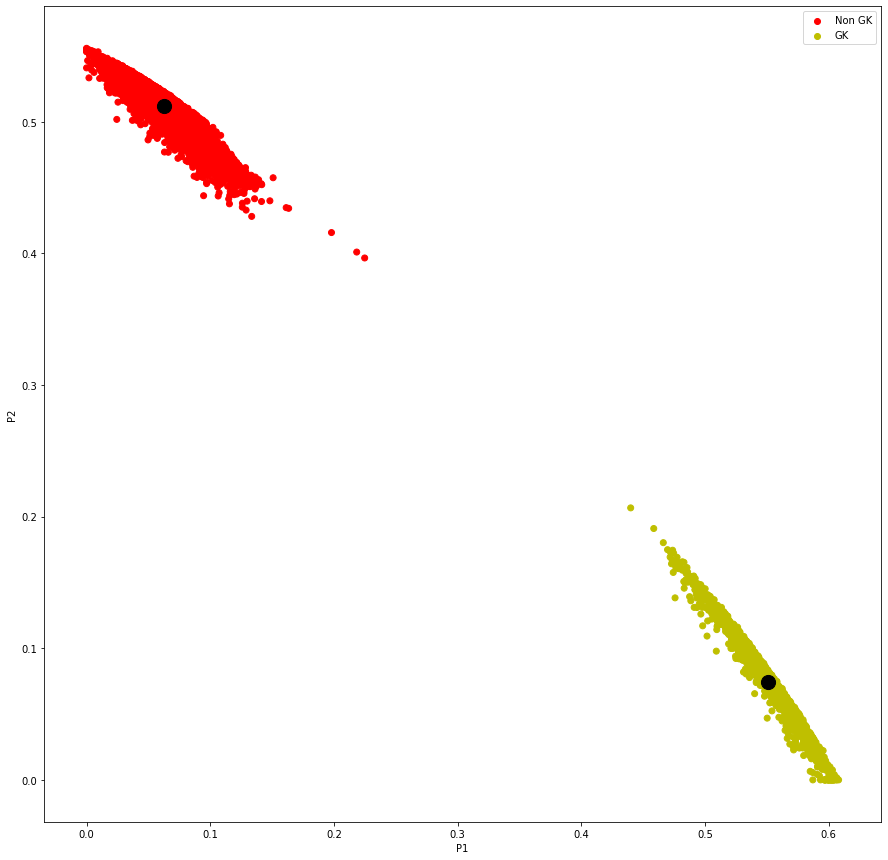

In [0]:
colours = {} 
colours[0] = 'r'
colours[1] = 'y'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# Plotting the clustered scatter plot 

r = plt.scatter(W['P1'], W['P2'], color ='r')
y = plt.scatter(W['P1'], W['P2'], color ='y')

plt.figure(figsize =(15, 15)) 
plt.scatter(W['P1'], W['P2'], c = cvec) 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);
plt.legend((r, y), ( 'Non GK','GK')) 
plt.xlabel('P1')
plt.ylabel('P2')
#plt.savefig('/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 5/2DKmeans.png',format='png',dpi=250, bbox_inches='tight')
plt.savefig('/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 6/NMF_full_players_KMeans.png',format='png',dpi=250, bbox_inches='tight')
plt.show() 

Kmeans can cluster correctly using only 2 components

There are 2036 goal keepers and they are all in this cluster. So we can conclude that P2 is very important for Non Goal Keepers and P1 is very important for Goal Keepers. Now since we also have a matrix with the mapping of P1 and P2 to the features used, We can easily conclude on what features are important for Goal keepers and Non Goal keepers.

In [0]:
H.columns=keep
H.index=['GK','Non-GK']
H

skill_moves  ...  goalkeeping_reflexes
GK         0.006162  ...              0.534436
Non-GK     0.014663  ...              0.000000

[2 rows x 35 columns]

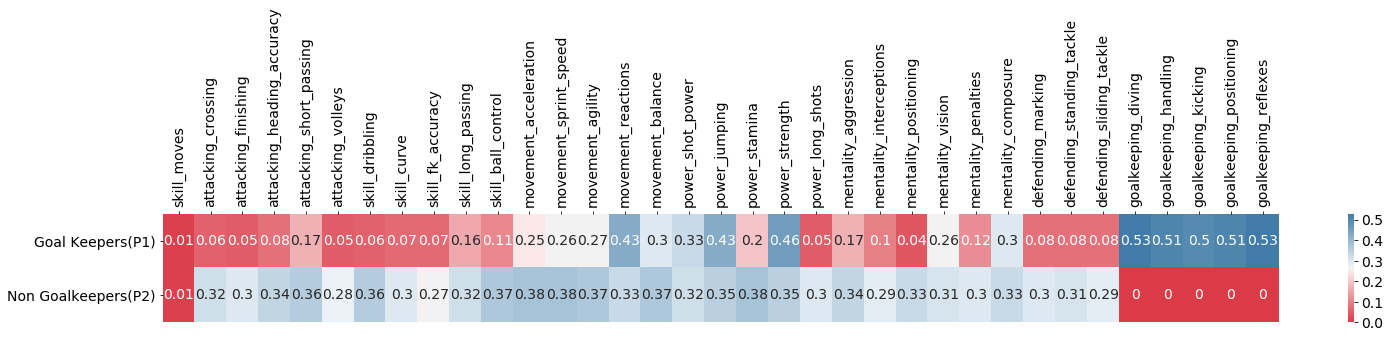

In [0]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,2))
plt.rcParams.update({'font.size': 14})
ax.xaxis.set_ticks_position('top')
sns.heatmap(H.round(2), xticklabels=H.columns, yticklabels=['Goal Keepers(P1)','Non Goalkeepers(P2)'], cmap=sns.diverging_palette(10,240, as_cmap=True), ax=ax,annot=True)
plt.savefig('/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 6/NMF_full_players_feature_hm.png',format='png',dpi=250, bbox_inches='tight')


## Non Negative Matrix Factorization - Non GK

In [0]:
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
from sklearn.preprocessing import StandardScaler, normalize 
players=data = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_NonGK.csv")

In [18]:
print(players.dropna(subset=['team_position']))

       sofifa_id  ... pos_offset
0         158023  ...          2
1          20801  ...          3
2         190871  ...          3
3         183277  ...          3
4         192985  ...          3
...          ...  ...        ...
16237     245006  ...          2
16238     250995  ...          2
16239     252332  ...          2
16240     251110  ...          2
16241     233449  ...          2

[16042 rows x 108 columns]


In [19]:
print(list(players.columns))
fw_list=['ls','st','rs','lw','lf','cf','rf','rw']
mff_list=['lam','cam','ram','lm','lcm','cm','rcm','rm']
mfb_list=['lwb','ldm','cdm','rdm','rwb']
df_list=['lb','lcb','cb','rcb','rb']
players.dropna(subset=['team_position'],inplace=True)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'nationality_enc', 'club', 'club_enc', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'player_positions_enc', 'preferred_foot', 'preferred_foot_enc', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'work_rate_1', 'work_rate_2', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_position_enc', 'team_jersey_number', 'loaned_from', 'loaned_from_enc', 'joined', 'contract_valid_until', 'nation_position', 'nation_position_enc', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movem

In [20]:
players.team_position.value_counts()

SUB    6892
RES    2552
RCB     660
LCB     660
LB      560
RB      560
ST      458
RCM     411
LCM     411
RM      399
LM      398
CAM     311
RDM     244
LDM     242
LS      195
RS      195
CDM     181
LW      162
RW      161
CB      100
CM       76
RWB      58
LWB      58
RAM      23
LAM      23
LF       19
RF       19
CF       14
Name: team_position, dtype: int64

In [0]:

varlist = ('LS','ST','RS','LW','LF','CF','RF','RW',
           'LAM','CAM','RAM','LM','LCM','CM','RCM','RM',
           'LWB','LDM','CDM','RDM','RWB',
           'LB','LCB','CB','RCB','RB')
filllistt = (0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,
             2,2,2,2,2,
             3,3,3,3,3)
replace_map = dict(zip(varlist, filllistt))
players['team_position']=players.team_position.replace(replace_map)

In [0]:
players=players[players.team_position.isin([0,1,2,3])]

In [0]:
keep=['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
      'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
      'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
      'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
      'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
      'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
      'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']

data=players[keep]

In [24]:
data

pace  shooting  ...  defending_standing_tackle  defending_sliding_tackle
0      87.0      92.0  ...                         37                        26
1      90.0      93.0  ...                         32                        24
2      91.0      85.0  ...                         26                        29
3      91.0      83.0  ...                         27                        22
4      76.0      86.0  ...                         58                        51
...     ...       ...  ...                        ...                       ...
16138  63.0      41.0  ...                         41                        41
16142  55.0      25.0  ...                         52                        57
16144  52.0      25.0  ...                         54                        53
16162  66.0      24.0  ...                         50                        55
16200  57.0      52.0  ...                         18                        11

[6598 rows x 35 columns]

In [0]:
data_norm = normalize(data) 
data_norm=pd.DataFrame(data_norm)

In [26]:
data_norm

0         1         2   ...        32        33        34
0     0.179569  0.189889  0.189889  ...  0.068113  0.076369  0.053664
1     0.188132  0.194403  0.171409  ...  0.058530  0.066891  0.050169
2     0.195303  0.182426  0.186718  ...  0.057947  0.055801  0.062239
3     0.196111  0.178870  0.185335  ...  0.073272  0.058187  0.047411
4     0.159418  0.180394  0.192979  ...  0.142637  0.121661  0.106978
...        ...       ...       ...  ...       ...       ...       ...
6593  0.207228  0.134863  0.171045  ...  0.171045  0.134863  0.134863
6594  0.222018  0.100917  0.096881  ...  0.193761  0.209908  0.230091
6595  0.210775  0.101334  0.117548  ...  0.190508  0.218882  0.214829
6596  0.248140  0.090233  0.109031  ...  0.172946  0.187985  0.206783
6597  0.205114  0.187122  0.154735  ...  0.107955  0.064773  0.039583

[6598 rows x 35 columns]

In [0]:
model = NMF(n_components=3, init='random', random_state=0)
W = model.fit_transform(data_norm)
H = model.components_
W = pd.DataFrame(W)
H = pd.DataFrame(H)

In [28]:
H.columns=keep
H

pace  shooting  ...  defending_standing_tackle  defending_sliding_tackle
0  0.576583  0.121302  ...                   0.135462                  0.142011
1  0.012011  0.354685  ...                   0.021395                  0.000000
2  0.038707  0.068017  ...                   0.504564                  0.488548

[3 rows x 35 columns]

In [29]:
W.columns=['P1','P2','P3']
W

P1        P2        P3
0     0.304786  0.455635  0.033938
1     0.306437  0.441724  0.047308
2     0.327695  0.448829  0.009760
3     0.331695  0.431509  0.026126
4     0.255857  0.409144  0.145753
...        ...       ...       ...
6593  0.355012  0.244349  0.177121
6594  0.363636  0.035858  0.324131
6595  0.327839  0.072328  0.338023
6596  0.400675  0.077837  0.256018
6597  0.342691  0.368800  0.065414

[6598 rows x 3 columns]

Text(0.5, 0, 'P3')

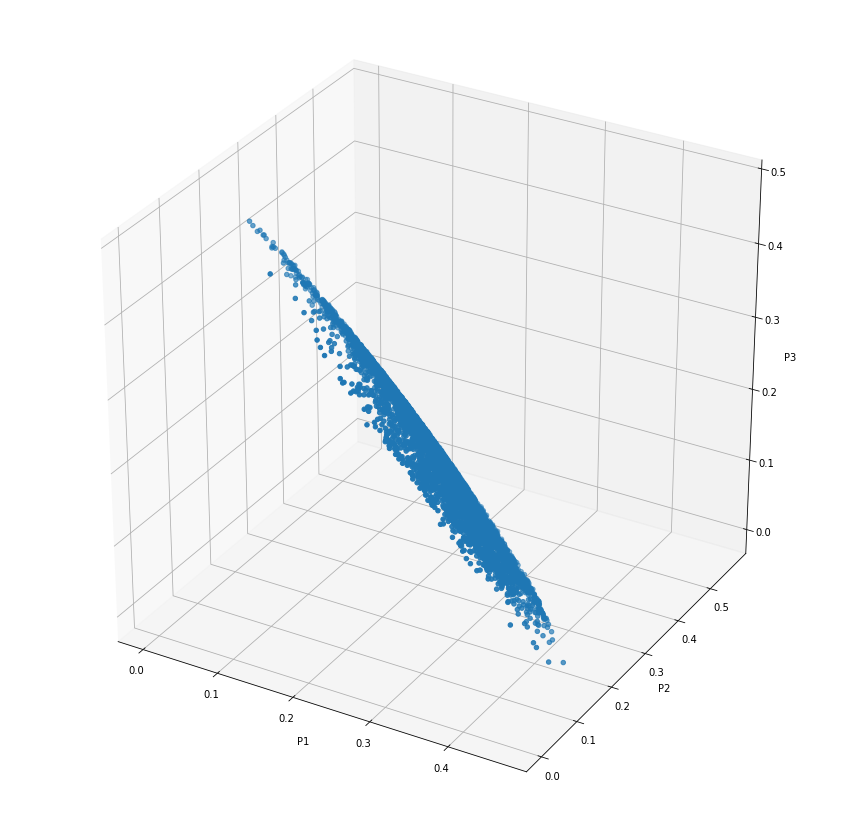

In [0]:
from mpl_toolkits.mplot3d import Axes3D
# Lets plot the data to see what it looks like
fig = plt.figure(figsize =(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(W['P1'], W['P2'],W['P3'])
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3') 


In [0]:
players.team_position.value_counts()

3    2540
1    2052
0    1223
2     783
Name: team_position, dtype: int64

In [0]:
kmeans = KMeans(n_clusters=2).fit(W[['P1','P2','P3']])
labels = kmeans.labels_
centers=kmeans.cluster_centers_

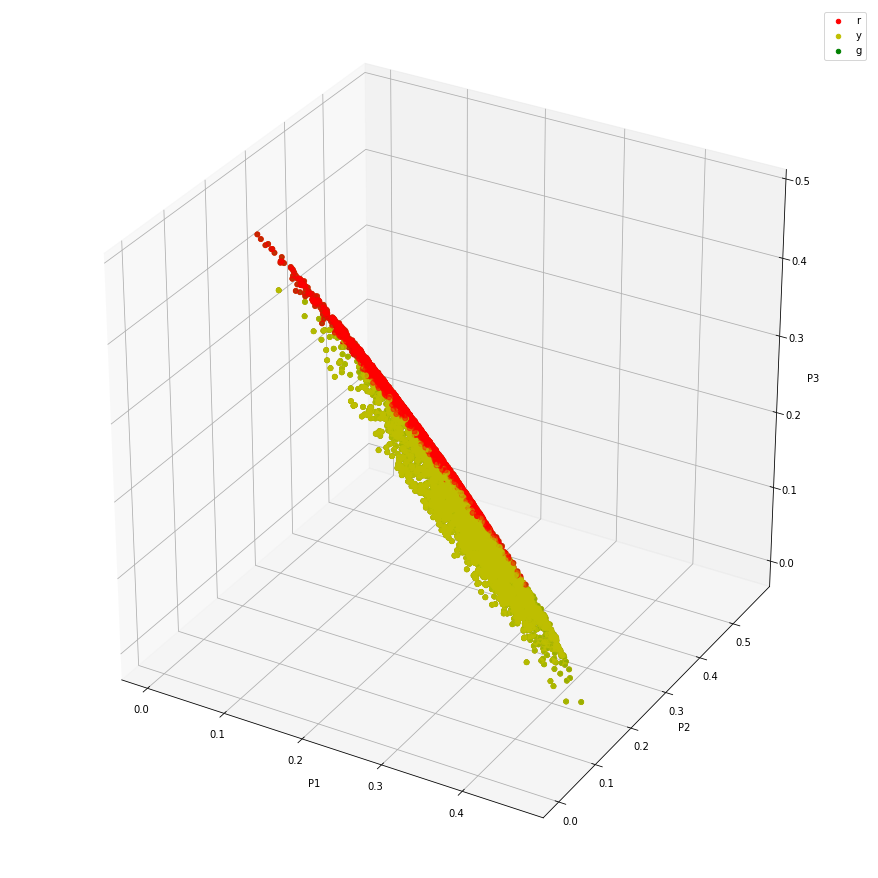

In [0]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
colours = {} 
colours[0] = 'r'
colours[1] = 'y'
colours[2] = 'g'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels] 

# Plotting the clustered scatter plot 
fig=plt.figure(figsize=(12,12)) 
ax = Axes3D(fig)

r = ax.scatter(W['P1'], W['P2'],W['P3'], color ='r')
y = ax.scatter(W['P1'], W['P2'],W['P3'], color ='y')
g = ax.scatter(W['P1'], W['P2'],W['P3'], color ='g')



ax.scatter(W['P1'], W['P2'],W['P3'], c = cvec,marker='.',s=100) 
ax.legend((r, y,g), ('r', 'y','g')) 
ax.set_xlabel('P1')
ax.set_ylabel('P2')
ax.set_zlabel('P3')
#plt.savefig('/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 5/3DSpectral.png',format='png',dpi=200, bbox_inches='tight')
plt.show() 

In [0]:
players.index=range(0,6598)

In [0]:
W['labels']=labels
W['team_position']=players.team_position
W

P1        P2        P3  labels team_position
0     0.047368  0.488026  0.160960       0             0
1     0.040814  0.460342  0.198757       0             0
2     0.050324  0.516370  0.125510       0             1
3     0.066097  0.500170  0.128242       0             0
4     0.111064  0.370759  0.218110       0             1
...        ...       ...       ...     ...           ...
6593  0.236350  0.336414  0.105085       0             1
6594  0.408477  0.155820  0.061505       1             3
6595  0.378056  0.136257  0.121322       1             3
6596  0.382285  0.249662  0.007929       1             3
6597  0.084267  0.428566  0.175025       0             1

[6598 rows x 5 columns]

In [0]:
W.team_position.value_counts()

3    2540
1    2052
0    1223
2     783
Name: team_position, dtype: int64

In [0]:
W.labels.value_counts()

1    3811
0    2787
Name: labels, dtype: int64

In [0]:
clus_1=W[W.labels==0]
clus_2=W[W.labels==1]

In [0]:
clus_1.team_position.value_counts()

1    1405
0    1208
2     119
3      55
Name: team_position, dtype: int64

In [0]:
clus_2.team_position.value_counts()

3    2485
2     664
1     647
0      15
Name: team_position, dtype: int64

Majority of the Forward players in Cluster 1 and Backward players in Cluster 2

In [0]:
kmeans = KMeans(n_clusters=4).fit(W[['P1','P2','P3']])
labels = kmeans.labels_
centers=kmeans.cluster_centers_

In [0]:
W['labels']=labels
W

P1        P2        P3  labels team_position
0     0.047368  0.488026  0.160960       1             0
1     0.040814  0.460342  0.198757       1             0
2     0.050324  0.516370  0.125510       1             1
3     0.066097  0.500170  0.128242       1             0
4     0.111064  0.370759  0.218110       3             1
...        ...       ...       ...     ...           ...
6593  0.236350  0.336414  0.105085       2             1
6594  0.408477  0.155820  0.061505       0             3
6595  0.378056  0.136257  0.121322       0             3
6596  0.382285  0.249662  0.007929       2             3
6597  0.084267  0.428566  0.175025       1             1

[6598 rows x 5 columns]

In [0]:
clus_0=W[W.labels==0]
clus_1=W[W.labels==1]
clus_2=W[W.labels==2]
clus_3=W[W.labels==3]

In [0]:
clus_0.team_position.value_counts()

3    1263
2     119
1      57
Name: team_position, dtype: int64

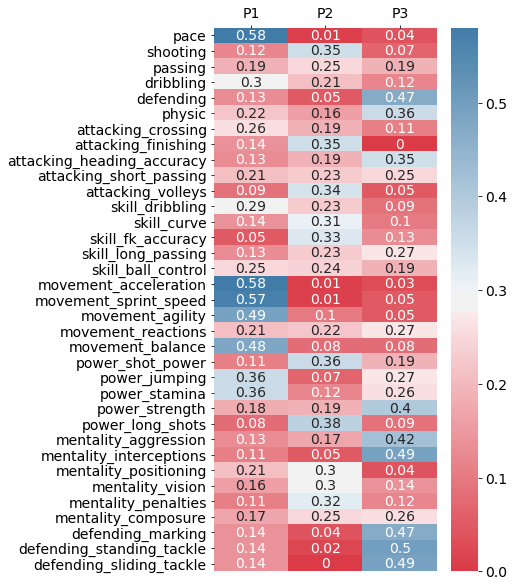

In [31]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5,10))
plt.rcParams.update({'font.size': 14})
ax.xaxis.set_ticks_position('top')
sns.heatmap(H.round(2).transpose(), xticklabels=['P1','P2','P3'], yticklabels=H.columns, cmap=sns.diverging_palette(10,240, as_cmap=True), ax=ax,annot=True)
plt.savefig('/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 6/NMF_ngk_feature_hm_forslide.png',format='png',dpi=250, bbox_inches='tight')


## t-SNE - Whole Data

Applied t-SNE from [here](https://www.datacamp.com/community/tutorials/introduction-t-sne).

In [0]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.manifold import TSNE
import time
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
# sns.set_style('darkgrid')
# sns.set_palette('muted')
# sns.set_context("notebook", font_scale=1.5,
#                 rc={"lines.linewidth": 2.5})

In [0]:
players=data = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_new.csv")
keep=['skill_moves','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
data=players[keep]
data = normalize(data)
gk_int=(players.player_positions_enc==str(0)).astype(np.int)

In [0]:
time_start = time.time()

players_tsne = TSNE(random_state=0).fit_transform(data)

print (f't-SNE done! Time elapsed: {time.time()-time_start} seconds') # usually 200 secs

t-SNE done! Time elapsed: 211.77617645263672 seconds


In [0]:
def data_scatter(x, colors, labels):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    # plt.xlim(-25, 25)
    # plt.ylim(-25, 25)
    # ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, labels[i], fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    # plt.savefig('/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 6/tSNE_non_gk.png',format='png',dpi=250, bbox_inches='tight')

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(4.103597, 2.3943367, 'Non GK'), Text(-46.019432, -18.018803, 'GK')])

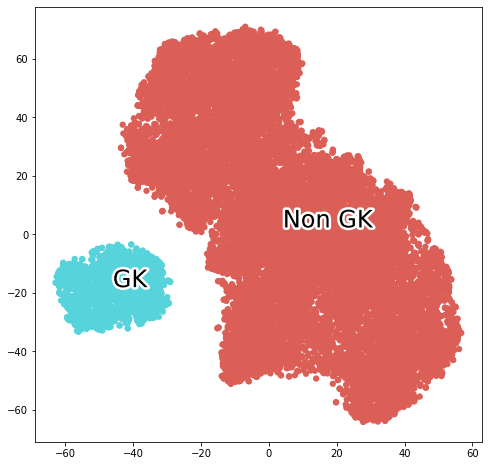

In [0]:
data_scatter(players_tsne, gk_int, ['Non GK','GK'])

## t-SNE - Non GK

I used same data preprocess from NNMF - Non GK

In [0]:
time_start = time.time()

non_gk_tsne = TSNE(random_state=0).fit_transform(data_norm)

print (f't-SNE done! Time elapsed: {time.time()-time_start} seconds') # usually 200 secs

t-SNE done! Time elapsed: 60.27643537521362 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-35.230236, -47.734463, 'Forwards'),
  Text(-15.853082, -15.299481, 'F-Midfielders'),
  Text(12.97659, 4.887909, 'B-Midfielders'),
  Text(27.438889, 30.743713, 'Defences')])

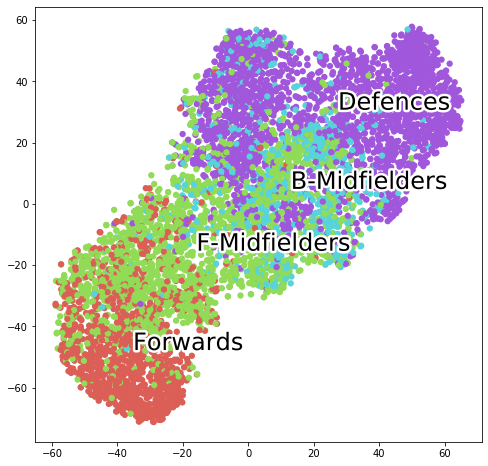

In [0]:
data_scatter(non_gk_tsne, players.team_position, ['Forwards','F-Midfielders','B-Midfielders','Defences'])

In [0]:
poses = players.team_position
poses[poses==2] = 1
poses[poses==3] = 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(<Figure size 576x576 with 1 Axes>,
 [Text(-35.230236, -47.734463, 'Forwards'),
  Text(-5.2407317, -9.922458, 'Midfielders'),
  Text(27.438889, 30.743713, 'Defences')])

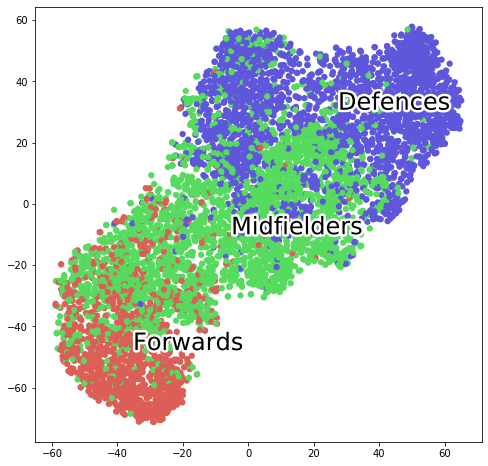

In [0]:
data_scatter(non_gk_tsne, poses, ['Forwards','Midfielders','Defences'])

In [0]:
print(players.team_position)

0        0
1        0
2        1
3        0
4        1
        ..
16138    1
16142    2
16144    2
16162    2
16200    1
Name: team_position, Length: 6598, dtype: object


## Champions League Round of 16 Analysis

## Hierarchical Clustering

In [0]:
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import scipy.cluster.hierarchy as shc

keep_all=['skill_moves','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
dictOfkeepall = { i : keep_all[i] for i in range(0, len(keep_all))}

keep_non_gk_features=['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
dictOfkeepNongkFeatures = { i : keep_non_gk_features[i] for i in range(0, len(keep_non_gk_features))}

def llf_non_gk(id):
  if id < len(keep_non_gk_features):
    return dictOfkeepNongkFeatures[id]
  else:
    return id

def llf_all(id):
  if id < len(keep_all):
    return dictOfkeepall[id]
  else:
    return id

def do_hierarchical_clustering(data_players, keep_features):
  # Normalize the data
  data=data_players[keep_features]
  data_scaled = normalize(data)
  data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

  # Get the linkage matrix - it has clusters information in each level 
  linkage_T =  shc.linkage(data_scaled.T, method='ward')

  # To check if our linkage metric (ward) is good for our data - Cophenetic correlation coefficient
  # It compares (correlates) the actual pairwise distances of all the samples to those implied by the hierarchical clustering. 
  # The closer the value is to 1, the better the clustering preserves the original distances
  c, coph_dists = cophenet(linkage_T, pdist(data_scaled.T))
  print(c)
  return linkage_T

def plot_dendograms(linkage_mat, cut_off, leaf_fun=llf_all, title='Hierarchical Clustering'):
  plt.figure(figsize=(12, 12))  
  plt.title(title, fontsize=14)  
  plt.xlabel('Features', fontsize=14)
  plt.ylabel('Distance - Ward\'s algorithm', fontsize=14)
  dend = shc.dendrogram(linkage_mat, leaf_rotation=90, leaf_font_size=12, leaf_label_func=leaf_fun)
  plt.axhline(y=cut_off, color='y', linestyle='--')
  plt.tight_layout()
  plt.gcf().savefig('hierarchical_clustering.png', dpi=300)



0.9427290356007143


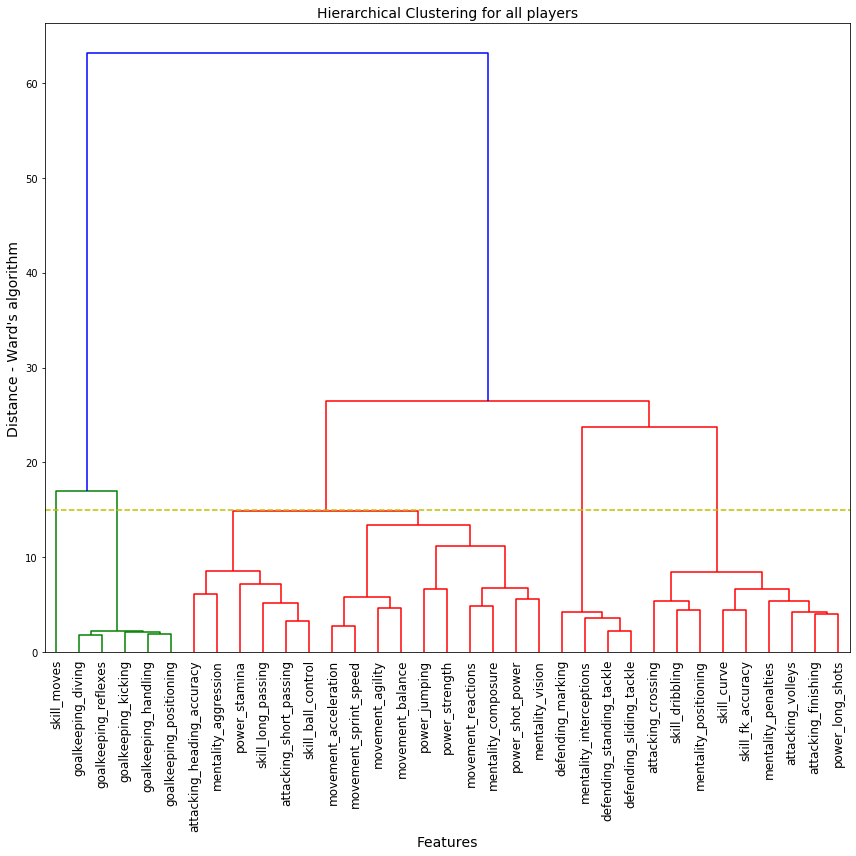

In [0]:
linkage_mat = do_hierarchical_clustering(players, keep_all)
plot_dendograms(linkage_mat=linkage_mat, cut_off=15, leaf_fun=llf_all, title='Hierarchical Clustering for all players')

0.7778683078629455


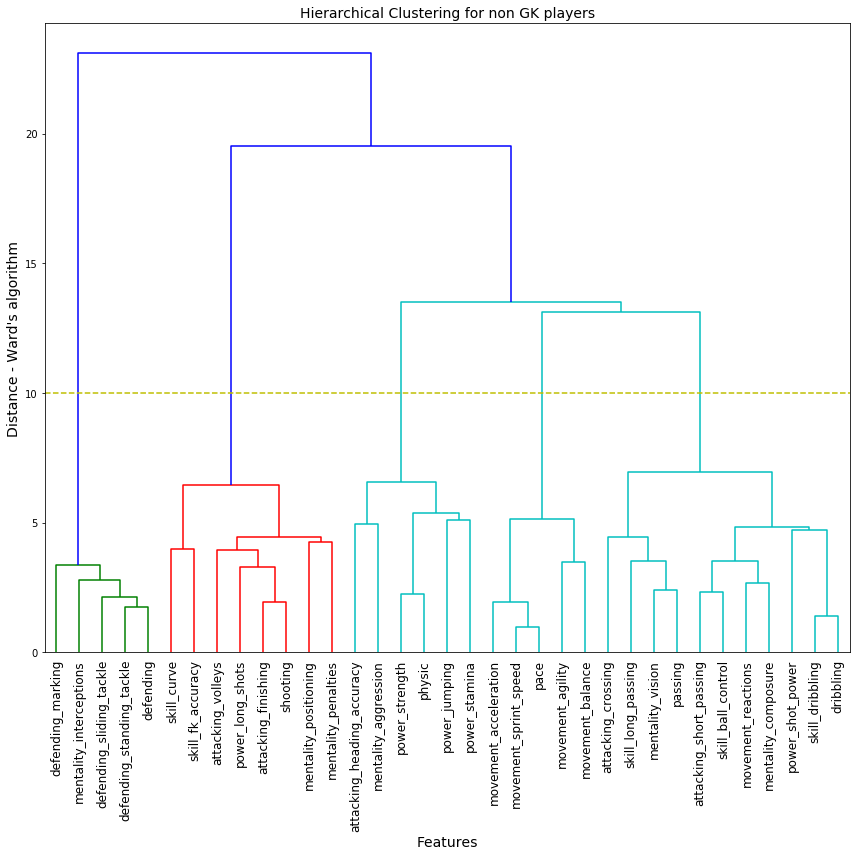

In [0]:
non_gk_players = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_NonGK.csv")
linkage_mat = do_hierarchical_clustering(non_gk_players, keep_non_gk_features)
plot_dendograms(linkage_mat=linkage_mat, cut_off=10, leaf_fun=llf_non_gk, title='Hierarchical Clustering for non GK players')

# Week 7


## Predict value_eur using features


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def data_for_pred(features, df=players, feature_to_predict="value_eur"):
  np.random.seed(20)
  val_pred_df = df[features]

  train_set, test_set = train_test_split(val_pred_df, test_size=0.2, random_state=20)
  print('Length of train and test set: ', len(train_set), len(test_set))

  print('Any null values: ', val_pred_df.isnull().any())

  train_features = train_set.drop(feature_to_predict, axis=1)
  train_labels = train_set[feature_to_predict].copy()
  test_features = test_set.drop(feature_to_predict, axis=1)
  test_labels = test_set[feature_to_predict].copy()

  return train_features, train_labels, test_features, test_labels

def LinearReg(train_features, train_labels, test_features, test_labels):
  lin_reg = LinearRegression()
  lin_reg.fit(train_features, train_labels)
  pred = lin_reg.predict(test_features)
  
  lin_mse = mean_squared_error(test_labels, pred)
  lin_rmse = np.sqrt(lin_mse)
  print('Linear Regression RMSE on Test set: ', lin_rmse)

  score = r2_score(test_labels, pred)  
  print('Linear Regression Accuracy (R2 score):',format(score*100,'.2f'),'%')

  plot(test_labels, pred, figname='Linear Regression')

def DecisionTree(train_features, train_labels, test_features, test_labels):
  reg = DecisionTreeRegressor(random_state=20)
  reg.fit(train_features, train_labels)

  pred = reg.predict(test_features)
  tree_mse = mean_squared_error(test_labels, pred)
  tree_rmse = np.sqrt(tree_mse)
  print('Decision Tree RMSE on Test set: ', tree_rmse)

  score = r2_score(test_labels, pred)  
  print('Decision Tree Accuracy (R2 score):',format(score*100,'.2f'),'%')

  plot(test_labels, pred, figname='Decision Tree')

def RandomForest(train_features, train_labels, test_features, test_labels):
  forest_reg = RandomForestRegressor(n_estimators=100, random_state=20)
  forest_reg.fit(train_features, train_labels)

  forest_pred = forest_reg.predict(test_features)
  forest_mse = mean_squared_error(test_labels, forest_pred)
  forest_rmse = np.sqrt(forest_mse)
  print('Random Forest RMSE on Test set: ', forest_rmse)

  score = r2_score(test_labels, forest_pred)  
  print('Random Forest Accuracy (R2 score):',format(score*100,'.2f'),'%')

  plot(test_labels, forest_pred, figname='Random Forest')

def plot(test, pred, figname='default.png'):
  x = np.linspace(0,8*1e7,100)
  fig = plt.figure(figsize=(12,12))
  plt.scatter(test,pred,c='green')
  plt.plot(x,x, 'k--')
  plt.xlabel('Test set', fontsize=12)
  plt.ylabel('Predictions', fontsize=12)
  plt.xlim(0,3*1e5)
  plt.ylim(0,3*1e5)
  plt.title(figname, fontsize=12)
  #plt.gcf().savefig(f'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 7/{figname} Wage.png', dpi=200)
  plt.show()

Length of train and test set:  14622 3656
Any null values:  age                         False
overall                     False
potential                   False
international_reputation    False
wage_eur                    False
value_eur                   False
dtype: bool
Linear Regression RMSE on Test set:  2404541.8906708607
Linear Regression Accuracy (R2 score): 79.27 %


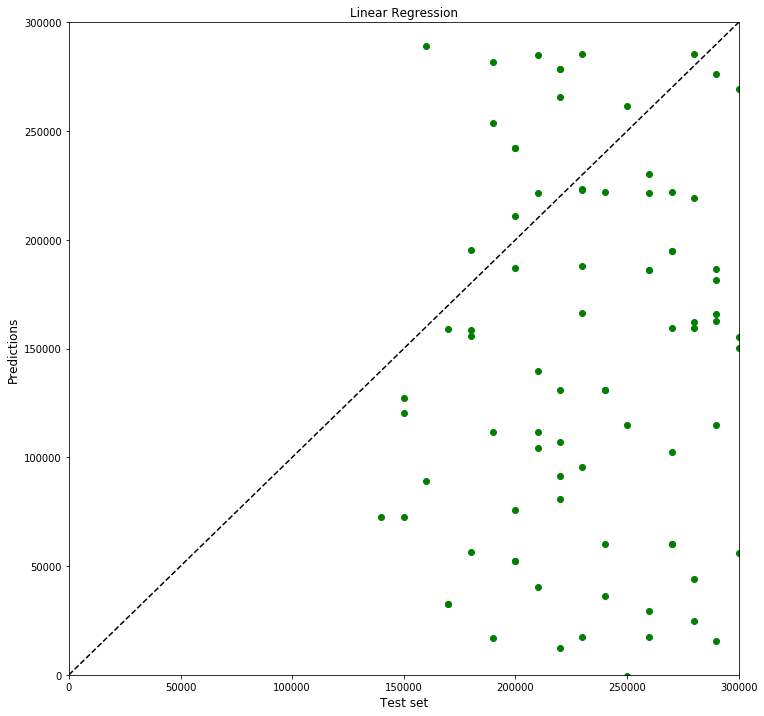

Decision Tree RMSE on Test set:  1008941.922853917
Decision Tree Accuracy (R2 score): 96.35 %


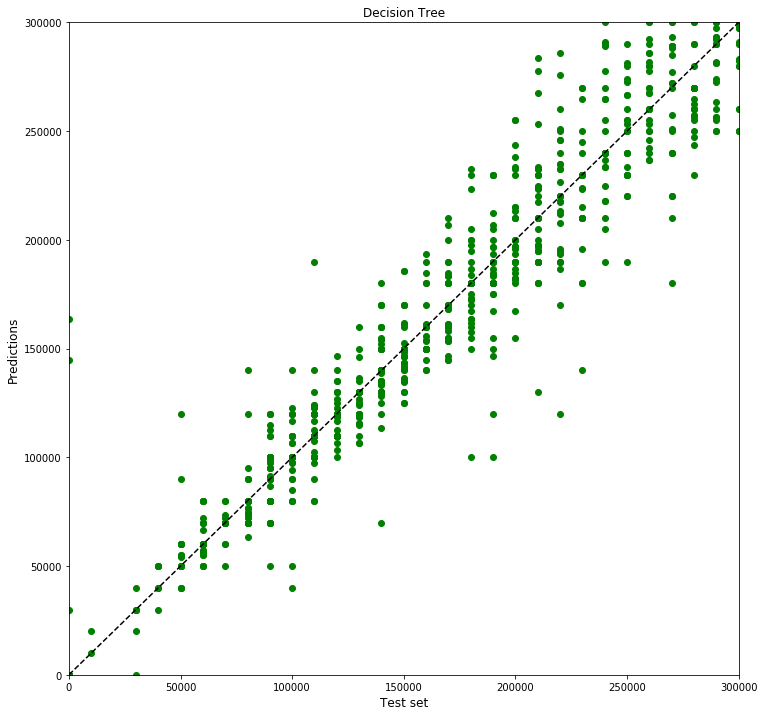

Random Forest RMSE on Test set:  644701.3793993299
Random Forest Accuracy (R2 score): 98.51 %


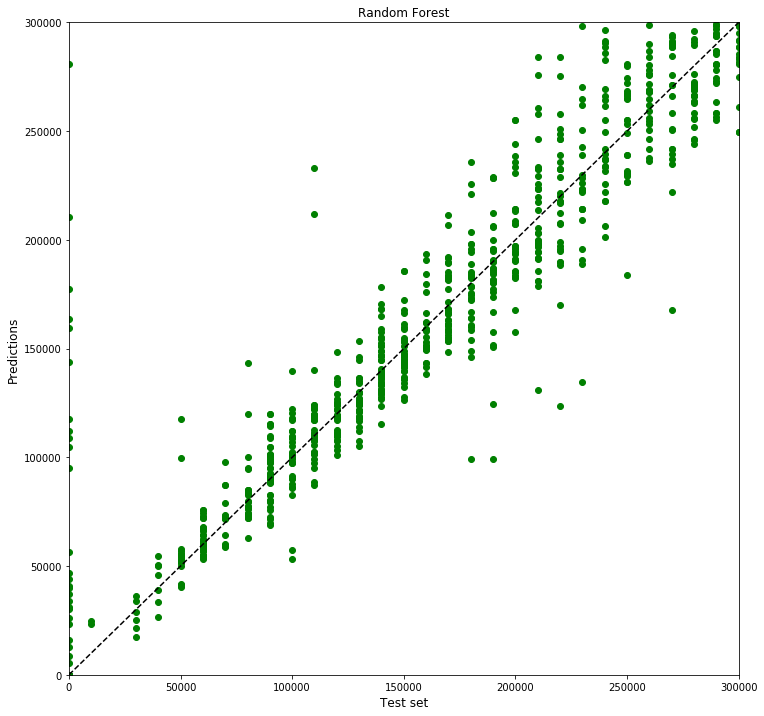

In [0]:
features = ['age', 'overall', 'potential', 'international_reputation',  'wage_eur', 'value_eur']
train_features, train_labels, test_features, test_labels = data_for_pred(features=features, df=players)
LinearReg(train_features, train_labels, test_features, test_labels)
DecisionTree(train_features, train_labels, test_features, test_labels)
RandomForest(train_features, train_labels, test_features, test_labels)

Length of train and test set:  12993 3249
Any null values:  age                         False
overall                     False
potential                   False
international_reputation    False
wage_eur                    False
value_eur                   False
pace                        False
shooting                    False
passing                     False
dribbling                   False
defending                   False
physic                      False
dtype: bool
Linear Regression RMSE on Test set:  2432929.541274104
Linear Regression Accuracy (R2 score): 78.76 %


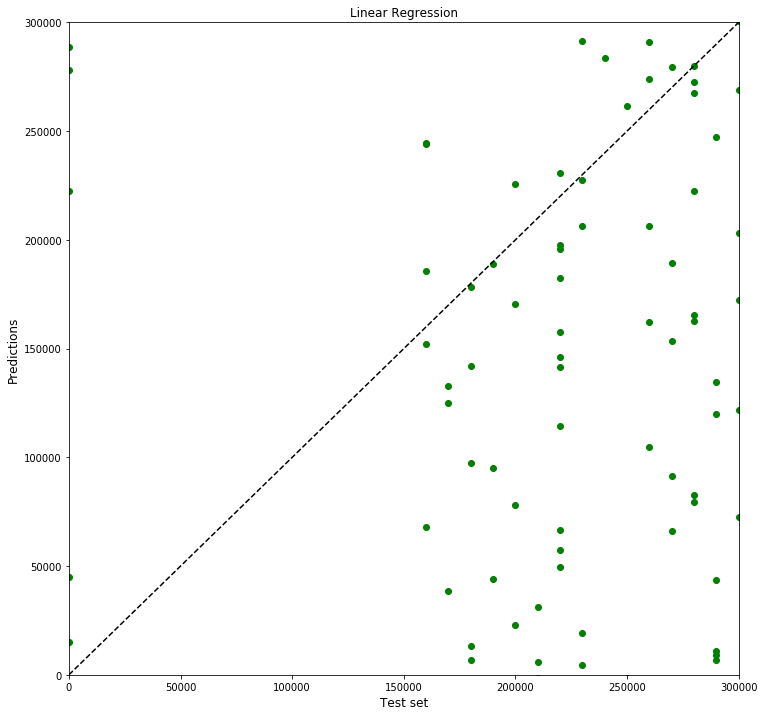

Decision Tree RMSE on Test set:  799473.948889076
Decision Tree Accuracy (R2 score): 97.71 %


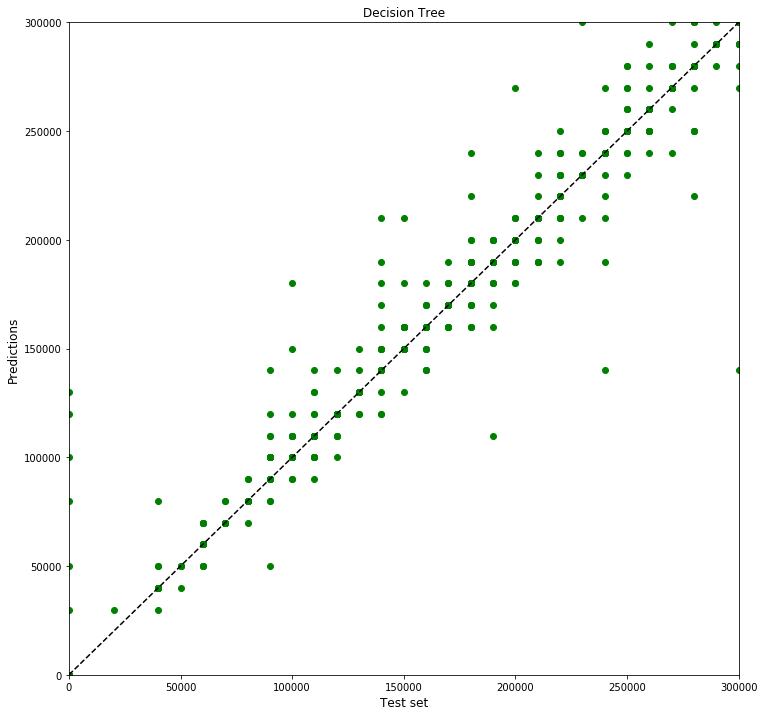

Random Forest RMSE on Test set:  330544.2404277574
Random Forest Accuracy (R2 score): 99.61 %


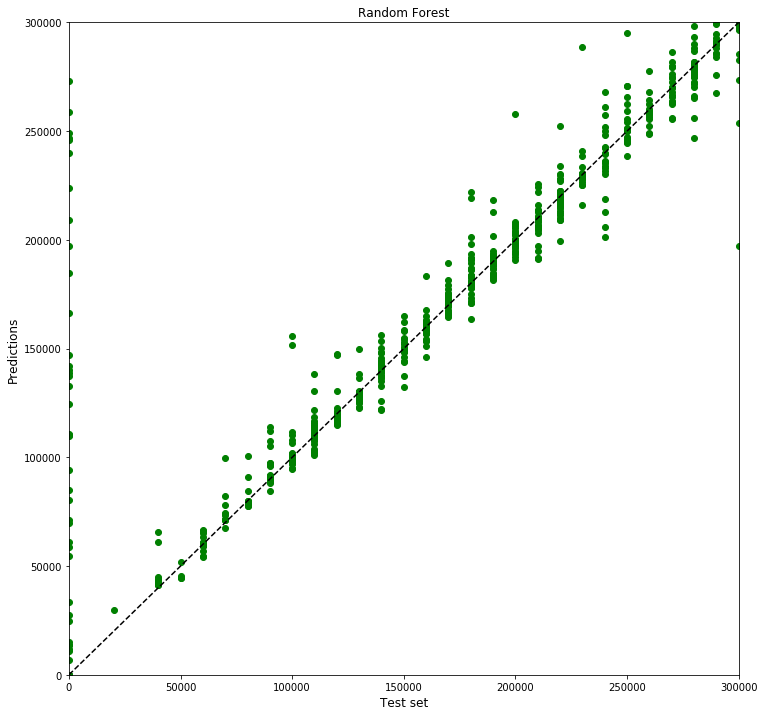

In [0]:
features = ['age', 'overall', 'potential', 'international_reputation',  'wage_eur', 'value_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
train_features, train_labels, test_features, test_labels = data_for_pred(features=features, df=non_gk_players)
LinearReg(train_features, train_labels, test_features, test_labels)
DecisionTree(train_features, train_labels, test_features, test_labels)
RandomForest(train_features, train_labels, test_features, test_labels)

Length of train and test set:  1628 408
Any null values:  age                         False
overall                     False
potential                   False
international_reputation    False
wage_eur                    False
value_eur                   False
gk_diving                   False
gk_handling                 False
gk_kicking                  False
gk_reflexes                 False
gk_speed                    False
gk_positioning              False
dtype: bool
Linear Regression RMSE on Test set:  2131200.4738624096
Linear Regression Accuracy (R2 score): 77.98 %


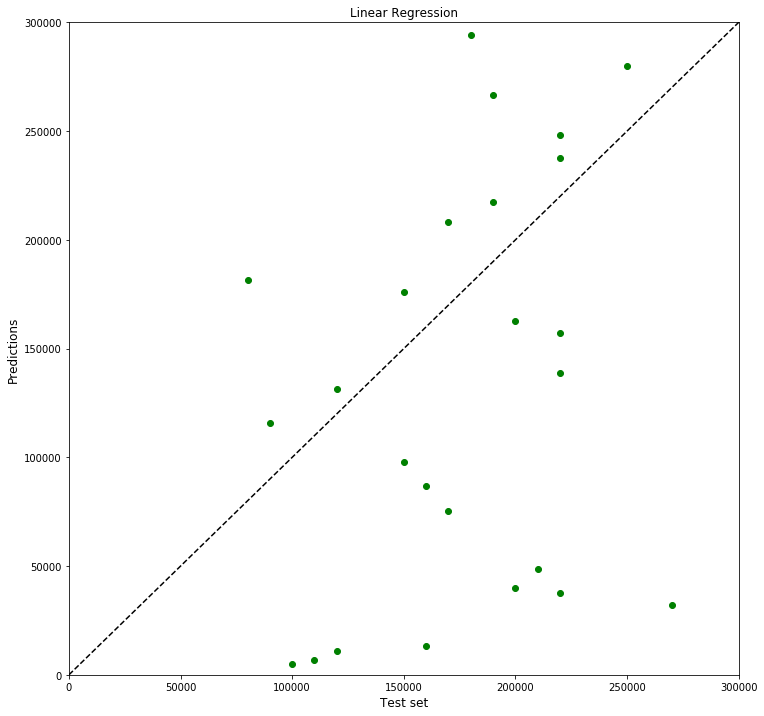

Decision Tree RMSE on Test set:  1065955.3100572347
Decision Tree Accuracy (R2 score): 94.49 %


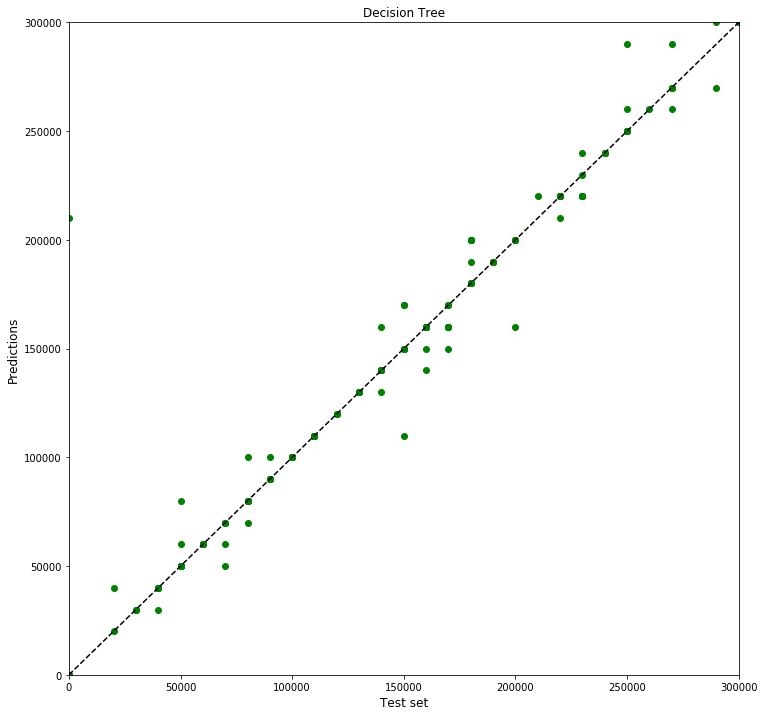

Random Forest RMSE on Test set:  514554.1213328655
Random Forest Accuracy (R2 score): 98.72 %


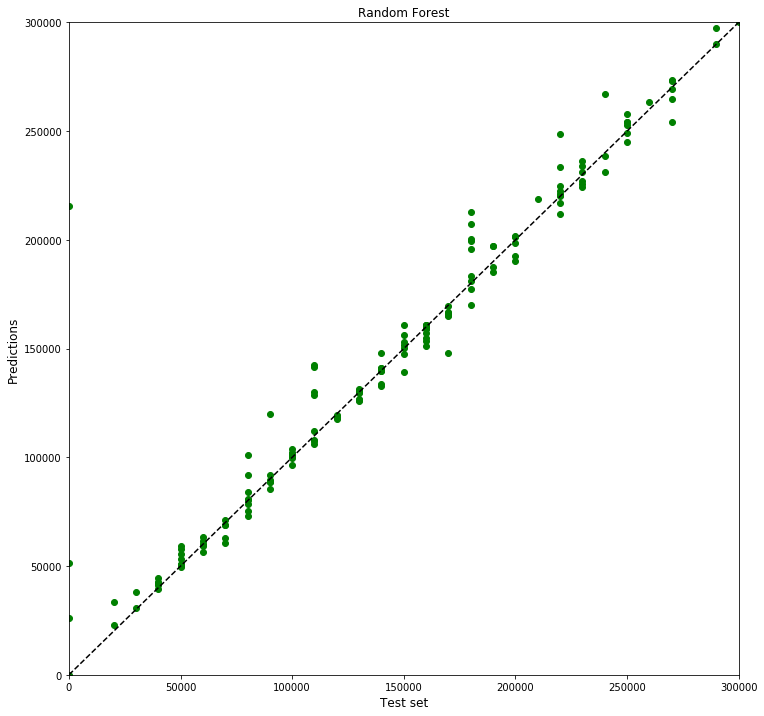

In [0]:
features = ['age', 'overall', 'potential', 'international_reputation',  'wage_eur', 'value_eur', 'gk_diving',	'gk_handling', 'gk_kicking',	'gk_reflexes',	'gk_speed',	'gk_positioning']
train_features, train_labels, test_features, test_labels = data_for_pred(features=features, df=gk_players)
LinearReg(train_features, train_labels, test_features, test_labels)
DecisionTree(train_features, train_labels, test_features, test_labels)
RandomForest(train_features, train_labels, test_features, test_labels)

## Predict wage_eur

In [0]:
def compare_models(features, df=players, feature_to_predict='value_eur'):
  generic_features = ['age', 'overall', 'potential', 'international_reputation',  'wage_eur', 'value_eur']
  non_gk_features = ['age', 'overall', 'potential', 'international_reputation',  'wage_eur', 'value_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
  gk_features = ['age', 'overall', 'potential', 'international_reputation',  'wage_eur', 'value_eur', 'gk_diving',	'gk_handling', 'gk_kicking',	'gk_reflexes',	'gk_speed',	'gk_positioning']

  if features == 'all':
    features = generic_features
    df = players
  elif features == 'non_gk':
    features = non_gk_features
    df = non_gk_players
  elif features == 'gk':
    features = gk_features
    df = gk_players
  # else use custom features and df

  train_features, train_labels, test_features, test_labels = data_for_pred(features=features, df=df, feature_to_predict=feature_to_predict)
  LinearReg(train_features, train_labels, test_features, test_labels)
  DecisionTree(train_features, train_labels, test_features, test_labels)
  RandomForest(train_features, train_labels, test_features, test_labels)


Length of train and test set:  14622 3656
Any null values:  age                         False
overall                     False
potential                   False
international_reputation    False
wage_eur                    False
value_eur                   False
dtype: bool
Linear Regression RMSE on Test set:  9169.729959934391
Linear Regression Accuracy (R2 score): 76.86 %


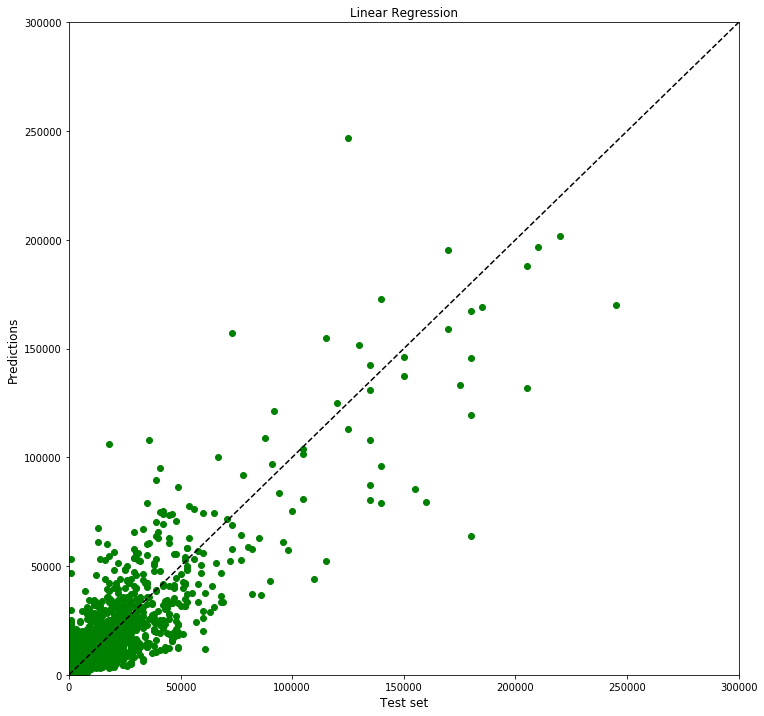

Decision Tree RMSE on Test set:  13376.446609340164
Decision Tree Accuracy (R2 score): 50.77 %


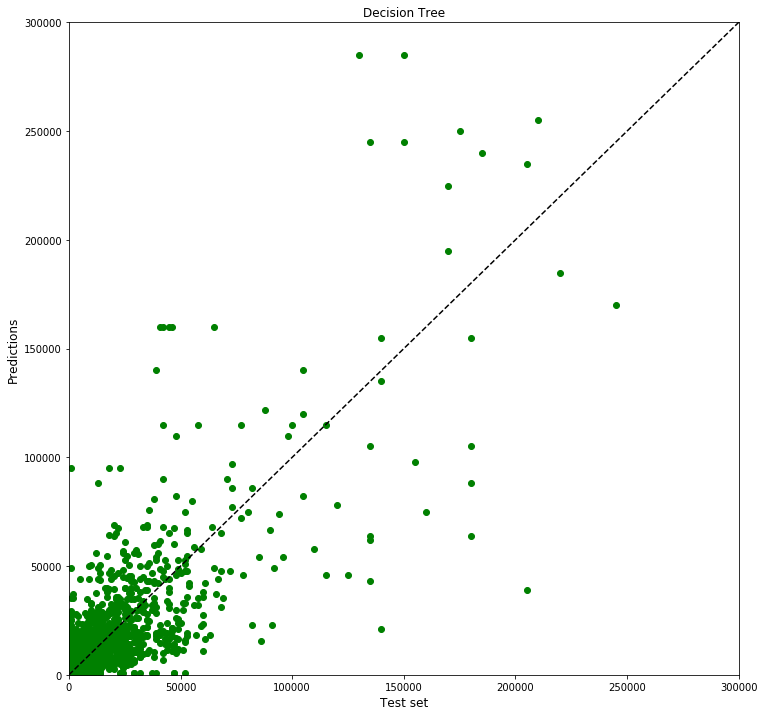

Random Forest RMSE on Test set:  10793.186360387877
Random Forest Accuracy (R2 score): 67.95 %


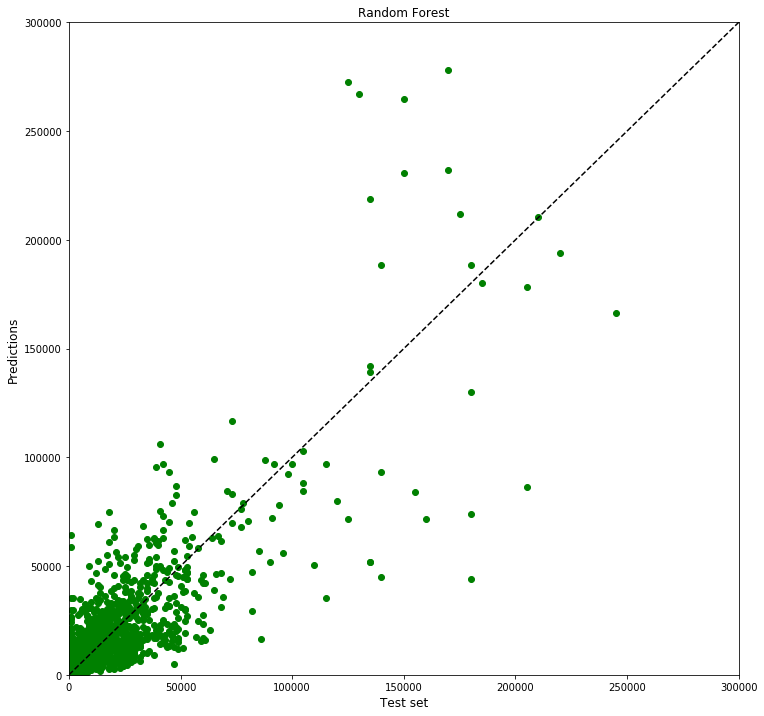

In [0]:
compare_models(features='all', feature_to_predict='wage_eur')

Length of train and test set:  14430 3608
Any null values:  age                         False
overall                     False
potential                   False
international_reputation    False
wage_eur                    False
value_eur                   False
dtype: bool
Linear Regression RMSE on Test set:  9533.866498774103
Linear Regression Accuracy (R2 score): 74.77 %


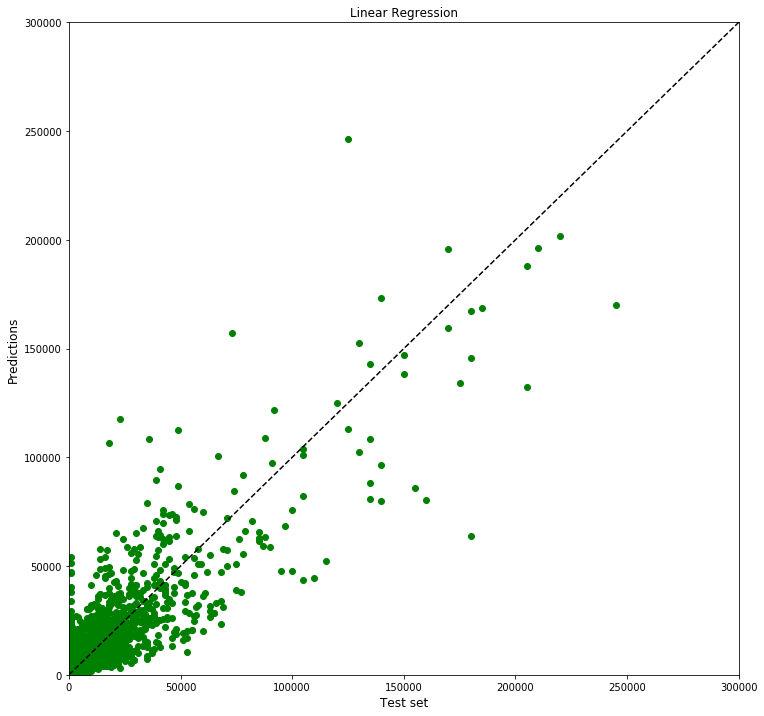

Decision Tree RMSE on Test set:  13101.672167823399
Decision Tree Accuracy (R2 score): 52.36 %


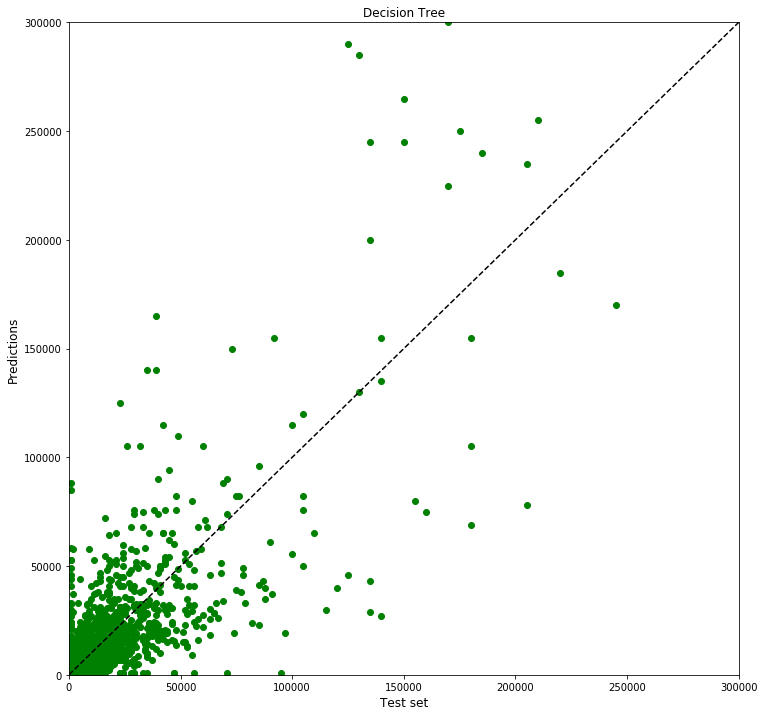

Random Forest RMSE on Test set:  11075.24013988141
Random Forest Accuracy (R2 score): 65.96 %


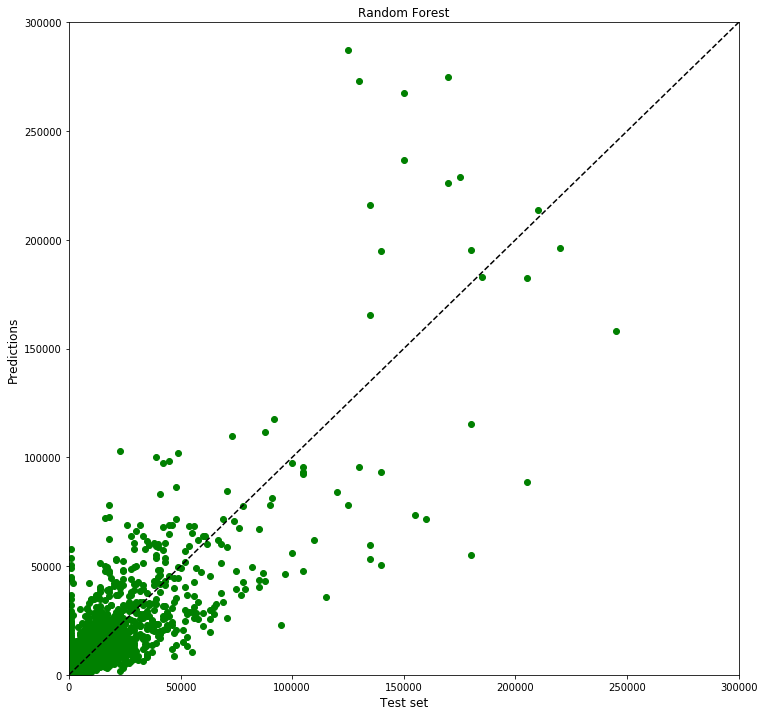

In [0]:
# It seems like zero-wage is not the problem here
features = ['age', 'overall', 'potential', 'international_reputation',  'wage_eur', 'value_eur']
compare_models(features=features, df=players[players['wage_eur']!=0], feature_to_predict='wage_eur')

Length of train and test set:  12993 3249
Any null values:  age                         False
overall                     False
potential                   False
international_reputation    False
wage_eur                    False
value_eur                   False
pace                        False
shooting                    False
passing                     False
dribbling                   False
defending                   False
physic                      False
dtype: bool
Linear Regression RMSE on Test set:  9753.16161244324
Linear Regression Accuracy (R2 score): 75.71 %


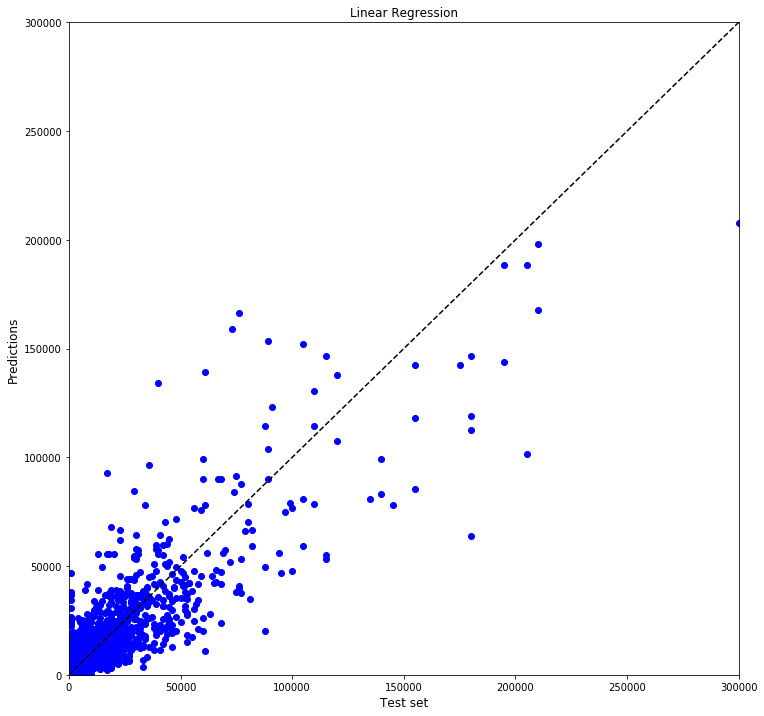

Decision Tree RMSE on Test set:  13017.425639033807
Decision Tree Accuracy (R2 score): 56.73 %


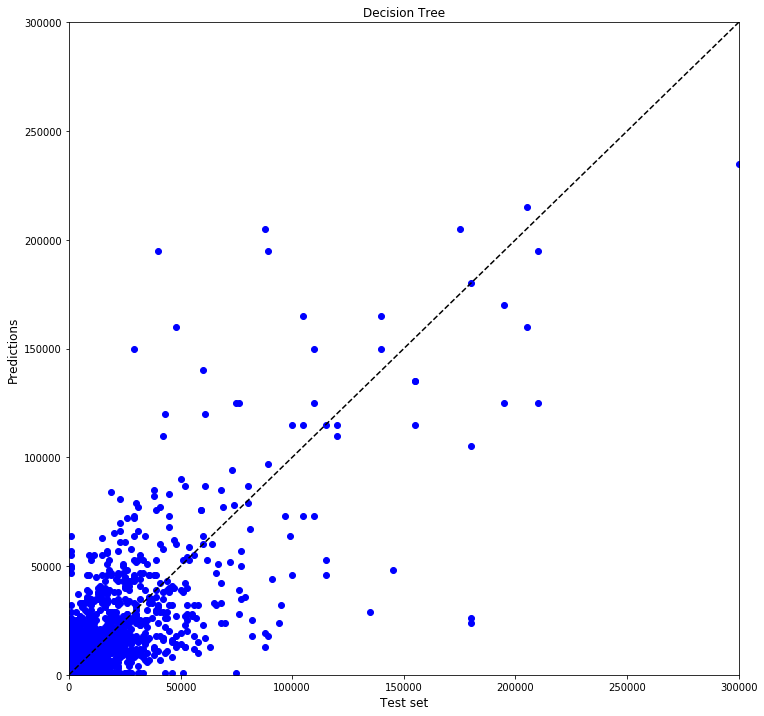

Random Forest RMSE on Test set:  9688.272309587579
Random Forest Accuracy (R2 score): 76.03 %


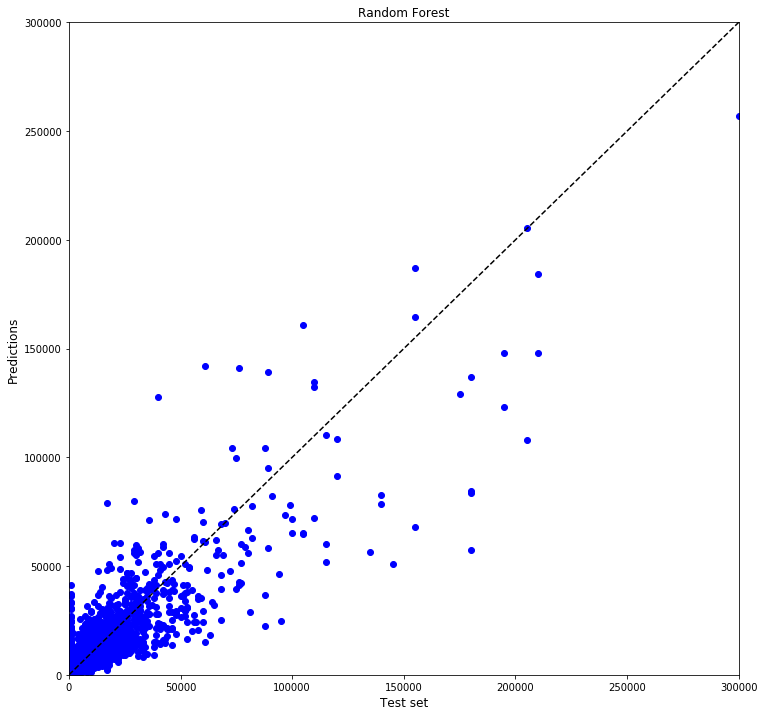

In [0]:
compare_models(features='non_gk', feature_to_predict='wage_eur')

Length of train and test set:  1628 408
Any null values:  age                         False
overall                     False
potential                   False
international_reputation    False
wage_eur                    False
value_eur                   False
gk_diving                   False
gk_handling                 False
gk_kicking                  False
gk_reflexes                 False
gk_speed                    False
gk_positioning              False
dtype: bool
Linear Regression RMSE on Test set:  8067.5096208042
Linear Regression Accuracy (R2 score): 75.62 %


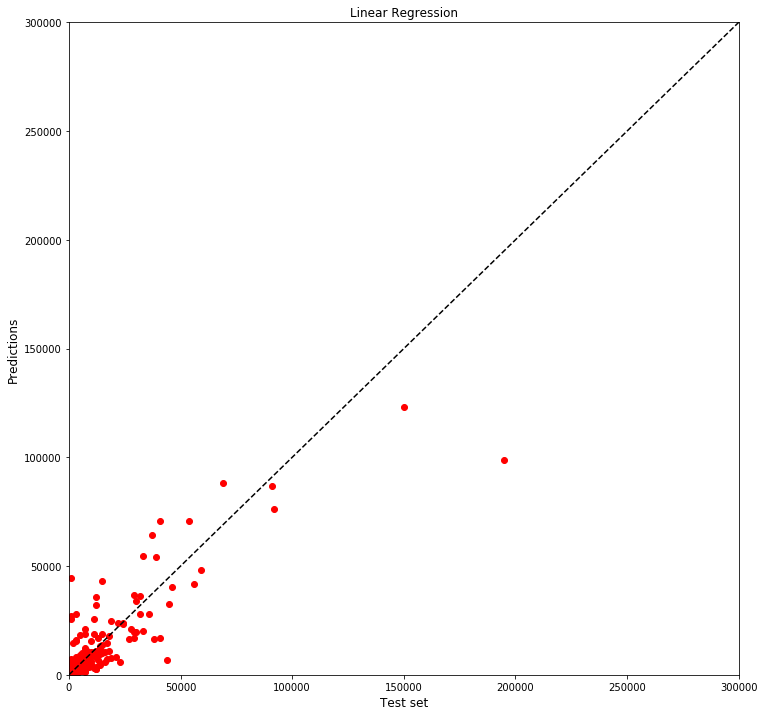

Decision Tree RMSE on Test set:  9430.603083037899
Decision Tree Accuracy (R2 score): 66.68 %


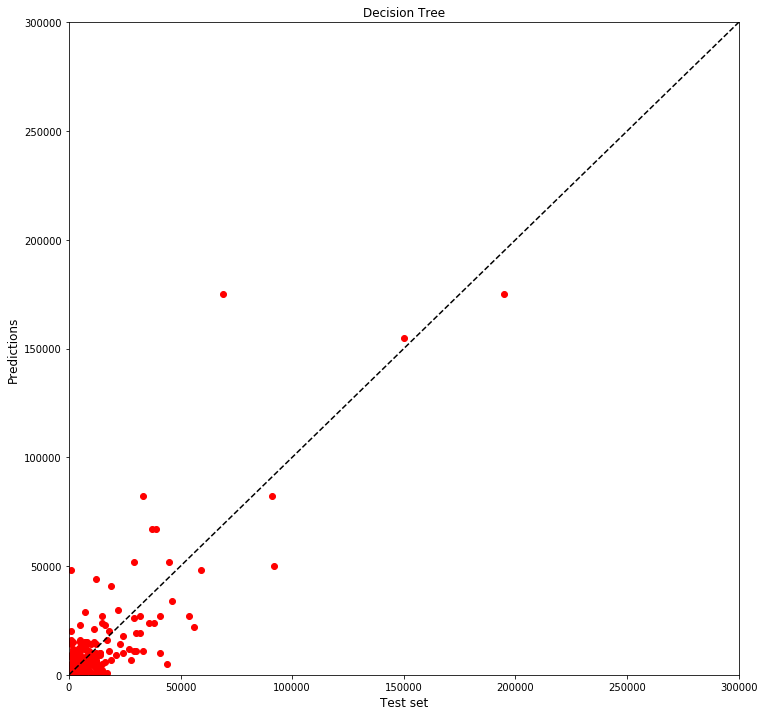

Random Forest RMSE on Test set:  7227.915756044102
Random Forest Accuracy (R2 score): 80.43 %


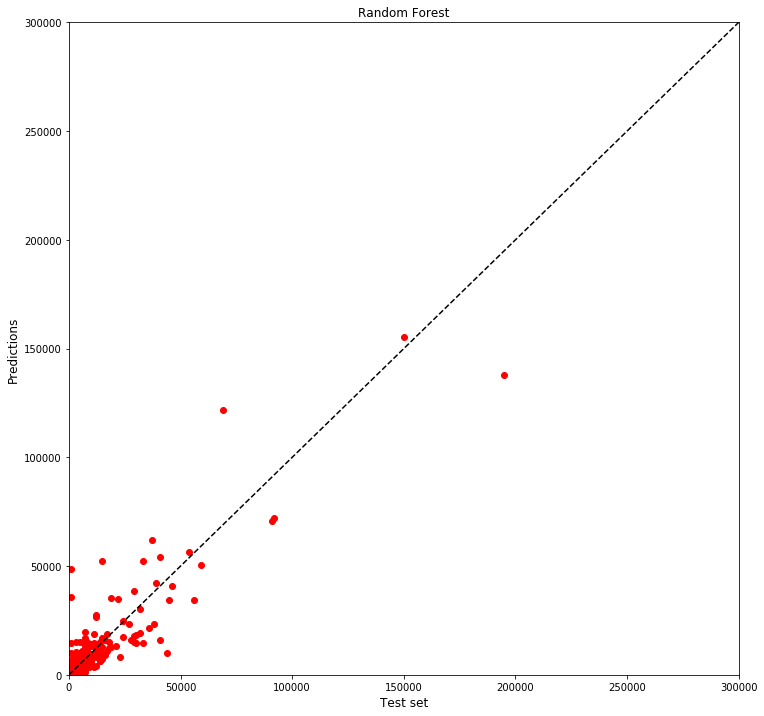

In [0]:
compare_models(features='gk', feature_to_predict='wage_eur')

## Predict age

In [0]:
compare_models(features='all', feature_to_predict='age')

Length of train and test set:  14622 3656
Any null values:  age                         False
overall                     False
potential                   False
international_reputation    False
wage_eur                    False
value_eur                   False
dtype: bool
Linear Regression RMSE on Test set:  2.149289269365849
Linear Regression Accuracy (R2 score): 78.47 %
Decision Tree RMSE on Test set:  1.2125353729642285
Decision Tree Accuracy (R2 score): 93.15 %
Random Forest RMSE on Test set:  1.0644121709941332
Random Forest Accuracy (R2 score): 94.72 %


In [0]:
compare_models(features='non_gk', feature_to_predict='age')

Length of train and test set:  12993 3249
Any null values:  age                         False
overall                     False
potential                   False
international_reputation    False
wage_eur                    False
value_eur                   False
pace                        False
shooting                    False
passing                     False
dribbling                   False
defending                   False
physic                      False
dtype: bool
Linear Regression RMSE on Test set:  2.0025660375481986
Linear Regression Accuracy (R2 score): 80.85 %
Decision Tree RMSE on Test set:  1.3612045432470754
Decision Tree Accuracy (R2 score): 91.15 %
Random Forest RMSE on Test set:  1.0000890849823791
Random Forest Accuracy (R2 score): 95.22 %


In [0]:
compare_models(features='gk', feature_to_predict='age')

Length of train and test set:  1628 408
Any null values:  age                         False
overall                     False
potential                   False
international_reputation    False
wage_eur                    False
value_eur                   False
gk_diving                   False
gk_handling                 False
gk_kicking                  False
gk_reflexes                 False
gk_speed                    False
gk_positioning              False
dtype: bool
Linear Regression RMSE on Test set:  2.3042614449206518
Linear Regression Accuracy (R2 score): 80.22 %
Decision Tree RMSE on Test set:  1.8557013366865889
Decision Tree Accuracy (R2 score): 87.17 %
Random Forest RMSE on Test set:  1.3152780590236497
Random Forest Accuracy (R2 score): 93.56 %


#Week 8

Remember to run last week's functions as they're used below.

## Re-predict wage_eur with correlation matrix help

###Using Correlation Matrix features alone

In [0]:
def plot(test, pred, figname='default.png'):
  x = np.linspace(0,8*1e7,100)
  fig = plt.figure(figsize=(12,12))
  plt.scatter(test,pred,c='darkgray')
  plt.plot(x,x, 'k--')
  plt.xlabel('Test set', fontsize=12)
  plt.ylabel('Predictions', fontsize=12)
  plt.xlim(0,3*1e5)
  plt.ylim(0,3*1e5)
  plt.title(figname, fontsize=12)
  plt.gcf().savefig(f'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/{figname} Wage_cl_fh_200.png', dpi=200)
  plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


Length of train and test set:  14622 3656
Any null values:  overall                     False
international_reputation    False
movement_reactions          False
value_eur                   False
wage_eur                    False
release_clause_eur          False
pos_offset                  False
dtype: bool
Linear Regression RMSE on Test set:  9182.015486110571
Linear Regression Accuracy (R2 score): 76.80 %


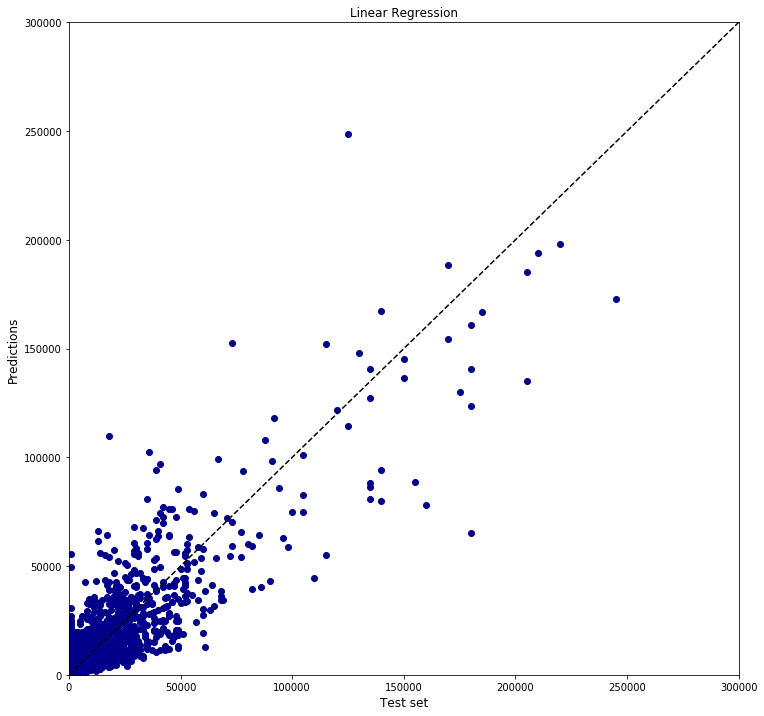

Decision Tree RMSE on Test set:  14285.985698736806
Decision Tree Accuracy (R2 score): 43.84 %


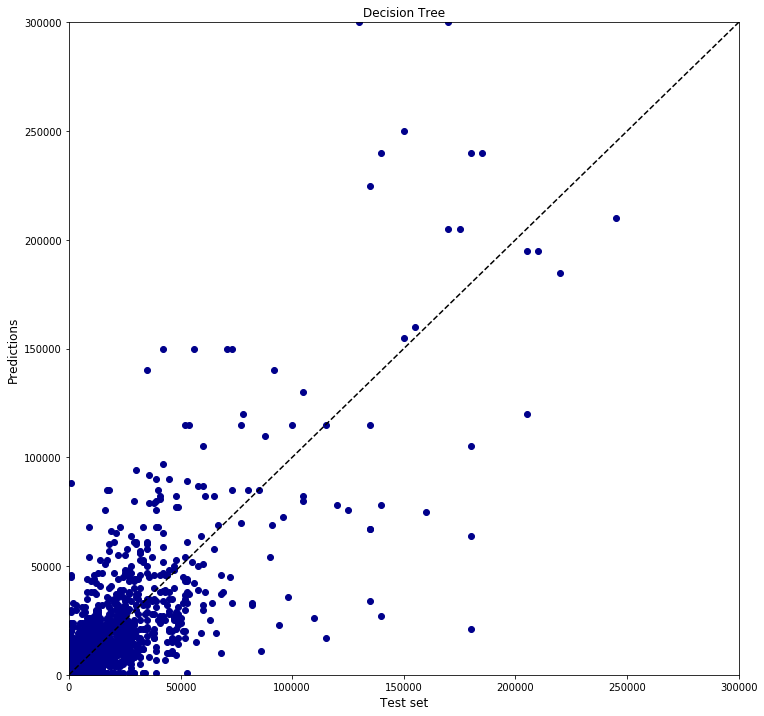

Random Forest RMSE on Test set:  9536.539896545582
Random Forest Accuracy (R2 score): 74.98 %


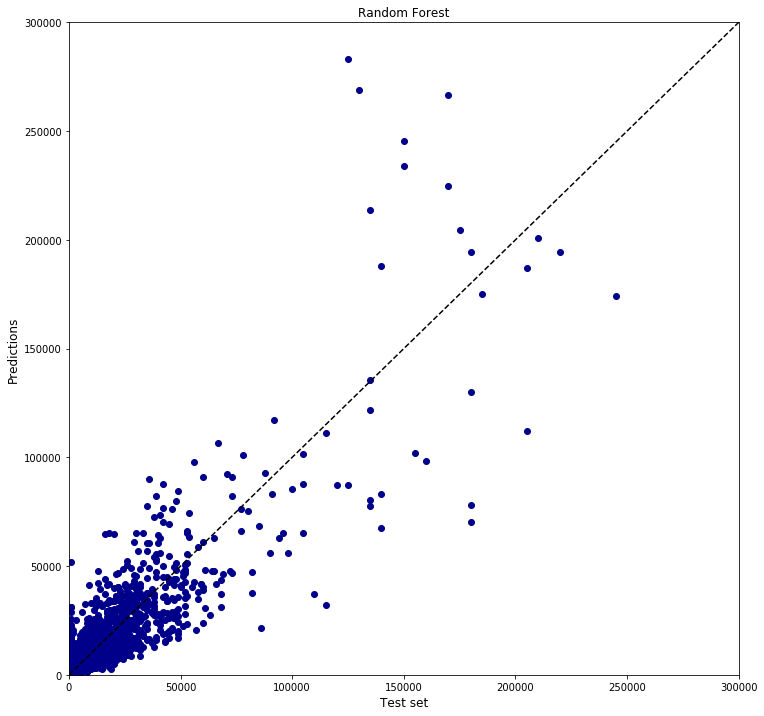

In [0]:
wage_eur_pred_features = ['overall', 'international_reputation',  'movement_reactions', 'value_eur', 'wage_eur', 'release_clause_eur', 'pos_offset']
players_enc = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_new.csv")
features = wage_eur_pred_features
df = players_enc[wage_eur_pred_features]
df.fillna(0, inplace=True)

train_features, train_labels, test_features, test_labels = data_for_pred(features=features, df=df, feature_to_predict='wage_eur')
LinearReg(train_features, train_labels, test_features, test_labels)
DecisionTree(train_features, train_labels, test_features, test_labels)
RandomForest(train_features, train_labels, test_features, test_labels)

### Using Correlation Matrix Features + Club

#### One-hot encoding the club values

In [0]:
encoded = pd.get_dummies(players,prefix=['encc'], columns = ['club'], drop_first=True).filter(regex='^enc',axis=1)
encoded.head()

encc_1. FC Heidenheim 1846  ...  encc_Śląsk Wrocław
0                           0  ...                   0
1                           0  ...                   0
2                           0  ...                   0
3                           0  ...                   0
4                           0  ...                   0

[5 rows x 697 columns]

Length of train and test set:  14622 3656
Any null values:  overall                     False
international_reputation    False
movement_reactions          False
value_eur                   False
wage_eur                    False
                            ...  
encc_Zagłębie Lubin         False
encc_Çaykur Rizespor        False
encc_Örebro SK              False
encc_Östersunds FK          False
encc_Śląsk Wrocław          False
Length: 704, dtype: bool
Linear Regression RMSE on Test set:  6426.122946403294
Linear Regression Accuracy (R2 score): 88.64 %


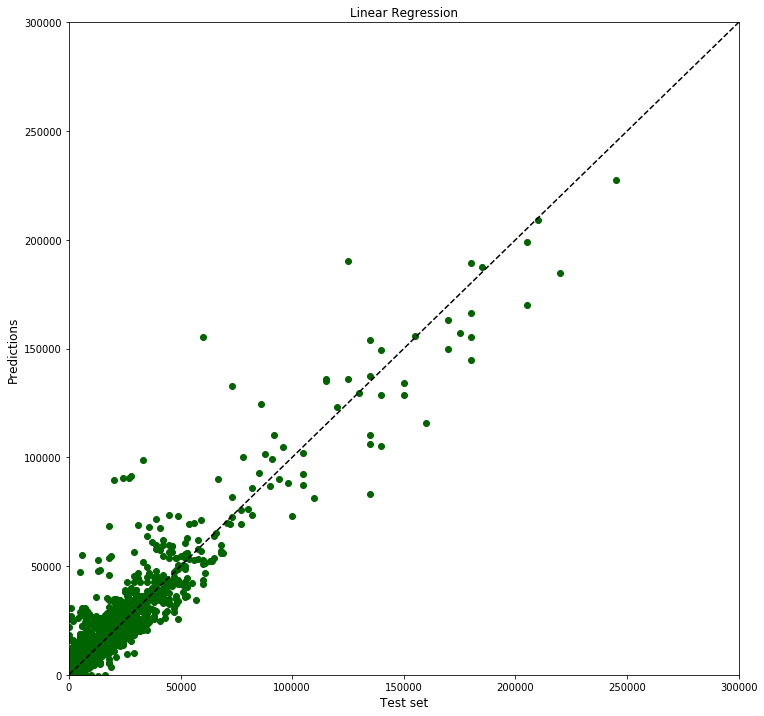

Decision Tree RMSE on Test set:  9645.490635842581
Decision Tree Accuracy (R2 score): 74.40 %


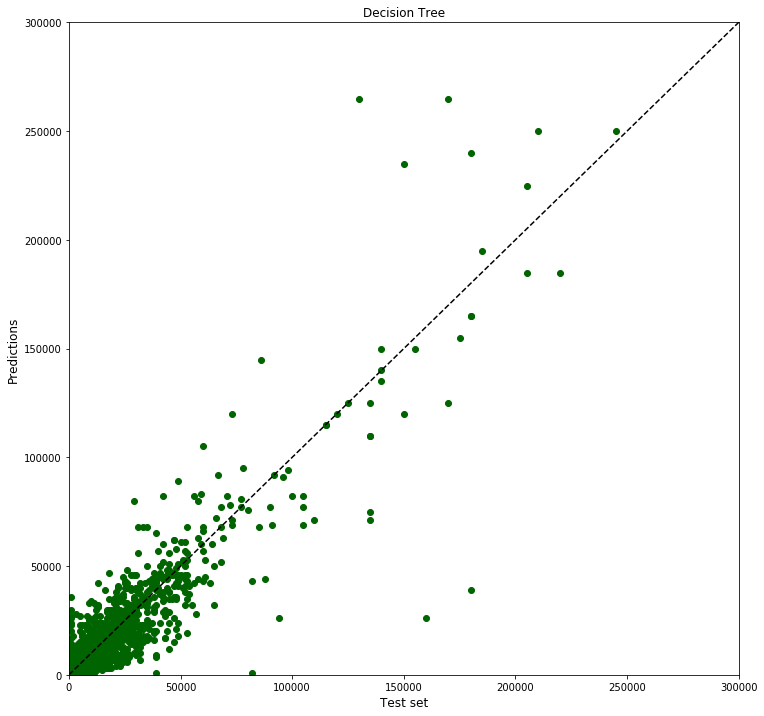

Random Forest RMSE on Test set:  6304.280282388414
Random Forest Accuracy (R2 score): 89.06 %


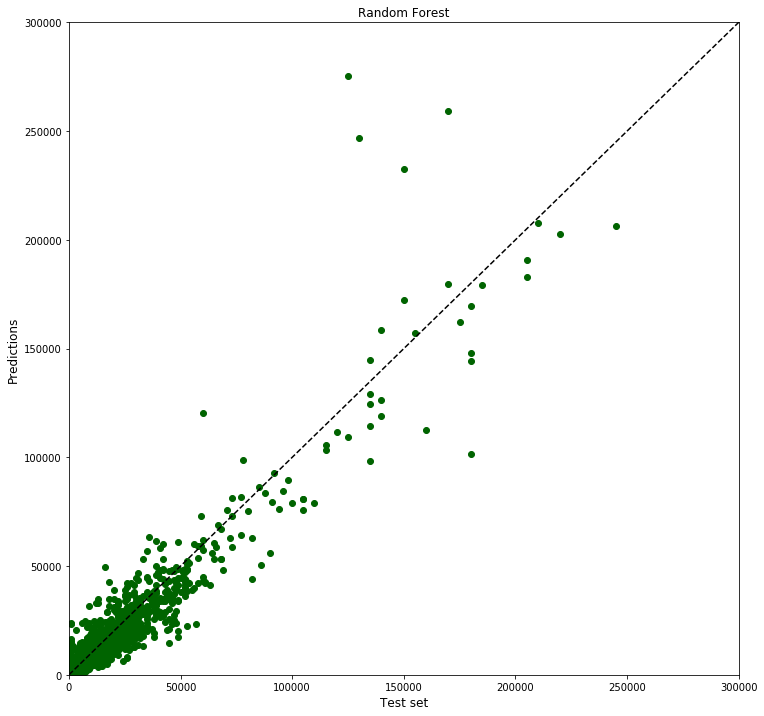

In [0]:
wage_eur_pred_features = ['overall', 'international_reputation',  'movement_reactions', 'value_eur', 'wage_eur', 'release_clause_eur', 'pos_offset']
players_enc = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_new.csv")
features = wage_eur_pred_features + list(encoded.columns.values)
df = players_enc[wage_eur_pred_features]
df = pd.concat([df, encoded], axis=1)
df.fillna(0, inplace=True)

train_features, train_labels, test_features, test_labels = data_for_pred(features=features, df=df, feature_to_predict='wage_eur')
LinearReg(train_features, train_labels, test_features, test_labels)
DecisionTree(train_features, train_labels, test_features, test_labels)
RandomForest(train_features, train_labels, test_features, test_labels)

#### Feature Hashing

In [0]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=100, input_type='string')
f = h.fit_transform(players['club'])
hash_df = pd.DataFrame(f.toarray())
hash_df.head()

0    1    2    3    4    5    6   ...   93   94   95   96   97   98   99
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0 -1.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0 -1.0
3  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 100 columns]

Length of train and test set:  14622 3656
Any null values:  overall                     False
international_reputation    False
movement_reactions          False
value_eur                   False
wage_eur                    False
                            ...  
95                          False
96                          False
97                          False
98                          False
99                          False
Length: 107, dtype: bool
Linear Regression RMSE on Test set:  8969.651662153732
Linear Regression Accuracy (R2 score): 77.86 %


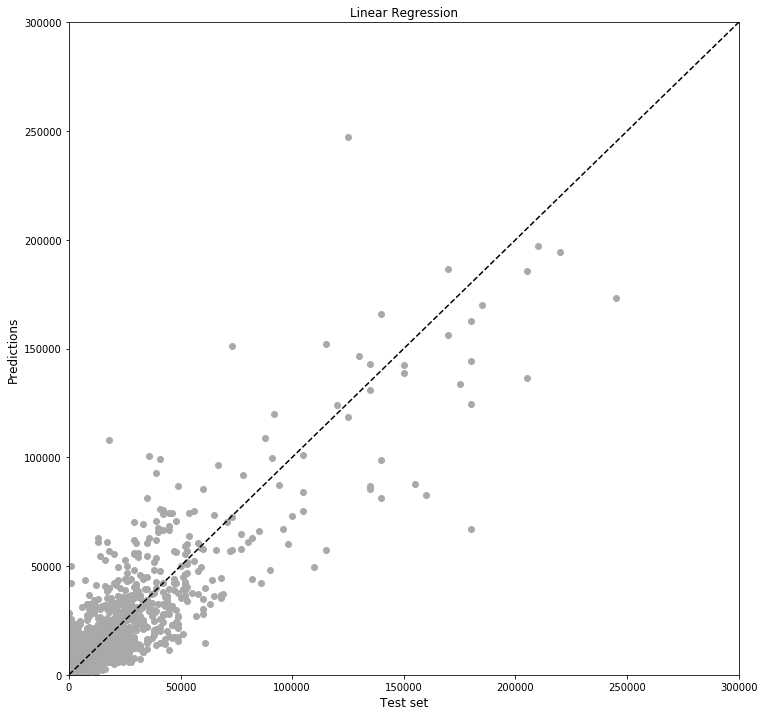

Decision Tree RMSE on Test set:  11922.717384260406
Decision Tree Accuracy (R2 score): 60.89 %


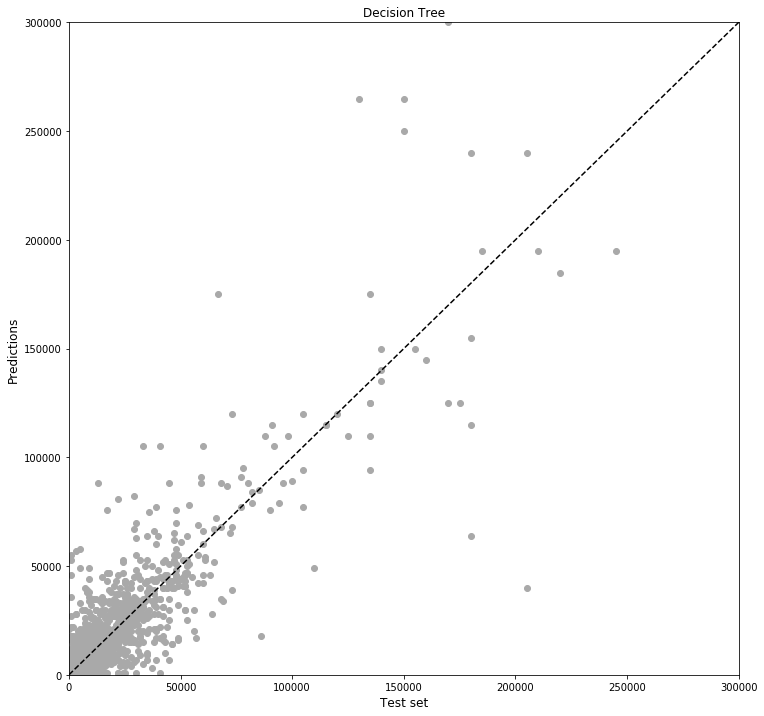

Random Forest RMSE on Test set:  6291.46508183865
Random Forest Accuracy (R2 score): 89.11 %


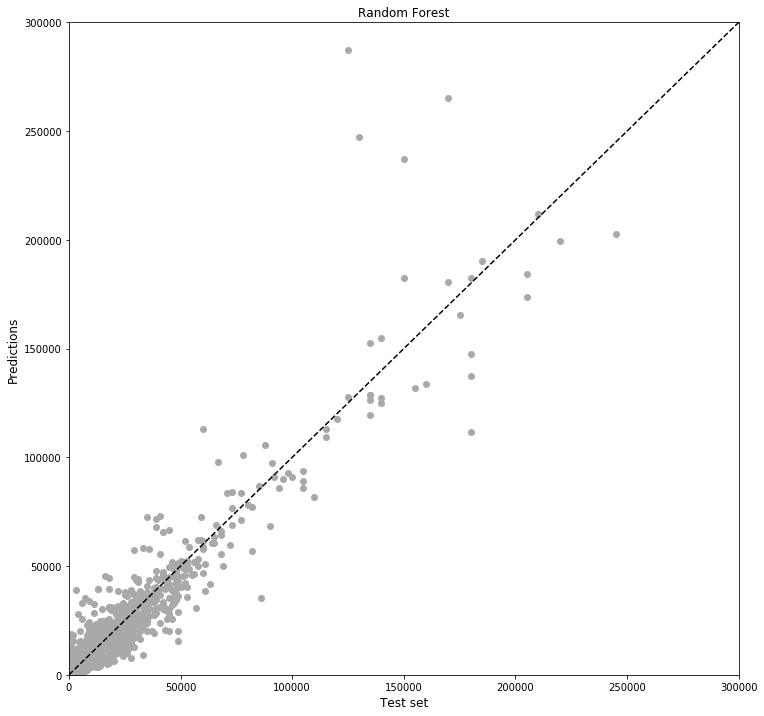

In [0]:
wage_eur_pred_features = ['overall', 'international_reputation',  'movement_reactions', 'value_eur', 'wage_eur', 'release_clause_eur', 'pos_offset']
players_enc = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_new.csv")
features = wage_eur_pred_features + list(hash_df.columns.values)
df = players_enc[wage_eur_pred_features]
df = pd.concat([df, hash_df], axis=1)
df.fillna(0, inplace=True)

train_features, train_labels, test_features, test_labels = data_for_pred(features=features, df=df, feature_to_predict='wage_eur')
LinearReg(train_features, train_labels, test_features, test_labels)
DecisionTree(train_features, train_labels, test_features, test_labels)
RandomForest(train_features, train_labels, test_features, test_labels)

## Position Classifier

### Data setup

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
	
from sklearn.utils import resample

In [0]:
players = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_NonGK.csv")
team_players = players[players.team_position_enc.notnull()]
team_players=team_players[team_players.team_position!='SUB']
team_players=team_players[team_players.team_position!='RES']

In [0]:
players = pd.read_csv("/content/drive/My Drive/Data Mining Lab - FIFA/players_20_NonGK.csv")
nation_players = players[players.nation_position_enc.notnull()]
nation_players=nation_players[nation_players.nation_position!='SUB']
nation_players=nation_players[nation_players.nation_position!='RES']

### Random forest in Step 1

#### Step 1

In [0]:
keep_columns=['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']
pos = {
        'LS': 0,
        'ST': 0,
        'RS': 0,
        'LW': 0,
        'LF': 0,
        'CF': 0,
        'RF': 0,
        'RW': 0,
        'LB': 2, 
        'LCB': 2,
        'CB' : 2,
        'RCB': 2,
        'RB': 2,
        'LAM': 1,
        'CAM': 1,
        'RAM': 1,
        'LM': 1,
        'LCM': 1,
        'CM' : 1,
        'RCM' : 1,
        'RM': 1,
        'LWB': 1,
        'LDM': 1,
        'CDM': 1,
        'RDM': 1,
        'RWB': 1
        }
team_players.team_position_enc = team_players.team_position.map(pos)

In [0]:
team_players.team_position_enc.value_counts()

1    2835
2    2540
0    1223
Name: team_position_enc, dtype: int64

In [0]:
df_majority = team_players[team_players.team_position_enc==1]
df_minority_1 = team_players[team_players.team_position_enc==0]
df_minority_2 = team_players[team_players.team_position_enc==2]

df_minority_1_upsampled = resample(df_minority_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=2835,    # to match majority class
                                 random_state=123) # reproducible results

df_minority_2_upsampled = resample(df_minority_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=2835,    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_1_upsampled,df_minority_2_upsampled])

In [0]:
df_upsampled.team_position_enc.value_counts()

2    2835
1    2835
0    2835
Name: team_position_enc, dtype: int64

##### SVM

In [0]:
y=df_upsampled.team_position_enc
X = df_upsampled.loc[:,keep_columns]
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = svm.SVC(decision_function_shape='ovo',gamma='auto')
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [0]:
confusion_matrix(y_test, pred,labels=[0,1,2])

array([[461,  80,   5],
       [ 98, 399,  77],
       [  1,  52, 528]])

In [0]:
print(classification_report(y_test, pred,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       546
           1       0.75      0.70      0.72       574
           2       0.87      0.91      0.89       581

    accuracy                           0.82      1701
   macro avg       0.81      0.82      0.81      1701
weighted avg       0.81      0.82      0.81      1701



##### Random Forest


In [0]:
from sklearn.ensemble import RandomForestClassifier

y=df_upsampled.team_position_enc
X = df_upsampled.loc[:,keep_columns]
#scaler = StandardScaler() 
#X = scaler.fit_transform(X) 

#X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

In [0]:
confusion_matrix(y_test, pred,labels=[0,1,2])

array([[525,  21,   0],
       [ 62, 463,  49],
       [  0,  19, 562]])

In [0]:
print(classification_report(y_test, pred,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       546
           1       0.92      0.81      0.86       574
           2       0.92      0.97      0.94       581

    accuracy                           0.91      1701
   macro avg       0.91      0.91      0.91      1701
weighted avg       0.91      0.91      0.91      1701



#### Step 2

###### Prepare - Forwards, Midfielders, Defenders, all

In [0]:
fw_pos = {'LS':0,
         'ST':1,
         'RS':2,
         'LW':0,
         'LF':0,
         'CF':1,
         'RF':2,
         'RW':2
         }
        
mf_pos = {'LAM':0,
          'CAM':1,
          'RAM':2,
          'LM':0,
          'LCM':1,
          'CM':1,
          'RCM':1,
          'RM':2,
          'LWB':0,
          'LDM':0,
          'CDM':1,
          'RDM':2,
          'RWB':2}

df_pos = {'LB' : 0,
       'LCB' : 1,
       'CB': 1,
       'RCB': 1,
       'RB': 2}

features = ['team_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
            'attacking_crossing', 'attacking_finishing',	'attacking_heading_accuracy',	'attacking_short_passing',	'attacking_volleys',	
            'skill_dribbling',	'skill_curve',	'skill_fk_accuracy',	'skill_long_passing',	'skill_ball_control',	
            'movement_acceleration',	'movement_sprint_speed',	'movement_agility',	'movement_reactions',	'movement_balance',
            'power_shot_power',	'power_jumping',	'power_stamina',	'power_strength',	'power_long_shots',	
            'mentality_aggression',	'mentality_interceptions',	'mentality_positioning',	'mentality_vision',	'mentality_penalties',	'mentality_composure',
            'defending_marking',	'defending_standing_tackle',	'defending_sliding_tackle',	
            'goalkeeping_diving',	'goalkeeping_handling',	'goalkeeping_kicking',	'goalkeeping_positioning',	'goalkeeping_reflexes',
            'ls',	'st',	'rs',	'lw',	'lf',	'cf',	'rf',	'rw',	'lam',	'cam',	'ram',	'lm',	'lcm',	'cm',	'rcm',	'rm',	'lwb',	'ldm',	
            'cdm',	'rdm',	'rwb',	'lb',	'lcb',	'cb',	'rcb',	'rb'] #, 'pos_offset', ]
        

In [0]:
pos_dict = {**fw_pos , **mf_pos, **df_pos}
pos_dict

{'CAM': 1,
 'CB': 1,
 'CDM': 1,
 'CF': 1,
 'CM': 1,
 'LAM': 0,
 'LB': 0,
 'LCB': 1,
 'LCM': 1,
 'LDM': 0,
 'LF': 0,
 'LM': 0,
 'LS': 0,
 'LW': 0,
 'LWB': 0,
 'RAM': 2,
 'RB': 2,
 'RCB': 1,
 'RCM': 1,
 'RDM': 2,
 'RF': 2,
 'RM': 2,
 'RS': 2,
 'RW': 2,
 'RWB': 2,
 'ST': 1}

In [0]:
forwards_pred = forward_players[features]
print(forwards_pred.shape)
print(forwards_pred['team_position'].describe())
print(forwards_pred['team_position'].unique())
print(forwards_pred['team_position'].isnull().any())
print(forwards_pred['team_position'].isna().sum())

forwards_pred.dropna(subset=['team_position'],inplace=True)
forwards_pred['team_position'] = forwards_pred.team_position.map(fw_pos)
forwards_pred['team_position'] = forwards_pred['team_position'].astype('Int64')
forwards_pred=forwards_pred[forwards_pred.team_position.isin([0,1,2])]

print(forwards_pred['team_position'].value_counts())


(3743, 67)
count     3695
unique      10
top        SUB
freq      1840
Name: team_position, dtype: object
['RW' 'LW' 'ST' 'CF' 'LS' 'RS' 'RF' 'LF' 'SUB' 'RES' nan]
True
48
1    472
0    376
2    375
Name: team_position, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [0]:
mf_pred = midfield_players[features]

print(mf_pred['team_position'].describe())
print(mf_pred['team_position'].unique())
print(mf_pred['team_position'].isnull().any())
print(mf_pred['team_position'].isna().sum())

mf_pred.dropna(subset=['team_position'],inplace=True)
mf_pred['team_position'] = mf_pred.team_position.map(mf_pos)
mf_pred['team_position'] = mf_pred['team_position'].astype('Int64')
mf_pred=mf_pred[mf_pred.team_position.isin([0,1,2])]

print(mf_pred['team_position'].value_counts())


count     7205
unique      15
top        SUB
freq      3172
Name: team_position, dtype: object
['CAM' 'RCM' 'CDM' 'LDM' 'RM' 'LCM' 'LM' 'RDM' 'RAM' 'CM' 'LAM' 'RWB'
 'LWB' 'SUB' 'RES' nan]
True
90
1    1390
2     724
0     721
Name: team_position, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [0]:
df_pred = defence_players[features]

print(df_pred['team_position'].describe())
print(df_pred['team_position'].unique())
print(df_pred['team_position'].isnull().any())
print(df_pred['team_position'].isna().sum())

df_pred.dropna(subset=['team_position'],inplace=True)
df_pred['team_position'] = df_pred.team_position.map(df_pos)
df_pred['team_position'] = df_pred['team_position'].astype('Int64')
df_pred=df_pred[df_pred.team_position.isin([0,1,2])]

print(df_pred['team_position'].value_counts())


count     5142
unique       7
top        SUB
freq      1880
Name: team_position, dtype: object
['LCB' 'RCB' 'LB' 'RB' 'CB' 'SUB' 'RES' nan]
True
62
1    1420
0     560
2     560
Name: team_position, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [0]:
all_non_gk_pred = pd.concat([mf_pred, forwards_pred, df_pred])
print(all_non_gk_pred['team_position'].value_counts())

1    3282
2    1659
0    1657
Name: team_position, dtype: int64


In [0]:
print(all_non_gk_pred.shape)

(6598, 67)


###### Classifiers

In [0]:
left = forwards_pred[forwards_pred['team_position']==0]
center = forwards_pred[forwards_pred['team_position']==1]
right = forwards_pred[forwards_pred['team_position']==2]

left_upsampled = resample(left,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

right_upsampled = resample(right,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
new_df = pd.concat([left_upsampled, center, right_upsampled])

print(new_df['team_position'].value_counts())

X = new_df.drop('team_position', axis=1)
y = new_df['team_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

forest_fw = RandomForestClassifier(n_estimators=100, random_state=20)
forest_fw.fit(X_train, y_train)
y_pred = forest_fw.predict(X_test)

print('=========== Random Forest =============')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#svc_fw = svm.SVC(kernel='linear')
#svc_fw.fit(X_train, y_train)
#y_pred = svc_fw.predict(X_test)
#print('=========== SVM =============')
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))


0    472
1    472
2    472
Name: team_position, dtype: int64
=========== Random Forest =============
[[70 13  7]
 [ 8 79 11]
 [ 6 14 76]]
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        90
           1       0.75      0.81      0.77        98
           2       0.81      0.79      0.80        96

    accuracy                           0.79       284
   macro avg       0.80      0.79      0.79       284
weighted avg       0.79      0.79      0.79       284



In [0]:
left = mf_pred[mf_pred['team_position']==0]
center = mf_pred[mf_pred['team_position']==1]
right = mf_pred[mf_pred['team_position']==2]

left_upsampled = resample(left,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

right_upsampled = resample(right,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
new_df = pd.concat([left_upsampled, center, right_upsampled])

print(new_df['team_position'].value_counts())

X = new_df.drop('team_position', axis=1)
y = new_df['team_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

forest_mf = RandomForestClassifier(n_estimators=100, random_state=20)
forest_mf.fit(X_train, y_train)
y_pred = forest_mf.predict(X_test)

print('=========== Random Forest =============')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# svc_mf = svm.SVC(kernel='linear')
# svc_mf.fit(X_train, y_train)
# y_pred = svc_mf.predict(X_test)
# print('=========== SVM =============')
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))


0    1390
1    1390
2    1390
Name: team_position, dtype: int64
=========== Random Forest =============
[[257  25  27]
 [ 25 233  23]
 [  6  20 218]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       309
           1       0.84      0.83      0.83       281
           2       0.81      0.89      0.85       244

    accuracy                           0.85       834
   macro avg       0.85      0.85      0.85       834
weighted avg       0.85      0.85      0.85       834



In [0]:
left = df_pred[df_pred['team_position']==0]
center = df_pred[df_pred['team_position']==1]
right = df_pred[df_pred['team_position']==2]

left_upsampled = resample(left,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

right_upsampled = resample(right,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
new_df = pd.concat([left_upsampled, center, right_upsampled])

print(new_df['team_position'].value_counts())

X = new_df.drop('team_position', axis=1)
y = new_df['team_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

forest_df = RandomForestClassifier(n_estimators=100, random_state=20)
forest_df.fit(X_train, y_train)
y_pred = forest_df.predict(X_test)

print('=========== Random Forest =============')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# svc_df = svm.SVC(kernel='linear')
# svc_df.fit(X_train, y_train)
# y_pred = svc_df.predict(X_test)
# print('=========== SVM =============')
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))


0    1420
1    1420
2    1420
Name: team_position, dtype: int64
=========== Random Forest =============
[[292   2  25]
 [  9 262   6]
 [  7   3 246]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       319
           1       0.98      0.95      0.96       277
           2       0.89      0.96      0.92       256

    accuracy                           0.94       852
   macro avg       0.94      0.94      0.94       852
weighted avg       0.94      0.94      0.94       852



In [0]:
left = all_non_gk_pred[all_non_gk_pred['team_position']==0]
center = all_non_gk_pred[all_non_gk_pred['team_position']==1]
right = all_non_gk_pred[all_non_gk_pred['team_position']==2]

left_upsampled = resample(left,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

right_upsampled = resample(right,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
new_df = pd.concat([left_upsampled, center, right_upsampled])

print(new_df['team_position'].value_counts())

X = new_df.drop('team_position', axis=1)
y = new_df['team_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

forest_all = RandomForestClassifier(n_estimators=100, random_state=20)
forest_all.fit(X_train, y_train)
y_pred = forest_all.predict(X_test)

print('=========== Random Forest =============')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# svc_all = svm.SVC(kernel='linear')
# svc_all.fit(X_train, y_train)
# y_pred = svc_all.predict(X_test)
# print('=========== SVM =============')
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))


0    3282
1    3282
2    3282
Name: team_position, dtype: int64
=========== Random Forest =============
[[576  44  29]
 [ 60 534  58]
 [ 62  44 563]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       649
           1       0.86      0.82      0.84       652
           2       0.87      0.84      0.85       669

    accuracy                           0.85      1970
   macro avg       0.85      0.85      0.85      1970
weighted avg       0.85      0.85      0.85      1970



#### Step 1 + Step 2 ==> Validate

In [0]:
def validate(samples=1000):
  val = team_players.sample(n=samples)
  val_1 = val[keep_columns]
  y_1 = val['team_position']
  y_1 = y_1.map(pos)
  y_pred_1 = clf.predict(val_1)
  print('=========== Stage 1 =============')
  print(confusion_matrix(y_1,y_pred_1))
  print(classification_report(y_1,y_pred_1))

  x_test = val[features].drop('team_position', axis=1)
  y_2 = val['team_position'].map(pos_dict)

  y_pred_2 = forest_all.predict(x_test)
  print('=========== Stage 2 - all =============')
  print(confusion_matrix(y_2,y_pred_2))
  print(classification_report(y_2,y_pred_2))

  y_pred_2 = []
  for i in range(len(y_pred_1)):
    if y_pred_1[i] == 0: #fw
      y = int(forest_fw.predict(np.array([x_test.iloc[i]])))
    elif y_pred_1[i] == 1: #mf
      y = int(forest_mf.predict(np.array([x_test.iloc[i]])))
    elif y_pred_1[i] == 2: #df
      y = int(forest_df.predict(np.array([x_test.iloc[i]])))
    y_pred_2.append(y)

  print('=========== Stage 2 =============')
  print(confusion_matrix(y_2,y_pred_2))
  print(classification_report(y_2,y_pred_2))


In [0]:
validate(samples=250)

=========== Stage 1 =============
[[ 46   0   0]
 [  5 109   2]
 [  0   3  85]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        46
           1       0.97      0.94      0.96       116
           2       0.98      0.97      0.97        88

    accuracy                           0.96       250
   macro avg       0.95      0.97      0.96       250
weighted avg       0.96      0.96      0.96       250

=========== Stage 2 - all =============
[[ 55   8   4]
 [  1 114   2]
 [  5   1  60]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        67
           1       0.93      0.97      0.95       117
           2       0.91      0.91      0.91        66

    accuracy                           0.92       250
   macro avg       0.91      0.90      0.91       250
weighted avg       0.92      0.92      0.91       250

=========== Stage 2 =============
[[ 55  10   2]
 [  3 113   1]
 [  6   

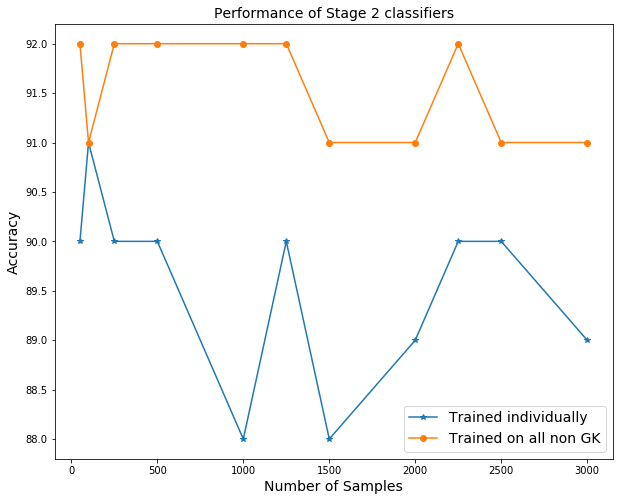

In [0]:
acc_all = [92, 91, 92, 92, 92, 92, 91, 91, 92, 91, 91]
acc = [90, 91, 90, 90, 88, 90, 88, 89, 90, 90, 89]
sample = [50, 100, 250, 500, 1000, 1250, 1500, 2000, 2250, 2500, 3000]

plt.figure(figsize=(10,8))
p1 = plt.plot(sample, acc, marker='*')
p2 = plt.plot(sample, acc_all, marker='o')


plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Number of Samples', fontsize=14)
plt.title('Performance of Stage 2 classifiers', fontsize=14)
plt.legend((p1[0], p2[0]), ('Trained individually', 'Trained on all non GK'), fontsize=14)
plt.gcf().savefig(f'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/validate.png', dpi=200,bbox_inches='tight')
plt.show()

In [0]:
validate(samples=1000)

=========== Stage 1 =============
[[185   9   0]
 [  7 389  11]
 [  0  13 386]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       194
           1       0.95      0.96      0.95       407
           2       0.97      0.97      0.97       399

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

=========== Stage 2 - all =============
[[200  20  18]
 [  9 514   6]
 [ 12  18 203]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       238
           1       0.93      0.97      0.95       529
           2       0.89      0.87      0.88       233

    accuracy                           0.92      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.92      0.92      0.92      1000

=========== Stage 2 =============
[[185  29  24]
 [  9 511   9]
 [ 27  2

In [0]:
validate(samples=1500)

=========== Stage 1 =============
[[265   8   0]
 [ 12 603  11]
 [  0  25 576]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       273
           1       0.95      0.96      0.96       626
           2       0.98      0.96      0.97       601

    accuracy                           0.96      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.96      0.96      0.96      1500

=========== Stage 2 - all =============
[[351  33  32]
 [  9 693  14]
 [ 26  22 320]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.88       416
           1       0.93      0.97      0.95       716
           2       0.87      0.87      0.87       368

    accuracy                           0.91      1500
   macro avg       0.90      0.89      0.90      1500
weighted avg       0.91      0.91      0.91      1500

=========== Stage 2 =============
[[337  39  40]
 [ 15 693   8]
 [ 31  4

In [0]:
validate(samples=2000)

=========== Stage 1 =============
[[352  10   0]
 [ 21 807  15]
 [  0  36 759]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       362
           1       0.95      0.96      0.95       843
           2       0.98      0.95      0.97       795

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

=========== Stage 2 - all =============
[[440  36  32]
 [ 15 950  16]
 [ 38  37 436]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       508
           1       0.93      0.97      0.95       981
           2       0.90      0.85      0.88       511

    accuracy                           0.91      2000
   macro avg       0.91      0.90      0.90      2000
weighted avg       0.91      0.91      0.91      2000

=========== Stage 2 =============
[[412  52  44]
 [ 16 957   8]
 [ 44  5

In [0]:
validate(samples=3000)

=========== Stage 1 =============
[[ 539   15    0]
 [  32 1231   22]
 [   0   50 1111]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       554
           1       0.95      0.96      0.95      1285
           2       0.98      0.96      0.97      1161

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

=========== Stage 2 - all =============
[[ 619   66   47]
 [  22 1454   13]
 [  54   52  673]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       732
           1       0.92      0.98      0.95      1489
           2       0.92      0.86      0.89       779

    accuracy                           0.92      3000
   macro avg       0.91      0.90      0.90      3000
weighted avg       0.91      0.92      0.91      3000

=========== Stage 2 =============
[[ 593   85   54]
 [

#### Step 1 + Step 2 ==> Predict missing values

In [0]:
test_team_pos_res = non_gk_players[non_gk_players['team_position']=='RES']
test_team_pos_sub = non_gk_players[non_gk_players['team_position']=='SUB'] 
test_team_pos_nan = non_gk_players[non_gk_players['team_position'].isna()]
print(len(test_team_pos_res))
print(len(test_team_pos_sub))
print(len(test_team_pos_nan))

2552
6892
200


In [0]:
nat = ['nation_position']
ref_features = nat+features
ref_features

['nation_position',
 'team_position',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 '

In [0]:
test_res = test_team_pos_res[ref_features]
print(test_res['nation_position'].isna().sum())
print(test_res['nation_position'].value_counts())

2528
SUB    13
ST      2
LCB     2
CDM     1
RM      1
LCM     1
RB      1
RCM     1
LW      1
CAM     1
Name: nation_position, dtype: int64


In [0]:
test_res = test_res.drop('team_position', axis=1)
y_test = test_res['nation_position']
x_test = test_res.drop('nation_position', axis=1)

In [0]:
x_clf = x_test[keep_columns]
y_clf = clf.predict(x_clf) #fw, mf, df?
y_clf

array([0, 1, 2, ..., 0, 2, 2])

In [0]:
y_pred = []
for i in range(len(y_clf)):
  if y_clf[i] == 0: #fw
    y = forest_fw.predict(np.array([x_test.iloc[i]]))
    y_pred.append(y)
  elif y_clf[i] == 1: #mf
    y = forest_mf.predict(np.array([x_test.iloc[i]]))
    y_pred.append(y)
  elif y_clf[i] == 2: #df
    y = forest_df.predict(np.array([x_test.iloc[i]]))
    y_pred.append(y)
#y_pred

In [0]:
y_pred = np.array(y_pred).flatten()

print(y_test.shape)
print(y_clf.shape)
print(y_pred.shape)

df_dict = {
    'y_true' : y_test,
    'y_player_pred': y_clf,
    'y_pos_pred':y_pred
}

df = pd.DataFrame(df_dict, columns= ['y_true', 'y_player_pred', 'y_pos_pred'])

export_csv = df.to_csv (r'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/pred_team_pos_res.csv', index = None, header=True)


(2552,)
(2552,)
(2552,)


In [0]:
test_sub = test_team_pos_sub[ref_features]
print(test_sub['nation_position'].isna().sum())
print(test_sub['nation_position'].value_counts())

test_sub = test_sub.drop('team_position', axis=1)
y_test_sub = test_sub['nation_position']
x_test_sub = test_sub.drop('nation_position', axis=1)

x_sub_clf = x_test_sub[keep_columns]
y_sub_clf = clf.predict(x_sub_clf) #fw, mf, df?

y_sub_pred = []
for i in range(len(y_sub_clf)):
  if y_sub_clf[i] == 0: #fw
    y = forest_fw.predict(np.array([x_test_sub.iloc[i]]))
    y_sub_pred.append(y)
  elif y_sub_clf[i] == 1: #mf
    y = forest_mf.predict(np.array([x_test_sub.iloc[i]]))
    y_sub_pred.append(y)
  elif y_sub_clf[i] == 2: #df
    y = forest_df.predict(np.array([x_test_sub.iloc[i]]))
    y_sub_pred.append(y)

y_sub_pred = np.array(y_sub_pred).flatten()

print(y_test_sub.shape)
print(y_sub_clf.shape)
print(y_sub_pred.shape)

df_dict = {
    'y_true' : y_test_sub,
    'y_player_pred': y_sub_clf,
    'y_pos_pred':y_sub_pred
}

df = pd.DataFrame(df_dict, columns= ['y_true', 'y_player_pred', 'y_pos_pred'])

export_csv = df.to_csv (r'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/pred_team_pos_sub.csv', index = None, header=True)


6655
SUB    132
LCM     13
RB      10
ST       9
RCB      9
LM       8
CAM      7
RCM      7
RW       6
LB       6
RM       6
LCB      6
LW       5
CDM      5
LDM      4
RS       2
RF       1
LS       1
Name: nation_position, dtype: int64
(6892,)
(6892,)
(6892,)


In [0]:
test_nan = test_team_pos_nan[ref_features]
print(test_nan['nation_position'].isna().sum())
print(test_nan['nation_position'].value_counts())

test_nan = test_nan.drop('team_position', axis=1)
y_test_nan = test_nan['nation_position']
x_test_nan = test_nan.drop('nation_position', axis=1)

x_nan_clf = x_test_nan[keep_columns]
y_nan_clf = clf.predict(x_nan_clf) #fw, mf, df?

y_nan_pred = []
for i in range(len(y_nan_clf)):
  if y_nan_clf[i] == 0: #fw
    y = forest_fw.predict(np.array([x_test_nan.iloc[i]]))
    y_nan_pred.append(y)
  elif y_nan_clf[i] == 1: #mf
    y = forest_mf.predict(np.array([x_test_nan.iloc[i]]))
    y_nan_pred.append(y)
  elif y_nan_clf[i] == 2: #df
    y = forest_df.predict(np.array([x_test_nan.iloc[i]]))
    y_nan_pred.append(y)

y_nan_pred = np.array(y_nan_pred).flatten()

print(y_test_nan.shape)
print(y_nan_clf.shape)
print(y_nan_pred.shape)

df_dict = {
    'y_true' : y_test_nan,
    'y_player_pred': y_nan_clf,
    'y_pos_pred':y_nan_pred
}

df = pd.DataFrame(df_dict, columns= ['y_true', 'y_player_pred', 'y_pos_pred'])

export_csv = df.to_csv (r'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/pred_team_pos_nan.csv', index = None, header=True)


0
SUB    107
RCB     13
LB      10
LCB     10
RB       9
ST       8
LM       8
RM       7
RCM      6
LCM      6
RDM      4
CAM      3
CDM      3
LDM      2
LS       1
LW       1
RS       1
LWB      1
Name: nation_position, dtype: int64
(200,)
(200,)
(200,)


In [0]:
test_team_pos = pd.concat([test_team_pos_res, test_team_pos_sub, test_team_pos_nan])
print(test_team_pos.shape)

(9644, 108)


In [0]:
fifaid = test_team_pos['sofifa_id']
test = test_team_pos[ref_features]
print(test['nation_position'].isna().sum())
print(test['nation_position'].value_counts())

test = test.drop('team_position', axis=1)
y_test = test['nation_position']
x_test = test.drop('nation_position', axis=1)

x_clf = x_test[keep_columns]
y_clf = clf.predict(x_clf) #fw, mf, df?

y_pred = forest_all.predict(x_test)

print(y_test.shape)
print(y_clf.shape)
print(y_pred.shape)

df_dict = {
    'sofifa_id':fifaid,
    'nation_pos': y_test,
    'y_player_pred': y_clf,
    'y_pos_pred':y_pred
}

df = pd.DataFrame(df_dict, columns= ['sofifa_id', 'nation_pos', 'y_player_pred', 'y_pos_pred'])

export_csv = df.to_csv (r'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/pred_team_pos_all.csv', index = None, header=True)


9183
SUB    252
RCB     22
RB      20
LCM     20
ST      19
LCB     18
LM      16
LB      16
RM      14
RCM     14
CAM     11
CDM      9
LW       7
RW       6
LDM      6
RDM      4
RS       3
LS       2
LWB      1
RF       1
Name: nation_position, dtype: int64
(9644,)
(9644,)
(9644,)


In [0]:
val_pred = pd.read_csv(r'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/pred_team_pos_all.csv')
print(val_pred.shape)
print(val_pred.y_player_pred.value_counts())
print(val_pred.y_pos_pred.value_counts())

(9644, 4)
1    4286
2    3300
0    2058
Name: y_player_pred, dtype: int64
1    5104
0    2501
2    2039
Name: y_pos_pred, dtype: int64
2058 4286 3300


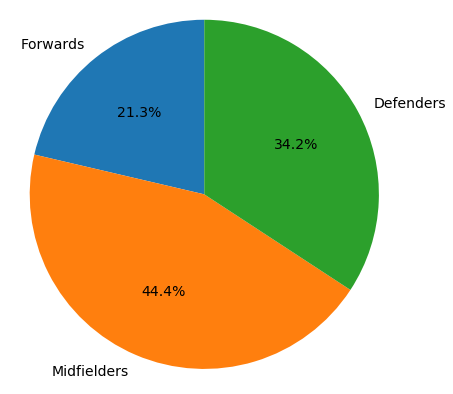

In [0]:
pl = val_pred.y_player_pred.value_counts()
labels = ['Forwards', 'Midfielders', 'Defenders']
sizes = [pl[0], pl[1], pl[2]]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.gcf().savefig(f'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/team_pos_player.png', dpi=200,bbox_inches='tight')
plt.show()

1    845
0    741
2    472
Name: y_pos_pred, dtype: int64
1    2267
0    1185
2     834
Name: y_pos_pred, dtype: int64
1    1992
2     733
0     575
Name: y_pos_pred, dtype: int64


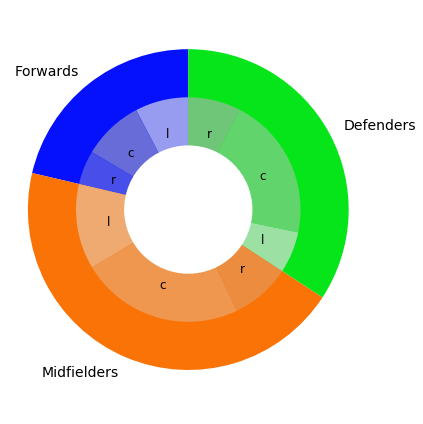

In [0]:
fw = val_pred[val_pred['y_player_pred']==0] #fw
pl_fw = fw.y_pos_pred.value_counts()
print(pl_fw)

mf = val_pred[val_pred['y_player_pred']==1] #mf
pl_mf = mf.y_pos_pred.value_counts()
print(pl_mf)

df = val_pred[val_pred['y_player_pred']==2] #df
pl_df = df.y_pos_pred.value_counts()
print(pl_df)

pl = val_pred.y_player_pred.value_counts()
labels = ['Forwards', 'Midfielders', 'Defenders']
sizes = [pl[0], pl[1], pl[2]]

labels_inner = ['l', 'c', 'r', 'l', 'c', 'r', 'l', 'c', 'r']
sizes_inner = [pl_fw[0], pl_fw[1], pl_fw[2], pl_mf[0], pl_mf[1], pl_mf[2], pl_df[0], pl_df[1], pl_df[2]]

colors = ['#0511FC', '#F97306', '#05E519']
colors_inner = ['#989CF0', '#676CD8', '#474EEA', '#EEAA71', '#EF974E','#EC8C3E', '#9CE1A3', '#61D56C','#70C678']
 
fig = plt.figure(figsize=(6,6))
bigger = plt.pie(sizes, labels=labels, colors=colors,
                 startangle=90, frame=True, textprops={'fontsize': 14})
smaller = plt.pie(sizes_inner, labels=labels_inner, colors=colors_inner, 
                  radius=0.7,
                  startangle=90, labeldistance=0.7, textprops={'fontsize': 12})
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
        
plt.axis('equal')
plt.tight_layout()
plt.gcf().savefig(f'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/team_pos_player_all.png', dpi=200,bbox_inches='tight')
plt.show()

### Nation Random Forest

In [0]:
keep_columns=['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle']
pos = {
        'LS': 0,
        'ST': 0,
        'RS': 0,
        'LW': 0,
        'LF': 0,
        'CF': 0,
        'RF': 0,
        'RW': 0,
        'LB': 2, 
        'LCB': 2,
        'CB' : 2,
        'RCB': 2,
        'RB': 2,
        'LAM': 1,
        'CAM': 1,
        'RAM': 1,
        'LM': 1,
        'LCM': 1,
        'CM' : 1,
        'RCM' : 1,
        'RM': 1,
        'LWB': 1,
        'LDM': 1,
        'CDM': 1,
        'RDM': 1,
        'RWB': 1
        }
nation_players.nation_position_enc = nation_players.nation_position.map(pos)

In [0]:
nation_players.nation_position_enc.value_counts()

1    201
2    193
0     96
Name: nation_position_enc, dtype: int64

In [0]:
df_majority = nation_players[nation_players.nation_position_enc==1]
df_minority_1 = nation_players[nation_players.nation_position_enc==0]
df_minority_2 = nation_players[nation_players.nation_position_enc==2]

df_minority_1_upsampled = resample(df_minority_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=201,    # to match majority class
                                 random_state=123) # reproducible results

df_minority_2_upsampled = resample(df_minority_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=201,    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_1_upsampled,df_minority_2_upsampled])

In [0]:
df_upsampled.nation_position_enc.value_counts()

2    201
1    201
0    201
Name: nation_position_enc, dtype: int64

#### SVM

In [0]:
y=df_upsampled.nation_position_enc
X = df_upsampled.loc[:,keep_columns]
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = svm.SVC(decision_function_shape='ovo',gamma='auto')
clf.fit(X_train,y_train)
pred = clf.predict(X_test)

In [0]:
confusion_matrix(y_test, pred,labels=[0,1,2])

array([[37,  1,  1],
       [11, 21, 12],
       [ 0,  2, 36]])

In [0]:
print(classification_report(y_test, pred,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85        39
           1       0.88      0.48      0.62        44
           2       0.73      0.95      0.83        38

    accuracy                           0.78       121
   macro avg       0.79      0.79      0.77       121
weighted avg       0.80      0.78      0.76       121



#### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

y=df_upsampled.nation_position_enc
X = df_upsampled.loc[:,keep_columns]
#scaler = StandardScaler() 
#X = scaler.fit_transform(X) 

#X = normalize(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=20)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

In [0]:
confusion_matrix(y_test, pred,labels=[0,1,2])

array([[39,  0,  0],
       [ 4, 34,  6],
       [ 0,  0, 38]])

In [0]:
print(classification_report(y_test, pred,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        39
           1       1.00      0.77      0.87        44
           2       0.86      1.00      0.93        38

    accuracy                           0.92       121
   macro avg       0.92      0.92      0.92       121
weighted avg       0.93      0.92      0.91       121



#### Prepare for Step 2

In [0]:
features = ['nation_position', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
            'attacking_crossing', 'attacking_finishing',	'attacking_heading_accuracy',	'attacking_short_passing',	'attacking_volleys',	
            'skill_dribbling',	'skill_curve',	'skill_fk_accuracy',	'skill_long_passing',	'skill_ball_control',	
            'movement_acceleration',	'movement_sprint_speed',	'movement_agility',	'movement_reactions',	'movement_balance',
            'power_shot_power',	'power_jumping',	'power_stamina',	'power_strength',	'power_long_shots',	
            'mentality_aggression',	'mentality_interceptions',	'mentality_positioning',	'mentality_vision',	'mentality_penalties',	'mentality_composure',
            'defending_marking',	'defending_standing_tackle',	'defending_sliding_tackle',	
            'goalkeeping_diving',	'goalkeeping_handling',	'goalkeeping_kicking',	'goalkeeping_positioning',	'goalkeeping_reflexes',
            'ls',	'st',	'rs',	'lw',	'lf',	'cf',	'rf',	'rw',	'lam',	'cam',	'ram',	'lm',	'lcm',	'cm',	'rcm',	'rm',	'lwb',	'ldm',	
            'cdm',	'rdm',	'rwb',	'lb',	'lcb',	'cb',	'rcb',	'rb'] #, 'pos_offset', ]

In [0]:
forwards_pred = forward_players[features]
print(forwards_pred.shape)
print(forwards_pred['nation_position'].describe())
print(forwards_pred['nation_position'].unique())
print(forwards_pred['nation_position'].isnull().any())
print(forwards_pred['nation_position'].isna().sum())

forwards_pred.dropna(subset=['nation_position'],inplace=True)
forwards_pred['nation_position'] = forwards_pred.nation_position.map(fw_pos)
forwards_pred['nation_position'] = forwards_pred['nation_position'].astype('Int64')
forwards_pred=forwards_pred[forwards_pred.nation_position.isin([0,1,2])]

print(forwards_pred['nation_position'].value_counts())


(3743, 67)
count     229
unique     13
top       SUB
freq      130
Name: nation_position, dtype: object
[nan 'LS' 'LF' 'RW' 'RM' 'ST' 'CAM' 'CF' 'LW' 'SUB' 'RS' 'LCM' 'RF' 'LM']
True
3514
1    41
0    18
2    17
Name: nation_position, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [0]:
mf_pred = midfield_players[features]

print(mf_pred['nation_position'].describe())
print(mf_pred['nation_position'].unique())
print(mf_pred['nation_position'].isnull().any())
print(mf_pred['nation_position'].isna().sum())

mf_pred.dropna(subset=['nation_position'],inplace=True)
mf_pred['nation_position'] = mf_pred.nation_position.map(mf_pos)
mf_pred['nation_position'] = mf_pred['nation_position'].astype('Int64')
mf_pred=mf_pred[mf_pred.nation_position.isin([0,1,2])]

print(mf_pred['nation_position'].value_counts())


count     434
unique     19
top       SUB
freq      216
Name: nation_position, dtype: object
['LW' 'RCM' nan 'LDM' 'CDM' 'RDM' 'CAM' 'SUB' 'ST' 'LCM' 'RW' 'CM' 'LB'
 'RM' 'LM' 'RWB' 'RCB' 'RB' 'LCB' 'LWB']
True
6861
1    104
0     35
2     32
Name: nation_position, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [0]:
df_pred = defence_players[features]

print(df_pred['nation_position'].describe())
print(df_pred['nation_position'].unique())
print(df_pred['nation_position'].isnull().any())
print(df_pred['nation_position'].isna().sum())

df_pred.dropna(subset=['nation_position'],inplace=True)
df_pred['nation_position'] = df_pred.nation_position.map(df_pos)
df_pred['nation_position'] = df_pred['nation_position'].astype('Int64')
df_pred=df_pred[df_pred.nation_position.isin([0,1,2])]

print(df_pred['nation_position'].value_counts())


count     316
unique     10
top       SUB
freq      143
Name: nation_position, dtype: object
['LCB' nan 'RCB' 'LB' 'CDM' 'LM' 'RB' 'SUB' 'CB' 'RM' 'LW']
True
4888
1    97
2    35
0    33
Name: nation_position, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [0]:
all_non_gk_pred = pd.concat([mf_pred, forwards_pred, df_pred])
print(all_non_gk_pred['nation_position'].value_counts())

1    242
0     86
2     84
Name: nation_position, dtype: int64


In [0]:
print(all_non_gk_pred.shape)

(412, 67)


#### Classifiers

In [0]:
left = forwards_pred[forwards_pred['nation_position']==0]
center = forwards_pred[forwards_pred['nation_position']==1]
right = forwards_pred[forwards_pred['nation_position']==2]

left_upsampled = resample(left,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

right_upsampled = resample(right,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
new_df = pd.concat([left_upsampled, center, right_upsampled])

print(new_df['nation_position'].value_counts())

X = new_df.drop('nation_position', axis=1)
y = new_df['nation_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

forest_fw = RandomForestClassifier(n_estimators=100, random_state=20)
forest_fw.fit(X_train, y_train)
y_pred = forest_fw.predict(X_test)

print('=========== Random Forest =============')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

svc_fw = svm.SVC(kernel='linear')
svc_fw.fit(X_train, y_train)
y_pred = svc_fw.predict(X_test)
print('=========== SVM =============')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0    41
1    41
2    41
Name: nation_position, dtype: int64
=========== Random Forest =============
[[ 9  0  0]
 [ 0 10  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

=========== SVM =============
[[9 0 0]
 [0 9 1]
 [0 0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.90      0.95        10
           2       0.86      1.00      0.92         6

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.97      0.96      0.96        25



In [0]:
left = mf_pred[mf_pred['nation_position']==0]
center = mf_pred[mf_pred['nation_position']==1]
right = mf_pred[mf_pred['nation_position']==2]

left_upsampled = resample(left,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

right_upsampled = resample(right,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
new_df = pd.concat([left_upsampled, center, right_upsampled])

print(new_df['nation_position'].value_counts())

X = new_df.drop('nation_position', axis=1)
y = new_df['nation_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

forest_mf = RandomForestClassifier(n_estimators=100, random_state=20)
forest_mf.fit(X_train, y_train)
y_pred = forest_mf.predict(X_test)

print('=========== Random Forest =============')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

svc_mf = svm.SVC(kernel='linear')
svc_mf.fit(X_train, y_train)
y_pred = svc_mf.predict(X_test)
print('=========== SVM =============')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0    104
1    104
2    104
Name: nation_position, dtype: int64
=========== Random Forest =============
[[21  0  0]
 [ 3 17  1]
 [ 2  0 19]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
           1       1.00      0.81      0.89        21
           2       0.95      0.90      0.93        21

    accuracy                           0.90        63
   macro avg       0.92      0.90      0.91        63
weighted avg       0.92      0.90      0.91        63

=========== SVM =============
[[20  1  0]
 [ 7 12  2]
 [ 3  0 18]]
              precision    recall  f1-score   support

           0       0.67      0.95      0.78        21
           1       0.92      0.57      0.71        21
           2       0.90      0.86      0.88        21

    accuracy                           0.79        63
   macro avg       0.83      0.79      0.79        63
weighted avg       0.83      0.79      0.79        63



In [0]:
left = df_pred[df_pred['nation_position']==0]
center = df_pred[df_pred['nation_position']==1]
right = df_pred[df_pred['nation_position']==2]

left_upsampled = resample(left,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

right_upsampled = resample(right,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
new_df = pd.concat([left_upsampled, center, right_upsampled])

print(new_df['nation_position'].value_counts())

X = new_df.drop('nation_position', axis=1)
y = new_df['nation_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

forest_df = RandomForestClassifier(n_estimators=100, random_state=20)
forest_df.fit(X_train, y_train)
y_pred = forest_df.predict(X_test)

print('=========== Random Forest =============')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

svc_df = svm.SVC(kernel='linear')
svc_df.fit(X_train, y_train)
y_pred = svc_df.predict(X_test)
print('=========== SVM =============')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0    97
1    97
2    97
Name: nation_position, dtype: int64
=========== Random Forest =============
[[21  0  0]
 [ 0 20  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        18

    accuracy                           1.00        59
   macro avg       1.00      1.00      1.00        59
weighted avg       1.00      1.00      1.00        59

=========== SVM =============
[[21  0  0]
 [ 1 19  0]
 [ 0  0 18]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        18

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



In [0]:
left = all_non_gk_pred[all_non_gk_pred['nation_position']==0]
center = all_non_gk_pred[all_non_gk_pred['nation_position']==1]
right = all_non_gk_pred[all_non_gk_pred['nation_position']==2]

left_upsampled = resample(left,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

right_upsampled = resample(right,
                          replace=True, # sample with replacement
                          n_samples=len(center), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
new_df = pd.concat([left_upsampled, center, right_upsampled])

print(new_df['nation_position'].value_counts())

X = new_df.drop('nation_position', axis=1)
y = new_df['nation_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

forest_all = RandomForestClassifier(n_estimators=100, random_state=20)
forest_all.fit(X_train, y_train)
y_pred = forest_all.predict(X_test)

print('=========== Random Forest =============')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

svc_all = svm.SVC(kernel='linear')
svc_all.fit(X_train, y_train)
y_pred = svc_all.predict(X_test)
print('=========== SVM =============')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0    242
1    242
2    242
Name: nation_position, dtype: int64
=========== Random Forest =============
[[48  3  9]
 [ 5 31  2]
 [ 3  1 44]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        60
           1       0.89      0.82      0.85        38
           2       0.80      0.92      0.85        48

    accuracy                           0.84       146
   macro avg       0.85      0.84      0.84       146
weighted avg       0.85      0.84      0.84       146

=========== SVM =============
[[40  2 18]
 [ 6 24  8]
 [11  3 34]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.68        60
           1       0.83      0.63      0.72        38
           2       0.57      0.71      0.63        48

    accuracy                           0.67       146
   macro avg       0.70      0.67      0.68       146
weighted avg       0.69      0.67      0.67       146



#### Step 1 + Step 2 ==> Validate

In [0]:
def validate(samples=100):
  val = nation_players.sample(n=samples)
  val_1 = val[keep_columns]
  y_1 = val['nation_position']
  y_1 = y_1.map(pos)
  y_pred_1 = clf.predict(val_1)
  print('=========== Stage 1 =============')
  print(confusion_matrix(y_1,y_pred_1))
  print(classification_report(y_1,y_pred_1))

  x_test = val[features].drop('nation_position', axis=1)
  y_2 = val['nation_position'].map(pos_dict)

  y_pred_2 = forest_all.predict(x_test)
  print('=========== Stage 2 - all =============')
  print(confusion_matrix(y_2,y_pred_2))
  print(classification_report(y_2,y_pred_2))

  y_pred_2 = []
  for i in range(len(y_pred_1)):
    if y_pred_1[i] == 0: #fw
      y = int(forest_fw.predict(np.array([x_test.iloc[i]])))
    elif y_pred_1[i] == 1: #mf
      y = int(forest_mf.predict(np.array([x_test.iloc[i]])))
    elif y_pred_1[i] == 2: #df
      y = int(forest_df.predict(np.array([x_test.iloc[i]])))
    y_pred_2.append(y)

  print('=========== Stage 2 =============')
  print(confusion_matrix(y_2,y_pred_2))
  print(classification_report(y_2,y_pred_2))



In [0]:
validate(samples=100)

=========== Stage 1 =============
[[14  1  0]
 [ 2 46  1]
 [ 0  1 35]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.96      0.94      0.95        49
           2       0.97      0.97      0.97        36

    accuracy                           0.95       100
   macro avg       0.94      0.95      0.94       100
weighted avg       0.95      0.95      0.95       100

=========== Stage 2 - all =============
[[19  2  3]
 [ 2 51  2]
 [ 1  2 18]]
              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.93      0.93      0.93        55
           2       0.78      0.86      0.82        21

    accuracy                           0.88       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.88      0.88      0.88       100

=========== Stage 2 =============
[[18  3  3]
 [ 3 51  1]
 [ 0  2 19]]
              preci

In [0]:
validate(samples=150)

=========== Stage 1 =============
[[23  2  0]
 [ 3 61  3]
 [ 0  1 57]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.95      0.91      0.93        67
           2       0.95      0.98      0.97        58

    accuracy                           0.94       150
   macro avg       0.93      0.94      0.93       150
weighted avg       0.94      0.94      0.94       150

=========== Stage 2 - all =============
[[33  2  5]
 [ 2 77  0]
 [ 2  2 27]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.86        40
           1       0.95      0.97      0.96        79
           2       0.84      0.87      0.86        31

    accuracy                           0.91       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.91      0.91      0.91       150

=========== Stage 2 =============
[[36  2  2]
 [ 3 75  1]
 [ 2  2 27]]
              preci

In [0]:
validate(samples=200)

=========== Stage 1 =============
[[32  2  0]
 [ 2 77  2]
 [ 0  1 84]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        34
           1       0.96      0.95      0.96        81
           2       0.98      0.99      0.98        85

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

=========== Stage 2 - all =============
[[38  3  8]
 [ 7 97  4]
 [ 5  5 33]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        49
           1       0.92      0.90      0.91       108
           2       0.73      0.77      0.75        43

    accuracy                           0.84       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.84      0.84      0.84       200

=========== Stage 2 =============
[[ 43   4   2]
 [  5 100   3]
 [  4   2  37]]
          

#### Step 1 + Step 2 ==> Predict missing values

In [0]:
test_nation_pos = pd.concat([non_gk_players[non_gk_players['nation_position']=='SUB'], non_gk_players[non_gk_players['nation_position'].isna()]])
print(len(test_nation_pos))

15752


In [0]:
test_nation_pos.head()

sofifa_id  ... pos_offset
27     182521  ...          3
67     231866  ...          2
88     192629  ...          2
89     193747  ...          3
93     235790  ...          2

[5 rows x 108 columns]

In [0]:
test_nation_pos['sofifa_id']

27       182521
67       231866
88       192629
89       193747
93       235790
          ...  
16237    245006
16238    250995
16239    252332
16240    251110
16241    233449
Name: sofifa_id, Length: 15752, dtype: int64

In [0]:
team = ['team_position']
ref_features = team+features

In [0]:
test_sub = test_nation_pos[ref_features]
print(test_sub['team_position'].isna().sum())
print(test_sub['team_position'].value_counts())

test_sub = test_sub.drop('nation_position', axis=1)
y_test_sub = test_sub['team_position']
x_test_sub = test_sub.drop('team_position', axis=1)

x_sub_clf = x_test_sub[keep_columns]
y_sub_clf = clf.predict(x_sub_clf) #fw, mf, df?

y_sub_pred = []
for i in range(len(y_sub_clf)):
  if y_sub_clf[i] == 0: #fw
    y = forest_fw.predict(np.array([x_test_sub.iloc[i]]))
    y_sub_pred.append(y)
  elif y_sub_clf[i] == 1: #mf
    y = forest_mf.predict(np.array([x_test_sub.iloc[i]]))
    y_sub_pred.append(y)
  elif y_sub_clf[i] == 2: #df
    y = forest_df.predict(np.array([x_test_sub.iloc[i]]))
    y_sub_pred.append(y)

y_sub_pred = np.array(y_sub_pred).flatten()

print(y_test_sub.shape)
print(y_sub_clf.shape)
print(y_sub_pred.shape)

df_dict = {
    'sofifa_id': test_nation_pos['sofifa_id'],
    'team_pos': test_nation_pos['team_position'],
    'y_true' : y_test_sub,
    'y_player_pred': y_sub_clf,
    'y_pos_pred':y_sub_pred
}

df = pd.DataFrame(df_dict, columns= ['sofifa_id','team_pos','y_true', 'y_player_pred', 'y_pos_pred'])

export_csv = df.to_csv (r'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/pred_nation_pos.csv', index = None, header=True)


107
SUB    6787
RES    2541
RCB     629
LCB     627
LB      537
RB      535
ST      444
LCM     393
RCM     390
LM      386
RM      382
CAM     302
RDM     238
LDM     230
LS      186
RS      184
CDM     171
LW      154
RW      149
CB       98
CM       73
LWB      56
RWB      56
LAM      23
RAM      23
LF       19
RF       19
CF       13
Name: team_position, dtype: int64
(15752,)
(15752,)
(15752,)


In [0]:
val_pred = pd.read_csv(r'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/pred_nation_pos.csv')
print(val_pred.shape)
print(val_pred.y_player_pred.value_counts())
print(val_pred.y_pos_pred.value_counts())

(15752, 5)
1    7028
2    5623
0    3101
Name: y_player_pred, dtype: int64
1    10926
0     2740
2     2086
Name: y_pos_pred, dtype: int64


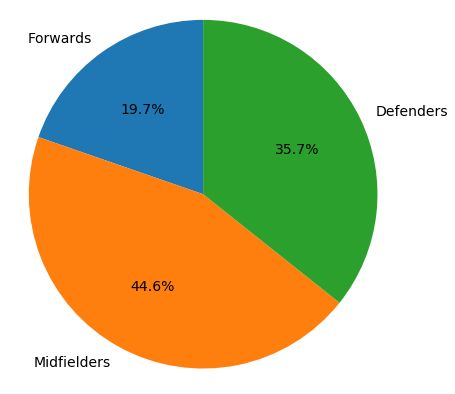

In [0]:
pl = val_pred.y_player_pred.value_counts()
labels = ['Forwards', 'Midfielders', 'Defenders']
sizes = [pl[0], pl[1], pl[2]]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.gcf().savefig(f'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/nation_pos_player.png', dpi=200,bbox_inches='tight')
plt.show()

1    2618
2     341
0     142
Name: y_pos_pred, dtype: int64
1    4777
0    1823
2     428
Name: y_pos_pred, dtype: int64
1    3531
2    1317
0     775
Name: y_pos_pred, dtype: int64


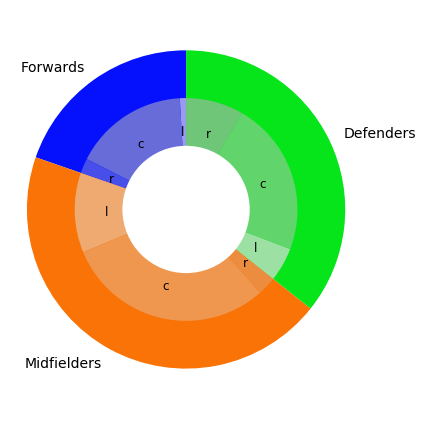

In [0]:
fw = val_pred[val_pred['y_player_pred']==0] #fw
pl_fw = fw.y_pos_pred.value_counts()
print(pl_fw)

mf = val_pred[val_pred['y_player_pred']==1] #mf
pl_mf = mf.y_pos_pred.value_counts()
print(pl_mf)

df = val_pred[val_pred['y_player_pred']==2] #df
pl_df = df.y_pos_pred.value_counts()
print(pl_df)

pl = val_pred.y_player_pred.value_counts()
labels = ['Forwards', 'Midfielders', 'Defenders']
sizes = [pl[0], pl[1], pl[2]]

labels_inner = ['l', 'c', 'r', 'l', 'c', 'r', 'l', 'c', 'r']
sizes_inner = [pl_fw[0], pl_fw[1], pl_fw[2], pl_mf[0], pl_mf[1], pl_mf[2], pl_df[0], pl_df[1], pl_df[2]]

colors = ['#0511FC', '#F97306', '#05E519']
colors_inner = ['#989CF0', '#676CD8', '#474EEA', '#EEAA71', '#EF974E','#EC8C3E', '#9CE1A3', '#61D56C','#70C678']
 
fig = plt.figure(figsize=(6,6))
bigger = plt.pie(sizes, labels=labels, colors=colors,
                 startangle=90, frame=True, textprops={'fontsize': 14})
smaller = plt.pie(sizes_inner, labels=labels_inner, colors=colors_inner, 
                  radius=0.7,
                  startangle=90, labeldistance=0.7, textprops={'fontsize': 12})
centre_circle = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
        
plt.axis('equal')
plt.tight_layout()
plt.gcf().savefig(f'/content/drive/My Drive/Data Mining Lab - FIFA/Images/Week 8/nation_pos_player_all.png', dpi=200,bbox_inches='tight')
plt.show()

### NN in step 1

### NN for both steps